## Scraping Bike Sharing

In [ ]:
import requests
from bs4 import BeautifulSoup
import os
import urllib.request
import zipfile

def scrape_monthly_data(url):
    """
    Scrapes the URLs for all monthly datasets from the Oslo City Bike historical data page.

    Args:
        url (str): URL of the Oslo City Bike historical data page.

    Returns:
        list: List of URLs for the downloadable monthly datasets (CSV or ZIP).
    """
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    file_links = []
    for ul in soup.find_all('ul'):
        for link in ul.find_all('a', href=True):
            # Check if link text contains "csv" or "zip" (case-insensitive)
            if any(ext in link.text.lower() for ext in ["csv", "zip"]):
                file_links.append(link['href'])

    return file_links

# Example usage
url = "https://oslobysykkel.no/en/open-data/historical"
data_urls = scrape_monthly_data(url)

if data_urls:
    print("Found the following downloadable datasets:")

    base_folder_path = "./dataset/bike_sharing/"
    os.makedirs(base_folder_path, exist_ok=True)  # Ensure the base directory exists

    for data_url in data_urls:
        parts = data_url.split("/")
        filename = parts[-1]
        potential_extension = filename.split(".")[-1]

        if potential_extension in ["csv", "zip"]:
            # Extract the year from the URL or filename
            year = parts[-2] if parts[-2].isdigit() else 'unknown_year'
            year_folder_path = os.path.join(base_folder_path, year)
            os.makedirs(year_folder_path, exist_ok=True)  # Ensure the year directory exists

            file_path = os.path.join(year_folder_path, filename)

            if not os.path.exists(file_path):
                # Download the file
                print(f"Downloading {data_url} to {file_path}")
                urllib.request.urlretrieve(data_url, file_path)
                print(f"Downloaded file saved to: {file_path}")

                # Unzip the zip files if needed
                if potential_extension == "zip":
                    with zipfile.ZipFile(file_path, 'r') as zip_ref:
                        print(f"Extracting to {year_folder_path}")
                        zip_ref.extractall(year_folder_path)

                    # Remove the ZIP file after extraction (optional)
                    try:
                        os.remove(file_path)
                        print(f"Removed ZIP file: {file_path}")
                    except FileNotFoundError:
                        print(f"ZIP file '{file_path}' not found or already removed.")
else:
    print("No downloadable datasets found on the page.")


Found the following downloadable datasets:
Downloaded file saved to: ./dataset/bike_sharing/2024/06.csv
Downloaded file saved to: ./dataset/bike_sharing/2024/05.csv
Downloaded file saved to: ./dataset/bike_sharing/2024/04.csv
Downloaded file saved to: ./dataset/bike_sharing/2024/03.csv
Downloaded file saved to: ./dataset/bike_sharing/2024/02.csv
Downloaded file saved to: ./dataset/bike_sharing/2024/01.csv
Downloaded file saved to: ./dataset/bike_sharing/2023/12.csv
Downloaded file saved to: ./dataset/bike_sharing/2023/11.csv
Downloaded file saved to: ./dataset/bike_sharing/2023/10.csv
Downloaded file saved to: ./dataset/bike_sharing/2023/09.csv
Downloaded file saved to: ./dataset/bike_sharing/2023/08.csv
Downloaded file saved to: ./dataset/bike_sharing/2023/07.csv
Downloaded file saved to: ./dataset/bike_sharing/2023/06.csv
Downloaded file saved to: ./dataset/bike_sharing/2023/05.csv
Downloaded file saved to: ./dataset/bike_sharing/2023/04.csv
Downloaded file saved to: ./dataset/bike_s

## Dataset Merge and Save



In [ ]:
import os
import pandas as pd

# Definisci la cartella base
base_folder_path = './dataset/bike_sharing'

# Crea una lista per memorizzare i percorsi dei file CSV
csv_files = []

# Itera attraverso tutte le sottocartelle (anni)
for year in range(2016, 2024 + 1):
    year_folder_path = os.path.join(base_folder_path, str(year))

    # Verifica se la cartella dell'anno esiste
    if os.path.exists(year_folder_path):
        # Itera attraverso tutti i file nella cartella dell'anno
        for filename in os.listdir(year_folder_path):
            if filename.endswith('.csv'):
                file_path = os.path.join(year_folder_path, filename)
                csv_files.append(file_path)

# Lista per memorizzare tutti i DataFrame
dataframes = []

# Carica i dati
for file_path in csv_files:
    df = pd.read_csv(file_path)
    # Rinominare la colonna per garantire che il nome sia corretto
    df.columns = df.columns.str.strip().str.lower()
    # Identifica la colonna corretta
    if 'start time' in df.columns:
        time_column = 'start time'
    elif 'started_at' in df.columns:
        time_column = 'started_at'
    else:
        print(f"Error: No valid time column found in {file_path}")
        continue
    # Verifica i primi valori della colonna del tempo
    # Estrai l'anno dalla colonna del tempo come stringa
    df['year'] = df[time_column].str[:4]
    dataframes.append(df)

# Concatena tutti i DataFrame in un unico DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Salva il DataFrame combinato in un file CSV
combined_csv_path = './drive/MyDrive/Magistrale/DS for Smart Cities/script/bike_sharing.csv'
combined_df.to_csv(combined_csv_path, index=False)

print(f"Combined CSV saved at: {combined_csv_path}")

Combined CSV saved at: ./drive/MyDrive/Magistrale/DS for Smart Cities/script/bike_sharing.csv


In [ ]:
combined_df.head()

start station                 start time  end station  \
0          291.0  2016-09-01 06:00:02 +0200        301.0   
1          262.0  2016-09-01 06:00:07 +0200        292.0   
2          277.0  2016-09-01 06:00:07 +0200        163.0   
3          174.0  2016-09-01 06:00:07 +0200        157.0   
4          257.0  2016-09-01 06:00:13 +0200        257.0   

                    end time  year started_at ended_at  duration  \
0  2016-09-01 06:06:06 +0200  2016        NaN      NaN       NaN   
1  2016-09-01 06:15:43 +0200  2016        NaN      NaN       NaN   
2  2016-09-01 06:03:07 +0200  2016        NaN      NaN       NaN   
3  2016-09-01 06:11:33 +0200  2016        NaN      NaN       NaN   
4  2016-09-01 07:36:16 +0200  2016        NaN      NaN       NaN   

   start_station_id start_station_name start_station_description  \
0               NaN                NaN                       NaN   
1               NaN                NaN                       NaN   
2               NaN                NaN                       NaN   
3               NaN                NaN                       NaN   
4               NaN                NaN                       NaN   

   start_station_latitude  start_station_longitude  end_station_id  \
0                     NaN                      NaN             NaN   
1                     NaN                      NaN             NaN   
2                     NaN                      NaN             NaN   
3                     NaN                      NaN             NaN   
4                     NaN                      NaN             NaN   

  end_station_name end_station_description  end_station_latitude  \
0              NaN                     NaN                   NaN   
1              NaN                     NaN                   NaN   
2              NaN                     NaN                   NaN   
3              NaN                     NaN                   NaN   
4              NaN                     NaN                   NaN   

   end_station_longitude  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN

# File reading

## Full Dataset Bike Sharing

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the combined CSV file
combined_csv_path = '/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/bike_sharing.csv'

# Define chunk size
chunk_size = 1000  # Adjust as needed

# Initialize empty list to store chunks
chunks = []

# Read the CSV file in chunks and iterate over them using tqdm
with tqdm(total=15857336 // chunk_size) as pbar:
    for chunk in pd.read_csv(combined_csv_path, chunksize=chunk_size):
        # Process the chunk as needed
        # For example, you can perform operations on the chunk or append it to the list
        chunks.append(chunk)

        # Update progress bar
        pbar.update(1)

# Concatenate all chunks into a single DataFrame
combined_df = pd.concat(chunks, ignore_index=True)

# Display information about the DataFrame
print(f"Combined CSV saved at: {combined_csv_path}")
print(f"Number of rows: {len(combined_df)}")


Mounted at /content/drive


  0%|          | 0/15857 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
combined_df.head()

start station                 start time  end station  \
0          291.0  2016-09-01 06:00:02 +0200        301.0   
1          262.0  2016-09-01 06:00:07 +0200        292.0   
2          277.0  2016-09-01 06:00:07 +0200        163.0   
3          174.0  2016-09-01 06:00:07 +0200        157.0   
4          257.0  2016-09-01 06:00:13 +0200        257.0   

                    end time  year started_at ended_at  duration  \
0  2016-09-01 06:06:06 +0200  2016        NaN      NaN       NaN   
1  2016-09-01 06:15:43 +0200  2016        NaN      NaN       NaN   
2  2016-09-01 06:03:07 +0200  2016        NaN      NaN       NaN   
3  2016-09-01 06:11:33 +0200  2016        NaN      NaN       NaN   
4  2016-09-01 07:36:16 +0200  2016        NaN      NaN       NaN   

   start_station_id start_station_name start_station_description  \
0               NaN                NaN                       NaN   
1               NaN                NaN                       NaN   
2               NaN                NaN                       NaN   
3               NaN                NaN                       NaN   
4               NaN                NaN                       NaN   

   start_station_latitude  start_station_longitude  end_station_id  \
0                     NaN                      NaN             NaN   
1                     NaN                      NaN             NaN   
2                     NaN                      NaN             NaN   
3                     NaN                      NaN             NaN   
4                     NaN                      NaN             NaN   

  end_station_name end_station_description  end_station_latitude  \
0              NaN                     NaN                   NaN   
1              NaN                     NaN                   NaN   
2              NaN                     NaN                   NaN   
3              NaN                     NaN                   NaN   
4              NaN                     NaN                   NaN   

   end_station_longitude  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN

In [ ]:
import pandas as pd

tmp_df = combined_df[combined_df['year'] >= 2020]

# Temp Dataset

In [ ]:
df_cleaned = tmp_df.drop(columns=['start station', 'start time', 'end station', 'end time'])
df_cleaned.to_csv("/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/cleaned_bike_sharing.csv", index=False)
df_cleaned


year                        started_at  \
9993064   2020  2020-12-01 04:17:37.369000+00:00   
9993065   2020  2020-12-01 04:29:00.884000+00:00   
9993066   2020  2020-12-01 04:36:49.779000+00:00   
9993067   2020  2020-12-01 04:40:33.212000+00:00   
9993068   2020  2020-12-01 04:48:41.673000+00:00   
...        ...                               ...   
15886811  2024  2024-04-30 22:57:00.214000+00:00   
15886812  2024  2024-04-30 22:57:37.167000+00:00   
15886813  2024  2024-04-30 22:58:04.576000+00:00   
15886814  2024  2024-04-30 22:58:28.883000+00:00   
15886815  2024  2024-04-30 22:58:50.731000+00:00   

                                  ended_at  duration  start_station_id  \
9993064   2020-12-01 04:21:55.845000+00:00     258.0             540.0   
9993065   2020-12-01 04:42:49.349000+00:00     828.0             511.0   
9993066   2020-12-01 04:50:56.457000+00:00     846.0             525.0   
9993067   2020-12-01 04:45:49.133000+00:00     315.0             597.0   
9993068   2020-12-01 04:54:02.040000+00:00     320.0             384.0   
...                                    ...       ...               ...   
15886811  2024-04-30 23:06:52.233000+00:00     592.0            2330.0   
15886812  2024-04-30 23:25:47.311000+00:00    1690.0            2329.0   
15886813  2024-04-30 23:07:39.372000+00:00     574.0             620.0   
15886814  2024-04-30 23:11:24.323000+00:00     775.0             620.0   
15886815  2024-04-30 23:20:42.387000+00:00    1311.0             514.0   

                 start_station_name       start_station_description  \
9993064              Lilleborgbanen            langs Ole Bulls gate   
9993065          Henrik Ibsens gate                   ved Parkveien   
9993066               Myraløkka Øst                 ved Bentsenbrua   
9993067                 Fredensborg               ved rundkjøringen   
9993068   Vår Frelsers gravlund sør             langs Ullevålsveien   
...                             ...                             ...   
15886811             Stjerneplassen    Krysset Skippergata Storgata   
15886812                   Via Vika  mellom bygningene ved Via Vika   
15886813                Bislettgata                 ved Sofies Gate   
15886814                Bislettgata                 ved Sofies Gate   
15886815             Sofienberggata                   ved Sars gate   

          start_station_latitude  start_station_longitude  end_station_id  \
9993064                59.933632                10.769118           431.0   
9993065                59.915088                10.722280           412.0   
9993066                59.937205                10.760581           443.0   
9993067                59.920995                10.750358           527.0   
9993068                59.919463                10.743829           558.0   
...                          ...                      ...             ...   
15886811               59.913233                10.749959           497.0   
15886812               59.912713                10.727171           540.0   
15886813               59.923774                10.734713           412.0   
15886814               59.923774                10.734713           407.0   
15886815               59.921206                10.769989           500.0   

               end_station_name end_station_description  end_station_latitude  \
9993064    Chr. Michelsens Gate           ved Fjellgata             59.927292   
9993065             Jakob kirke          langs Torggata             59.917866   
9993066    Sjøsiden ved trappen                  Oslo S             59.910154   
9993067   Biskop Gunnerus' gate           ved Oslo City             59.912334   
9993068               Dokkveien         ved Støperigata             59.910974   
...                         ...                     ...                   ...   
15886811            Sirkustomta     langs Finnmarksgata             59.919252   
15886812         Lilleborgbanen    langs Ole Bulls gate             59

#Station Filtering

In [ ]:
# Mount Google Drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Percorso del file CSV
file_path = "/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/cleaned_bike_sharing.csv"

# Carica il CSV in df_cleaned
df_cleaned = pd.read_csv(file_path)

ValueError: mount failed

## MARIDALSVEIN

In [ ]:
from geopy.distance import distance

# Coordinate del sensore del traffico
sensor_coordinates = (59.924453, 10.750550)
df_cleaned1= df_cleaned

# Funzione per calcolare la distanza in km tra due coordinate
def calculate_distance(row):
    start_coords = (row['start_station_latitude'], row['start_station_longitude'])
    end_coords = (row['end_station_latitude'], row['end_station_longitude'])
    start_distance = distance(sensor_coordinates, start_coords).km
    end_distance = distance(sensor_coordinates, end_coords).km
    return start_distance, end_distance

# Applicare la funzione al DataFrame
df_cleaned1[['start_distance', 'end_distance']] = df_cleaned1.apply(calculate_distance, axis=1, result_type='expand')

# Filtrare le stazioni in base alla distanza massima di 1 km
MARIDALSVEIN_df = df_cleaned1[(df_cleaned1['start_distance'] <= 1) & (df_cleaned1['end_distance'] <= 1)]
MARIDALSVEIN_df
MARIDALSVEIN_df.drop(columns=['start_distance', 'end_distance'])

year                        started_at  \
45       2020  2020-12-01 05:55:35.613000+00:00   
104      2020  2020-12-01 06:31:49.984000+00:00   
138      2020  2020-12-01 06:47:32.396000+00:00   
172      2020  2020-12-01 06:59:14.584000+00:00   
177      2020  2020-12-01 06:59:56.038000+00:00   
...       ...                               ...   
5893738  2024  2024-04-30 22:50:36.959000+00:00   
5893739  2024  2024-04-30 22:51:19.018000+00:00   
5893740  2024  2024-04-30 22:52:04.936000+00:00   
5893745  2024  2024-04-30 22:55:17.859000+00:00   
5893749  2024  2024-04-30 22:58:04.576000+00:00   

                                 ended_at  duration  start_station_id  \
45       2020-12-01 06:02:15.398000+00:00     399.0             444.0   
104      2020-12-01 06:35:29.223000+00:00     219.0             412.0   
138      2020-12-01 06:51:47.309000+00:00     254.0             398.0   
172      2020-12-01 10:02:34.492000+00:00   10999.0             398.0   
177      2020-12-01 07:09:40.163000+00:00     584.0             432.0   
...                                   ...       ...               ...   
5893738  2024-04-30 22:51:46.332000+00:00      69.0             463.0   
5893739  2024-04-30 23:00:05.436000+00:00     526.0             489.0   
5893740  2024-04-30 22:54:47.258000+00:00     162.0             463.0   
5893745  2024-04-30 23:02:38.199000+00:00     440.0             489.0   
5893749  2024-04-30 23:07:39.372000+00:00     574.0             620.0   

               start_station_name start_station_description  \
45                            AHO       langs Maridalsveien   
104                   Jakob kirke            langs Torggata   
138                  Ringnes Park            ved Sannergata   
172                  Ringnes Park            ved Sannergata   
177       St. Hanshaugen park sør                ved dammen   
...                           ...                       ...   
5893738  Schous plass trikkestopp           ved biblioteket   
5893739                  Torggata     ved Bernt Ankers gate   
5893740  Schous plass trikkestopp           ved biblioteket   
5893745                  Torggata     ved Bernt Ankers gate   
5893749               Bislettgata           ved Sofies Gate   

         start_station_latitude  start_station_longitude  end_station_id  \
45                    59.925265                10.750462           537.0   
104                   59.917866                10.754898           551.0   
138                   59.928434                10.759430           385.0   
172                   59.928434                10.759430           521.0   
177                   59.924821                10.739909           412.0   
...                         ...                      ...             ...   
5893738               59.920728                10.759486           463.0   
5893739               59.915983                10.751551          2305.0   
5893740               59.920728                10.759486           542.0   
5893745               59.915983                10.751551           398.0   
5893749               59.923774                10.734713           412.0   

                 end_station_name end_station_description  \
45                 St. Olavs gate         ved Pilestredet   
104               Olaf Ryes plass    langs Sofienberggata   
138                   Søndre gate           ved Ankerbrua   
172            Jess Carlsens gate      ved Hausmanns gate   
177                   Jakob kirke          langs Torggata   
...                           ...                     ...   
5893738  Schous plass trikkestopp         ved biblioteket   
5893739          Hesselbergs Gate         ved Toftes Gate   
5893740          Grünerhagen Nord      ved Sofienberggata   
5893745              Ringnes Park          ved Sannergata   
5893749               Jakob kirke          langs Torggata   

         end_station_latitude  end_station_longitude  
45                  59.917968              10.738629  
104   

In [ ]:
MARIDALSVEIN_df.to_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/filtered_bike_sharing_MARIDALSVEIN.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
traffic_df_MARIDALSVEIN = pd.read_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/maridalsveien_traffic.csv', sep=';', encoding='latin1')
bike_df_MARIDALSVEIN = pd.read_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/filtered_bike_sharing_MARIDALSVEIN.csv')

In [ ]:
column_mapping = {
    'Trafikkregistreringspunkt': 'Traffic_registration_point',
    'Navn': 'Name',
    'Vegreferanse': 'Road_reference',
    'Fra': 'From',
    'Til': 'To',
    'År': 'Year',
    'Måned': 'Month',
    'Trafikkmengde': 'Traffic_volume',
    'Konfidensintervall start': 'Confidence_interval_start',
    'Konfidensintervall slutt': 'Confidence_interval_end',
    'Dekningsgrad (%)': 'Coverage (%)',
    'Antall døgn total': 'Total_days',
    'Antall døgn inkludert': 'Included_days',
    'Antall døgn ugyldig': 'Invalid_days',
    'Ikke gyldig lengde': 'Invalid_length',
    'Lengdekvalitetsgrad (%)': 'Length_quality_grade (%)',
    'Felt': 'Lane',
    '< 5,6m': '< 5.6m',
    '>= 5,6m': '>= 5.6m',
    '5,6m - 7,6m': '5.6m - 7.6m',
    '7,6m - 12,5m': '7.6m - 12.5m',
    '12,5m - 16,0m': '12.5m - 16.0m',
    '>= 16,0m': '>= 16.0m',
    '16,0m - 24,0m': '16.0m - 24.0m',
    '>= 24,0m': '>= 24.0m'
}

# Rinomino le colonne
traffic_df_MARIDALSVEIN.rename(columns=column_mapping, inplace=True)

In [ ]:
traffic_df_MARIDALSVEIN

Traffic_registration_point,Name,Road_reference,From,To,Traffic_volume,Confidence_interval_start,Confidence_interval_end,Coverage (%),Total_days,Included_days,Invalid_days,Invalid_length,Length_quality_grade (%),Lane,under_5_6m,over_5_6m,5_6m_to_7_6m,7_6m_to_12_5m,12_5m_to_16_0m,over_16_0m,16_0m_to_24_0m,over_24_0m,Year,Month,Day_of_Week,Light_Vehicles,Heavy_Vehicles,Traffic_Volume_Check,Traffic_Volume_Difference,Days_Check,Traffic_Volume_Outlier,YearMonth,Monthly_Traffic_Volume,Daily_Mean_Traffic_Volume,Percent_Light_Vehicles,Percent_Heavy_Vehicles,Percent_5_6m_to_7_6m,Percent_7_6m_to_12_5m,Percent_12_5m_to_16_0m,Percent_16_0m_to_24_0m,Percent_Over_24_0m,Confidence_Interval,Traffic_Quality_Grade,is_weekend,season,heavy_vehicle_ratio,traffic_volume_category,traffic_quality_category,date,day_type
0    62991V604777,Maridalsveien,KV14622 S9D1 m425,2...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1    62991V604777,Maridalsveien,KV14622 S9D1 m425,2...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
2    62991V604777,Maridalsveien,KV14622 S9D1 m425,2...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
3    62991V604777,Maridalsveien,KV14622 S9D1 m425,2...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
bike_df_MARIDALSVEIN

year                        started_at  \
0       2020  2020-12-01 05:55:35.613000+00:00   
1       2020  2020-12-01 06:31:49.984000+00:00   
2       2020  2020-12-01 06:47:32.396000+00:00   
3       2020  2020-12-01 06:59:14.584000+00:00   
4       2020  2020-12-01 06:59:56.038000+00:00   
...      ...                               ...   
397110  2024  2024-04-30 22:50:36.959000+00:00   
397111  2024  2024-04-30 22:51:19.018000+00:00   
397112  2024  2024-04-30 22:52:04.936000+00:00   
397113  2024  2024-04-30 22:55:17.859000+00:00   
397114  2024  2024-04-30 22:58:04.576000+00:00   

                                ended_at  duration  start_station_id  \
0       2020-12-01 06:02:15.398000+00:00     399.0             444.0   
1       2020-12-01 06:35:29.223000+00:00     219.0             412.0   
2       2020-12-01 06:51:47.309000+00:00     254.0             398.0   
3       2020-12-01 10:02:34.492000+00:00   10999.0             398.0   
4       2020-12-01 07:09:40.163000+00:00     584.0             432.0   
...                                  ...       ...               ...   
397110  2024-04-30 22:51:46.332000+00:00      69.0             463.0   
397111  2024-04-30 23:00:05.436000+00:00     526.0             489.0   
397112  2024-04-30 22:54:47.258000+00:00     162.0             463.0   
397113  2024-04-30 23:02:38.199000+00:00     440.0             489.0   
397114  2024-04-30 23:07:39.372000+00:00     574.0             620.0   

              start_station_name start_station_description  \
0                            AHO       langs Maridalsveien   
1                    Jakob kirke            langs Torggata   
2                   Ringnes Park            ved Sannergata   
3                   Ringnes Park            ved Sannergata   
4        St. Hanshaugen park sør                ved dammen   
...                          ...                       ...   
397110  Schous plass trikkestopp           ved biblioteket   
397111                  Torggata     ved Bernt Ankers gate   
397112  Schous plass trikkestopp           ved biblioteket   
397113                  Torggata     ved Bernt Ankers gate   
397114               Bislettgata           ved Sofies Gate   

        start_station_latitude  start_station_longitude  end_station_id  \
0                    59.925265                10.750462           537.0   
1                    59.917866                10.754898           551.0   
2                    59.928434                10.759430           385.0   
3                    59.928434                10.759430           521.0   
4                    59.924821                10.739909           412.0   
...                        ...                      ...             ...   
397110               59.920728                10.759486           463.0   
397111               59.915983                10.751551          2305.0   
397112               59.920728                10.759486           542.0   
397113               59.915983                10.751551           398.0   
397114               59.923774                10.734713           412.0   

                end_station_name end_station_description  \
0                 St. Olavs gate         ved Pilestredet   
1                Olaf Ryes plass    langs Sofienberggata   
2                    Søndre gate           ved Ankerbrua   
3             Jess Carlsens gate      ved Hausmanns gate   
4                    Jakob kirke          langs Torggata   
...                          ...                     ...   
397110  Schous plass trikkestopp         ved biblioteket   
397111          Hesselbergs Gate         ved Toftes Gate   
397112          Grünerhagen Nord      ved Sofienberggata   
397113              Ringnes Park          ved Sannergata   
397114               Jakob kirke          langs Torggata   

        end_station_latitude  end_station_longitude  start_distance  \
0                  59.917968              10.738629        0.090600   
1                  59.922425     

In [ ]:
# Convert the 'started_at' column to datetime
bike_df_MARIDALSVEIN['started_at'] = pd.to_datetime(bike_df_MARIDALSVEIN['started_at'], format='ISO8601')

# Extract year and month from the 'started_at' column
bike_df_MARIDALSVEIN['Month'] = bike_df_MARIDALSVEIN['started_at'].dt.month
bike_df_MARIDALSVEIN['Month'] = bike_df_MARIDALSVEIN['Month'].fillna(0).astype(int)
bike_df_MARIDALSVEIN.rename(columns={'year': 'Year'}, inplace=True)
bike_df_MARIDALSVEIN.to_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_MARIDALSVEIN.csv',index=False)

## OSTRE

In [ ]:
from geopy.distance import distance

# Coordinate del sensore del traffico
sensor_coordinates = (59.910062, 10.760818)
df_cleaned2= df_cleaned

# Funzione per calcolare la distanza in km tra due coordinate
def calculate_distance(row):
    start_coords = (row['start_station_latitude'], row['start_station_longitude'])
    end_coords = (row['end_station_latitude'], row['end_station_longitude'])
    start_distance = distance(sensor_coordinates, start_coords).km
    end_distance = distance(sensor_coordinates, end_coords).km
    return start_distance, end_distance

# Applicare la funzione al DataFrame
df_cleaned2[['start_distance', 'end_distance']] = df_cleaned2.apply(calculate_distance, axis=1, result_type='expand')

# Filtrare le stazioni in base alla distanza massima di 1 km
OSTRE_df = df_cleaned2[(df_cleaned2['start_distance'] <= 1) & (df_cleaned2['end_distance'] <= 1)]
OSTRE_df
OSTRE_df.drop(columns=['start_distance', 'end_distance'])

year                        started_at  \
9        2020  2020-12-01 05:03:49.673000+00:00   
14       2020  2020-12-01 05:17:40.593000+00:00   
50       2020  2020-12-01 05:58:17.056000+00:00   
57       2020  2020-12-01 06:03:37.760000+00:00   
65       2020  2020-12-01 06:12:16.059000+00:00   
...       ...                               ...   
5893694  2024  2024-04-30 22:12:32.005000+00:00   
5893700  2024  2024-04-30 22:16:12.095000+00:00   
5893706  2024  2024-04-30 22:17:18.659000+00:00   
5893728  2024  2024-04-30 22:37:54.500000+00:00   
5893730  2024  2024-04-30 22:40:16.678000+00:00   

                                 ended_at  duration  start_station_id  \
9        2020-12-01 05:05:26.580000+00:00      96.0             489.0   
14       2020-12-01 05:20:17.790000+00:00     157.0             440.0   
50       2020-12-01 06:01:24.761000+00:00     187.0             464.0   
57       2020-12-01 06:07:19.713000+00:00     221.0             460.0   
65       2020-12-01 06:16:41.868000+00:00     265.0             735.0   
...                                   ...       ...               ...   
5893694  2024-04-30 22:14:59.729000+00:00     147.0             440.0   
5893700  2024-04-30 22:20:31.828000+00:00     259.0             523.0   
5893706  2024-04-30 22:22:47.092000+00:00     328.0            2333.0   
5893728  2024-04-30 22:39:53.018000+00:00     118.0             396.0   
5893730  2024-04-30 22:46:36.427000+00:00     379.0            2330.0   

           start_station_name     start_station_description  \
9                    Torggata         ved Bernt Ankers gate   
14                  Lakkegata            ved Sundtkvartalet   
50                Sukkerbiten                 ved gangbroen   
57          Botanisk Hage sør       langs Jens Bjelkes gate   
65              Oslo Hospital             ved trikkestoppet   
...                       ...                           ...   
5893694             Lakkegata            ved Sundtkvartalet   
5893700           Tøyenbekken         ved Rubina Ranas gate   
5893706  Akerselvallmenningen               øst for Operaen   
5893728           Kirkeristen                  ved Torggata   
5893730        Stjerneplassen  Krysset Skippergata Storgata   

         start_station_latitude  start_station_longitude  end_station_id  \
9                     59.915983                10.751551           527.0   
14                    59.917209                10.762213           523.0   
50                    59.905807                10.753657           443.0   
57                    59.915418                10.769330           523.0   
65                    59.903213                10.767344           480.0   
...                         ...                      ...             ...   
5893694               59.917209                10.762213           495.0   
5893700               59.911594                10.761774           569.0   
5893706               59.907259                10.754885           547.0   
5893728               59.913000                10.746761          2330.0   
5893730               59.913233                10.749959           480.0   

               end_station_name       end_station_description  \
9         Biskop Gunnerus' gate                 ved Oslo City   
14                  Tøyenbekken         ved Rubina Ranas gate   
50         Sjøsiden ved trappen                        Oslo S   
57                  Tøyenbekken         ved Rubina Ranas gate   
65        Helga Helgesens plass         langs Grønlandsleiret   
...                         ...                           ...   
5893694        Vaterlandsparken                 langs Brugata   
5893700  Botanisk hage sør-vest                ved Sars' gate   
5893706             Skippergata          ved Karl Johans gate   
5893728          Stjerneplassen  Krysset Skippergata Storgata   
5893730   Helga Helgesens plass         langs Grønlandsleiret   

         end_station_latitude  end_station_longitude  
9            

In [ ]:
OSTRE_df.to_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/filtered_bike_sharing_OSTRE.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
traffic_df_OSTRE = pd.read_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/ostre_traffic.csv', sep=';', encoding='latin1')
bike_df_OSTRE = pd.read_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/filtered_bike_sharing_OSTRE.csv')

In [ ]:
column_mapping = {
    'Trafikkregistreringspunkt': 'Traffic_registration_point',
    'Navn': 'Name',
    'Vegreferanse': 'Road_reference',
    'Fra': 'From',
    'Til': 'To',
    'År': 'Year',
    'Måned': 'Month',
    'Trafikkmengde': 'Traffic_volume',
    'Konfidensintervall start': 'Confidence_interval_start',
    'Konfidensintervall slutt': 'Confidence_interval_end',
    'Dekningsgrad (%)': 'Coverage (%)',
    'Antall døgn total': 'Total_days',
    'Antall døgn inkludert': 'Included_days',
    'Antall døgn ugyldig': 'Invalid_days',
    'Ikke gyldig lengde': 'Invalid_length',
    'Lengdekvalitetsgrad (%)': 'Length_quality_grade (%)',
    'Felt': 'Lane',
    '< 5,6m': '< 5.6m',
    '>= 5,6m': '>= 5.6m',
    '5,6m - 7,6m': '5.6m - 7.6m',
    '7,6m - 12,5m': '7.6m - 12.5m',
    '12,5m - 16,0m': '12.5m - 16.0m',
    '>= 16,0m': '>= 16.0m',
    '16,0m - 24,0m': '16.0m - 24.0m',
    '>= 24,0m': '>= 24.0m'
}

# Rinomino le colonne
traffic_df_OSTRE.rename(columns=column_mapping, inplace=True)
traffic_df_OSTRE.to_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/ostre_traffic.csv',index=False)

In [ ]:
traffic_df_OSTRE

Traffic_registration_point           Name    Road_reference  \
0                73840V2041694  Østre Tangent  RV162 S1D1 m2015   
1                73840V2041694  Østre Tangent  RV162 S1D1 m2015   
2                73840V2041694  Østre Tangent  RV162 S1D1 m2015   
3                73840V2041694  Østre Tangent  RV162 S1D1 m2015   
4                73840V2041694  Østre Tangent  RV162 S1D1 m2015   
..                         ...            ...               ...   
260              73840V2041694  Østre Tangent  RV162 S1D1 m2015   
261              73840V2041694  Østre Tangent  RV162 S1D1 m2015   
262              73840V2041694  Østre Tangent  RV162 S1D1 m2015   
263              73840V2041694  Østre Tangent  RV162 S1D1 m2015   
264              73840V2041694  Østre Tangent  RV162 S1D1 m2015   

                       From                      To  Year  Month  \
0    2020-01-01T00:00+01:00  2020-02-01T00:00+01:00  2020      1   
1    2020-01-01T00:00+01:00  2020-02-01T00:00+01:00  2020      1   
2    2020-01-01T00:00+01:00  2020-02-01T00:00+01:00  2020      1   
3    2020-01-01T00:00+01:00  2020-02-01T00:00+01:00  2020      1   
4    2020-01-01T00:00+01:00  2020-02-01T00:00+01:00  2020      1   
..                      ...                     ...   ...    ...   
260  2024-05-01T00:00+02:00  2024-06-01T00:00+02:00  2024      5   
261  2024-05-01T00:00+02:00  2024-06-01T00:00+02:00  2024      5   
262  2024-05-01T00:00+02:00  2024-06-01T00:00+02:00  2024      5   
263  2024-05-01T00:00+02:00  2024-06-01T00:00+02:00  2024      5   
264  2024-05-01T00:00+02:00  2024-06-01T00:00+02:00  2024      5   

     Traffic_volume  Confidence_interval_start  Confidence_interval_end  ...  \
0              9259                       9259                     9259  ...   
1              7760                       7760                     7760  ...   
2              7761                       7761                     7761  ...   
3              9259                       9259                     9259  ...   
4             17020                      17020                    17020  ...   
..              ...                        ...                      ...  ...   
260            7836                       7836                     7836  ...   
261            7141                       7141                     7141  ...   
262            7142                       7142                     7142  ...   
263            7834                       7834                     7834  ...   
264           14976                      14976                    14976  ...   

    Length_quality_grade (%)                       Lane  < 5.6m  >= 5.6m  \
0                       99,6                          1    8509      716   
1                       99,0                          2    7075      612   
2                       99,0  Totalt i retning Bjørvika    7075      612   
3                       99,6  Totalt i retning Grønland    8508      716   
4                       99,4                     Totalt   15584     1327   
..                       ...                        ...     ...      ...   
260                     99,1                          1    7214      556   
261                     99,8                          2    6618      510   
262                     99,8  Totalt i retning Bjørvika    6620      511   
263                     99,2  Totalt i retning Grønland    7213      556   
264                     99,5                     Totalt   13832     1066   

     5.6m - 7.6m 7.6m - 12.5m 12.5m - 16.0m  >= 16.0m  16.0m - 24.0m  >= 24.0m  
0            303          217           174        22             21         1  
1            250          178           159        25             24         1  
2            250          178           159        25             24         1  
3            303          217           174        22             21         1  
4            553          395           333        46             45         1  
..           ...      

In [ ]:
bike_df_OSTRE

year                        started_at  \
0       2020  2020-12-01 05:03:49.673000+00:00   
1       2020  2020-12-01 05:17:40.593000+00:00   
2       2020  2020-12-01 05:58:17.056000+00:00   
3       2020  2020-12-01 06:03:37.760000+00:00   
4       2020  2020-12-01 06:12:16.059000+00:00   
...      ...                               ...   
568373  2024  2024-04-30 22:12:32.005000+00:00   
568374  2024  2024-04-30 22:16:12.095000+00:00   
568375  2024  2024-04-30 22:17:18.659000+00:00   
568376  2024  2024-04-30 22:37:54.500000+00:00   
568377  2024  2024-04-30 22:40:16.678000+00:00   

                                ended_at  duration  start_station_id  \
0       2020-12-01 05:05:26.580000+00:00      96.0             489.0   
1       2020-12-01 05:20:17.790000+00:00     157.0             440.0   
2       2020-12-01 06:01:24.761000+00:00     187.0             464.0   
3       2020-12-01 06:07:19.713000+00:00     221.0             460.0   
4       2020-12-01 06:16:41.868000+00:00     265.0             735.0   
...                                  ...       ...               ...   
568373  2024-04-30 22:14:59.729000+00:00     147.0             440.0   
568374  2024-04-30 22:20:31.828000+00:00     259.0             523.0   
568375  2024-04-30 22:22:47.092000+00:00     328.0            2333.0   
568376  2024-04-30 22:39:53.018000+00:00     118.0             396.0   
568377  2024-04-30 22:46:36.427000+00:00     379.0            2330.0   

          start_station_name     start_station_description  \
0                   Torggata         ved Bernt Ankers gate   
1                  Lakkegata            ved Sundtkvartalet   
2                Sukkerbiten                 ved gangbroen   
3          Botanisk Hage sør       langs Jens Bjelkes gate   
4              Oslo Hospital             ved trikkestoppet   
...                      ...                           ...   
568373             Lakkegata            ved Sundtkvartalet   
568374           Tøyenbekken         ved Rubina Ranas gate   
568375  Akerselvallmenningen               øst for Operaen   
568376           Kirkeristen                  ved Torggata   
568377        Stjerneplassen  Krysset Skippergata Storgata   

        start_station_latitude  start_station_longitude  end_station_id  \
0                    59.915983                10.751551           527.0   
1                    59.917209                10.762213           523.0   
2                    59.905807                10.753657           443.0   
3                    59.915418                10.769330           523.0   
4                    59.903213                10.767344           480.0   
...                        ...                      ...             ...   
568373               59.917209                10.762213           495.0   
568374               59.911594                10.761774           569.0   
568375               59.907259                10.754885           547.0   
568376               59.913000                10.746761          2330.0   
568377               59.913233                10.749959           480.0   

              end_station_name       end_station_description  \
0        Biskop Gunnerus' gate                 ved Oslo City   
1                  Tøyenbekken         ved Rubina Ranas gate   
2         Sjøsiden ved trappen                        Oslo S   
3                  Tøyenbekken         ved Rubina Ranas gate   
4        Helga Helgesens plass         langs Grønlandsleiret   
...                        ...                           ...   
568373        Vaterlandsparken                 langs Brugata   
568374  Botanisk hage sør-vest                ved Sars' gate   
568375             Skippergata          ved Karl Johans gate   
568376          Stjerneplassen  Krysset Skippergata Storgata   
568377   Helga Helgesens plass         langs Grønlandsleiret   

        end_station_latitude  end_station_longitude  start_distance  \
0                  59.912334              10.752292     

In [ ]:
# Convert the 'started_at' column to datetime
bike_df_OSTRE['started_at'] = pd.to_datetime(bike_df_OSTRE['started_at'], format='ISO8601')

# Extract year and month from the 'started_at' column
bike_df_OSTRE['Month'] = bike_df_OSTRE['started_at'].dt.month
bike_df_OSTRE['Month'] = bike_df_OSTRE['Month'].fillna(0).astype(int)
bike_df_OSTRE.rename(columns={'year': 'Year'}, inplace=True)
bike_df_OSTRE.to_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_OSTRE.csv',index=False)

## BYGDOY

In [ ]:
from geopy.distance import distance

# Coordinate del sensore del traffico
sensor_coordinates = (59.919229, 10.697197)
df_cleaned3= df_cleaned

# Funzione per calcolare la distanza in km tra due coordinate
def calculate_distance(row):
    start_coords = (row['start_station_latitude'], row['start_station_longitude'])
    end_coords = (row['end_station_latitude'], row['end_station_longitude'])
    start_distance = distance(sensor_coordinates, start_coords).km
    end_distance = distance(sensor_coordinates, end_coords).km
    return start_distance, end_distance

# Applicare la funzione al DataFrame
df_cleaned3[['start_distance', 'end_distance']] = df_cleaned3.apply(calculate_distance, axis=1, result_type='expand')

# Filtrare le stazioni in base alla distanza massima di 1 km
BYGDOY_df = df_cleaned3[(df_cleaned3['start_distance'] <= 1) & (df_cleaned3['end_distance'] <= 1)]
BYGDOY_df
BYGDOY_df.drop(columns=['start_distance', 'end_distance'])

year                        started_at  \
204      2020  2020-12-01 07:06:56.157000+00:00   
256      2020  2020-12-01 07:22:28.136000+00:00   
380      2020  2020-12-01 08:09:43.024000+00:00   
562      2020  2020-12-01 10:11:04.258000+00:00   
745      2020  2020-12-01 12:16:19.237000+00:00   
...       ...                               ...   
5892916  2024  2024-04-30 18:05:18.411000+00:00   
5893071  2024  2024-04-30 18:43:27.171000+00:00   
5893117  2024  2024-04-30 18:54:06.277000+00:00   
5893237  2024  2024-04-30 19:25:51.579000+00:00   
5893693  2024  2024-04-30 22:12:06.459000+00:00   

                                 ended_at  duration  start_station_id  \
204      2020-12-01 07:47:46.674000+00:00    2450.0             568.0   
256      2020-12-01 07:29:58.169000+00:00     450.0             568.0   
380      2020-12-01 08:14:11.471000+00:00     268.0             519.0   
562      2020-12-01 10:13:45.843000+00:00     161.0             519.0   
745      2020-12-01 12:39:17.326000+00:00    1378.0             568.0   
...                                   ...       ...               ...   
5892916  2024-04-30 18:57:29.093000+00:00    3130.0             428.0   
5893071  2024-04-30 18:46:23.979000+00:00     176.0             626.0   
5893117  2024-04-30 18:59:20.815000+00:00     314.0             484.0   
5893237  2024-04-30 19:40:28.250000+00:00     876.0             484.0   
5893693  2024-04-30 22:15:04.343000+00:00     177.0             568.0   

           start_station_name     start_station_description  \
204              Frognerveien              ved Vestheimgata   
256              Frognerveien              ved Vestheimgata   
380      Thomas Heftyes plass               ved Bygdøy allé   
562      Thomas Heftyes plass               ved Bygdøy allé   
745              Frognerveien              ved Vestheimgata   
...                       ...                           ...   
5892916     Olav Kyrres plass  ved den sveitsiske ambassade   
5893071         Drammensveien         ved Ingar Nilsens vei   
5893117       Karenslyst allé                ved Skabos vei   
5893237       Karenslyst allé                ved Skabos vei   
5893693          Frognerveien              ved Vestheimgata   

         start_station_latitude  start_station_longitude  end_station_id  \
204                   59.917085                10.712880           568.0   
256                   59.917085                10.712880           429.0   
380                   59.918578                10.703900           429.0   
562                   59.918578                10.703900           450.0   
745                   59.917085                10.712880           568.0   
...                         ...                      ...             ...   
5892916               59.919334                10.696895           428.0   
5893071               59.920404                10.691147           484.0   
5893117               59.920330                10.683814           626.0   
5893237               59.920330                10.683814           603.0   
5893693               59.917085                10.712880           519.0   

             end_station_name       end_station_description  \
204              Frognerveien              ved Vestheimgata   
256                     Thune                 ved bomringen   
380                     Thune                 ved bomringen   
562                Elisenberg              ved holdeplassen   
745              Frognerveien              ved Vestheimgata   
...                       ...                           ...   
5892916     Olav Kyrres plass  ved den sveitsiske ambassade   
5893071       Karenslyst allé                ved Skabos vei   
5893117         Drammensveien         ved Ingar Nilsens vei   
5893237         Frogner plass               i rundkjøringen   
5893693  Thomas Heftyes plass               ved Bygdøy allé   

         end_station_latitude  end_station_longitude  
204                 59.917085        

In [ ]:
BYGDOY_df.to_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/filtered_bike_sharing_BYGDOY.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
traffic_df_BYGDOY = pd.read_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/bygdoy_traffic.csv', sep=';', encoding='latin1')
bike_df_BYGDOY = pd.read_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/filtered_bike_sharing_BYGDOY.csv')

In [ ]:
column_mapping = {
    'Trafikkregistreringspunkt': 'Traffic_registration_point',
    'Navn': 'Name',
    'Vegreferanse': 'Road_reference',
    'Fra': 'From',
    'Til': 'To',
    'År': 'Year',
    'Måned': 'Month',
    'Trafikkmengde': 'Traffic_volume',
    'Konfidensintervall start': 'Confidence_interval_start',
    'Konfidensintervall slutt': 'Confidence_interval_end',
    'Dekningsgrad (%)': 'Coverage (%)',
    'Antall døgn total': 'Total_days',
    'Antall døgn inkludert': 'Included_days',
    'Antall døgn ugyldig': 'Invalid_days',
    'Ikke gyldig lengde': 'Invalid_length',
    'Lengdekvalitetsgrad (%)': 'Length_quality_grade (%)',
    'Felt': 'Lane',
    '< 5,6m': '< 5.6m',
    '>= 5,6m': '>= 5.6m',
    '5,6m - 7,6m': '5.6m - 7.6m',
    '7,6m - 12,5m': '7.6m - 12.5m',
    '12,5m - 16,0m': '12.5m - 16.0m',
    '>= 16,0m': '>= 16.0m',
    '16,0m - 24,0m': '16.0m - 24.0m',
    '>= 24,0m': '>= 24.0m'
}

# Rinomino le colonne
traffic_df_BYGDOY.rename(columns=column_mapping, inplace=True)
traffic_df_BYGDOY.to_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/bygdoy_traffic.csv',index=False)

In [ ]:
traffic_df_BYGDOY

Traffic_registration_point          Name      Road_reference  \
0                 71608V603756  Bygdøy alle   KV10967 S1D1 m1314   
1                 71608V603756  Bygdøy alle   KV10967 S1D1 m1314   
2                 71608V603756  Bygdøy alle   KV10967 S1D1 m1314   
3                 71608V603756  Bygdøy alle   KV10967 S1D1 m1314   
4                 71608V603756  Bygdøy alle   KV10967 S1D1 m1314   
..                         ...           ...                 ...   
301               71608V603756  Bygdøy alle   KV10967 S1D1 m1314   
302               71608V603756  Bygdøy alle   KV10967 S1D1 m1314   
303               71608V603756  Bygdøy alle   KV10967 S1D1 m1314   
304               71608V603756  Bygdøy alle   KV10967 S1D1 m1314   
305               71608V603756  Bygdøy alle   KV10967 S1D1 m1314   

                       From                      To  Year  Month  \
0    2020-02-01T00:00+01:00  2020-03-01T00:00+01:00  2020      2   
1    2020-02-01T00:00+01:00  2020-03-01T00:00+01:00  2020      2   
2    2020-02-01T00:00+01:00  2020-03-01T00:00+01:00  2020      2   
3    2020-02-01T00:00+01:00  2020-03-01T00:00+01:00  2020      2   
4    2020-02-01T00:00+01:00  2020-03-01T00:00+01:00  2020      2   
..                      ...                     ...   ...    ...   
301  2024-04-01T00:00+02:00  2024-05-01T00:00+02:00  2024      4   
302  2024-04-01T00:00+02:00  2024-05-01T00:00+02:00  2024      4   
303  2024-04-01T00:00+02:00  2024-05-01T00:00+02:00  2024      4   
304  2024-04-01T00:00+02:00  2024-05-01T00:00+02:00  2024      4   
305  2024-04-01T00:00+02:00  2024-05-01T00:00+02:00  2024      4   

     Traffic_volume  Confidence_interval_start  Confidence_interval_end  ...  \
0              6420                       5881                     6959  ...   
1              6593                       6098                     7088  ...   
2              1460                       1338                     1582  ...   
3              6610                       6116                     7104  ...   
4              7863                       7219                     8507  ...   
..              ...                        ...                      ...  ...   
301            4649                       4402                     4896  ...   
302            1696                       1571                     1821  ...   
303            4663                       4415                     4911  ...   
304            6587                       6372                     6802  ...   
305           11251                      10803                    11699  ...   

    Length_quality_grade (%)                          Lane  < 5.6m  >= 5.6m  \
0                       95,4                             1    5657      466   
1                       99,4                             2    5872      683   
2                       99,7                             3    1099      356   
3                       99,4  Totalt i retning Solli Plass    5877      693   
4                       96,2       Totalt i retning Skøyen    6751      812   
..                       ...                           ...     ...      ...   
301                     98,8                             2    4073      522   
302                     96,4                             3    1260      376   
303                     98,8  Totalt i retning Solli Plass    4078      530   
304                     94,4       Totalt i retning Skøyen    5451      766   
305                     96,2                        Totalt    9529     1296   

     5.6m - 7.6m 7.6m - 12.5m 12.5m - 16.0m  >= 16.0m  16.0m - 24.0m  >= 24.0m  
0            152          100            32       182            178         4  
1            162           77            11       433            431         2  
2             33           15             4       303            302         1  
3            164           82            12       434            432         2  
4            182          110            35       485  

In [ ]:
bike_df_BYGDOY

year                        started_at  \
0      2020  2020-12-01 07:06:56.157000+00:00   
1      2020  2020-12-01 07:22:28.136000+00:00   
2      2020  2020-12-01 08:09:43.024000+00:00   
3      2020  2020-12-01 10:11:04.258000+00:00   
4      2020  2020-12-01 12:16:19.237000+00:00   
...     ...                               ...   
36210  2024  2024-04-30 18:05:18.411000+00:00   
36211  2024  2024-04-30 18:43:27.171000+00:00   
36212  2024  2024-04-30 18:54:06.277000+00:00   
36213  2024  2024-04-30 19:25:51.579000+00:00   
36214  2024  2024-04-30 22:12:06.459000+00:00   

                               ended_at  duration  start_station_id  \
0      2020-12-01 07:47:46.674000+00:00    2450.0             568.0   
1      2020-12-01 07:29:58.169000+00:00     450.0             568.0   
2      2020-12-01 08:14:11.471000+00:00     268.0             519.0   
3      2020-12-01 10:13:45.843000+00:00     161.0             519.0   
4      2020-12-01 12:39:17.326000+00:00    1378.0             568.0   
...                                 ...       ...               ...   
36210  2024-04-30 18:57:29.093000+00:00    3130.0             428.0   
36211  2024-04-30 18:46:23.979000+00:00     176.0             626.0   
36212  2024-04-30 18:59:20.815000+00:00     314.0             484.0   
36213  2024-04-30 19:40:28.250000+00:00     876.0             484.0   
36214  2024-04-30 22:15:04.343000+00:00     177.0             568.0   

         start_station_name     start_station_description  \
0              Frognerveien              ved Vestheimgata   
1              Frognerveien              ved Vestheimgata   
2      Thomas Heftyes plass               ved Bygdøy allé   
3      Thomas Heftyes plass               ved Bygdøy allé   
4              Frognerveien              ved Vestheimgata   
...                     ...                           ...   
36210     Olav Kyrres plass  ved den sveitsiske ambassade   
36211         Drammensveien         ved Ingar Nilsens vei   
36212       Karenslyst allé                ved Skabos vei   
36213       Karenslyst allé                ved Skabos vei   
36214          Frognerveien              ved Vestheimgata   

       start_station_latitude  start_station_longitude  end_station_id  \
0                   59.917085                10.712880           568.0   
1                   59.917085                10.712880           429.0   
2                   59.918578                10.703900           429.0   
3                   59.918578                10.703900           450.0   
4                   59.917085                10.712880           568.0   
...                       ...                      ...             ...   
36210               59.919334                10.696895           428.0   
36211               59.920404                10.691147           484.0   
36212               59.920330                10.683814           626.0   
36213               59.920330                10.683814           603.0   
36214               59.917085                10.712880           519.0   

           end_station_name       end_station_description  \
0              Frognerveien              ved Vestheimgata   
1                     Thune                 ved bomringen   
2                     Thune                 ved bomringen   
3                Elisenberg              ved holdeplassen   
4              Frognerveien              ved Vestheimgata   
...                     ...                           ...   
36210     Olav Kyrres plass  ved den sveitsiske ambassade   
36211       Karenslyst allé                ved Skabos vei   
36212         Drammensveien         ved Ingar Nilsens vei   
36213         Frogner plass               i rundkjøringen   
36214  Thomas Heftyes plass               ved Bygdøy allé   

       end_station_latitude  end_station_longitude  start_distance  \
0                 59.917085              10.712880        0.909185   
1                 59.922080              10.685880        0.909185   


In [ ]:
# Convert the 'started_at' column to datetime
bike_df_BYGDOY['started_at'] = pd.to_datetime(bike_df_BYGDOY['started_at'], format='ISO8601')

# Extract year and month from the 'started_at' column
bike_df_BYGDOY['Month'] = bike_df_BYGDOY['started_at'].dt.month
bike_df_BYGDOY['Month'] = bike_df_BYGDOY['Month'].fillna(0).astype(int)
bike_df_BYGDOY.rename(columns={'year': 'Year'}, inplace=True)
bike_df_BYGDOY.to_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_BYGDOY.csv',index=False)

# Analisi

In [1]:
import pandas as pd
import io
from google.colab import drive
drive.mount('/content/drive')


def read_csv_adaptive(file_path, encoding='iso-8859-1'):
    try:
        # First, try to read with comma separator (for already processed files)
        df = pd.read_csv(file_path, encoding=encoding)
        if len(df.columns) > 1:
            print(f"Successfully read {file_path} with comma separator")
            return df
    except:
        pass

    try:
        # If that fails, try with semicolon separator
        with open(file_path, 'r', encoding=encoding) as file:
            content = file.read()

        # Try to handle the delimiter and decimal issues
        content = content.replace(',', '.').replace(';', ',')

        csv_io = io.StringIO(content)
        df = pd.read_csv(csv_io, sep=',')

        # If all columns are combined into one, split them
        if len(df.columns) == 1:
            df = df[df.columns[0]].str.split(',', expand=True)
            df.columns = df.iloc[0]
            df = df.drop(df.index[0])

        print(f"Successfully read {file_path} with adjusted delimiters")
        return df
    except Exception as e:
        print(f"Error reading {file_path}: {str(e)}")
        return None

# Load the datasets
traffic_df_MARIDALSVEIEN = read_csv_adaptive('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/maridalsveien_traffic.csv')
traffic_df_hour_2024_MARIDALSVEIEN = read_csv_adaptive('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/maridalsveien_traffic_hour_2024.csv')
bike_df_MARIDALSVEIEN = read_csv_adaptive('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_MARIDALSVEIN.csv')

traffic_df_OSTRE = read_csv_adaptive('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/ostre_traffic.csv')
traffic_df_hour_2024_OSTRE = read_csv_adaptive('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/ostre_traffic_hour_2024.csv')
bike_df_OSTRE = read_csv_adaptive('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_OSTRE.csv')

traffic_df_BYGDOY = read_csv_adaptive('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/bygdoy_traffic.csv')
traffic_df_hour_2024_BYGDOY = read_csv_adaptive('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/bygdoy_traffic_hour_2024.csv')
bike_df_BYGDOY = read_csv_adaptive('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_BYGDOY.csv')

# Print info about each dataframe
for name, df in [('MARIDALSVEIEN', traffic_df_hour_2024_MARIDALSVEIEN),
                 ('OSTRE', traffic_df_hour_2024_OSTRE),
                 ('BYGDOY', traffic_df_hour_2024_BYGDOY)]:
    if df is not None:
        print(f"\nDataframe for {name}:")
        print(f"Shape: {df.shape}")
        print("First few rows:")
        print(df.head())
        print("\nColumn names:")
        print(df.columns.tolist())
    else:
        print(f"\nFailed to load dataframe for {name}")

Mounted at /content/drive
Successfully read /content/drive/MyDrive/Magistrale/DS for Smart Cities/script/maridalsveien_traffic.csv with comma separator
Successfully read /content/drive/MyDrive/Magistrale/DS for Smart Cities/script/maridalsveien_traffic_hour_2024.csv with comma separator
Successfully read /content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_MARIDALSVEIN.csv with comma separator
Successfully read /content/drive/MyDrive/Magistrale/DS for Smart Cities/script/ostre_traffic.csv with comma separator
Successfully read /content/drive/MyDrive/Magistrale/DS for Smart Cities/script/ostre_traffic_hour_2024.csv with comma separator
Successfully read /content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_OSTRE.csv with comma separator
Successfully read /content/drive/MyDrive/Magistrale/DS for Smart Cities/script/bygdoy_traffic.csv with comma separator


<ipython-input-1-bc83ab51b154>:10: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)


Successfully read /content/drive/MyDrive/Magistrale/DS for Smart Cities/script/bygdoy_traffic_hour_2024.csv with comma separator
Successfully read /content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_BYGDOY.csv with comma separator

Dataframe for MARIDALSVEIEN:
Shape: (15115, 39)
First few rows:
  Traffic_Registration_Point           Name     Road_Reference  \
0               62991V604777  Maridalsveien  KV14622 S9D1 m425   
1               62991V604777  Maridalsveien  KV14622 S9D1 m425   
2               62991V604777  Maridalsveien  KV14622 S9D1 m425   
3               62991V604777  Maridalsveien  KV14622 S9D1 m425   
4               62991V604777  Maridalsveien  KV14622 S9D1 m425   

                  From                   To        Date From_Time To_Time  \
0  2024-02-01 00:00:00  2024-02-01 01:00:00  2024-02-01     00:00   01:00   
1  2024-02-01 00:00:00  2024-02-01 01:00:00  2024-02-01     00:00   01:00   
2  2024-02-01 00:00:00  2024-02-01 01:00:00  202

## Correlazione

<ipython-input-2-d5ebf701c483>:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_corr = merged.groupby('season').apply(lambda x: x['bike_rides'].corr(x['Traffic_volume']))



Results for MARIDALSVEIEN:
Overall correlation: 0.28
Coefficient of determination (R^2): 0.08
P-value: 0.0594

Slope of regression line: 0.27
Intercept of regression line: 29105.13

Seasonal correlation:
season
Winter   -0.283321
Spring   -0.243538
Summer    0.598885
Autumn    0.709448
dtype: float64

Top 5 months with highest number of bike sharing rides:
         date  bike_rides  Traffic_volume
23 2022-08-01       13254           34790
9  2021-06-01       13064           25002
12 2021-09-01       12426           36108
11 2021-08-01       12131           34840
24 2022-09-01       11581           33477

Top 5 months with lowest traffic volume:
        date  bike_rides  Traffic_volume
1 2020-04-01        7326           19919
0 2020-03-01        1619           21201
3 2020-12-01        2257           24855
9 2021-06-01       13064           25002
5 2021-02-01        2329           25510


<ipython-input-2-d5ebf701c483>:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_corr = merged.groupby('season').apply(lambda x: x['bike_rides'].corr(x['Traffic_volume']))



Results for OSTRE:
Overall correlation: 0.57
Coefficient of determination (R^2): 0.33
P-value: 0.0000

Slope of regression line: 0.30
Intercept of regression line: 42038.35

Seasonal correlation:
season
Winter   -0.025857
Spring   -0.097575
Summer    0.596248
Autumn    0.835837
dtype: float64

Top 5 months with highest number of bike sharing rides:
         date  bike_rides  Traffic_volume
3  2020-06-01       27881           44070
5  2020-08-01       27419           51450
6  2020-09-01       21058           51147
29 2022-08-01       19724           47275
4  2020-07-01       19661           49614

Top 5 months with lowest traffic volume:
         date  bike_rides  Traffic_volume
0  2020-03-01        2289           38066
9  2020-12-01        3742           38690
39 2023-06-01       17165           39873
12 2021-03-01        4916           40200
45 2023-12-01        2587           40344


<ipython-input-2-d5ebf701c483>:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_corr = merged.groupby('season').apply(lambda x: x['bike_rides'].corr(x['Traffic_volume']))



Results for BYGDOY:
Overall correlation: 0.26
Coefficient of determination (R^2): 0.07
P-value: 0.0730

Slope of regression line: 2.03
Intercept of regression line: 38049.40

Seasonal correlation:
season
Winter   -0.181733
Spring   -0.290260
Summer    0.301861
Autumn    0.433274
dtype: float64

Top 5 months with highest number of bike sharing rides:
        date  bike_rides  Traffic_volume
3 2020-06-01        1724           34067
5 2020-08-01        1601           40444
6 2020-09-01        1459           42130
2 2020-05-01        1414           44928
4 2020-07-01        1054           40401

Top 5 months with lowest traffic volume:
         date  bike_rides  Traffic_volume
39 2023-06-01         639           31983
27 2022-06-01         898           32562
9  2020-12-01         185           32817
48 2024-03-01          67           33752
3  2020-06-01        1724           34067

Overall results for all areas:
Overall correlation: 0.35
Coefficient of determination (R^2): 0.12
P-value:

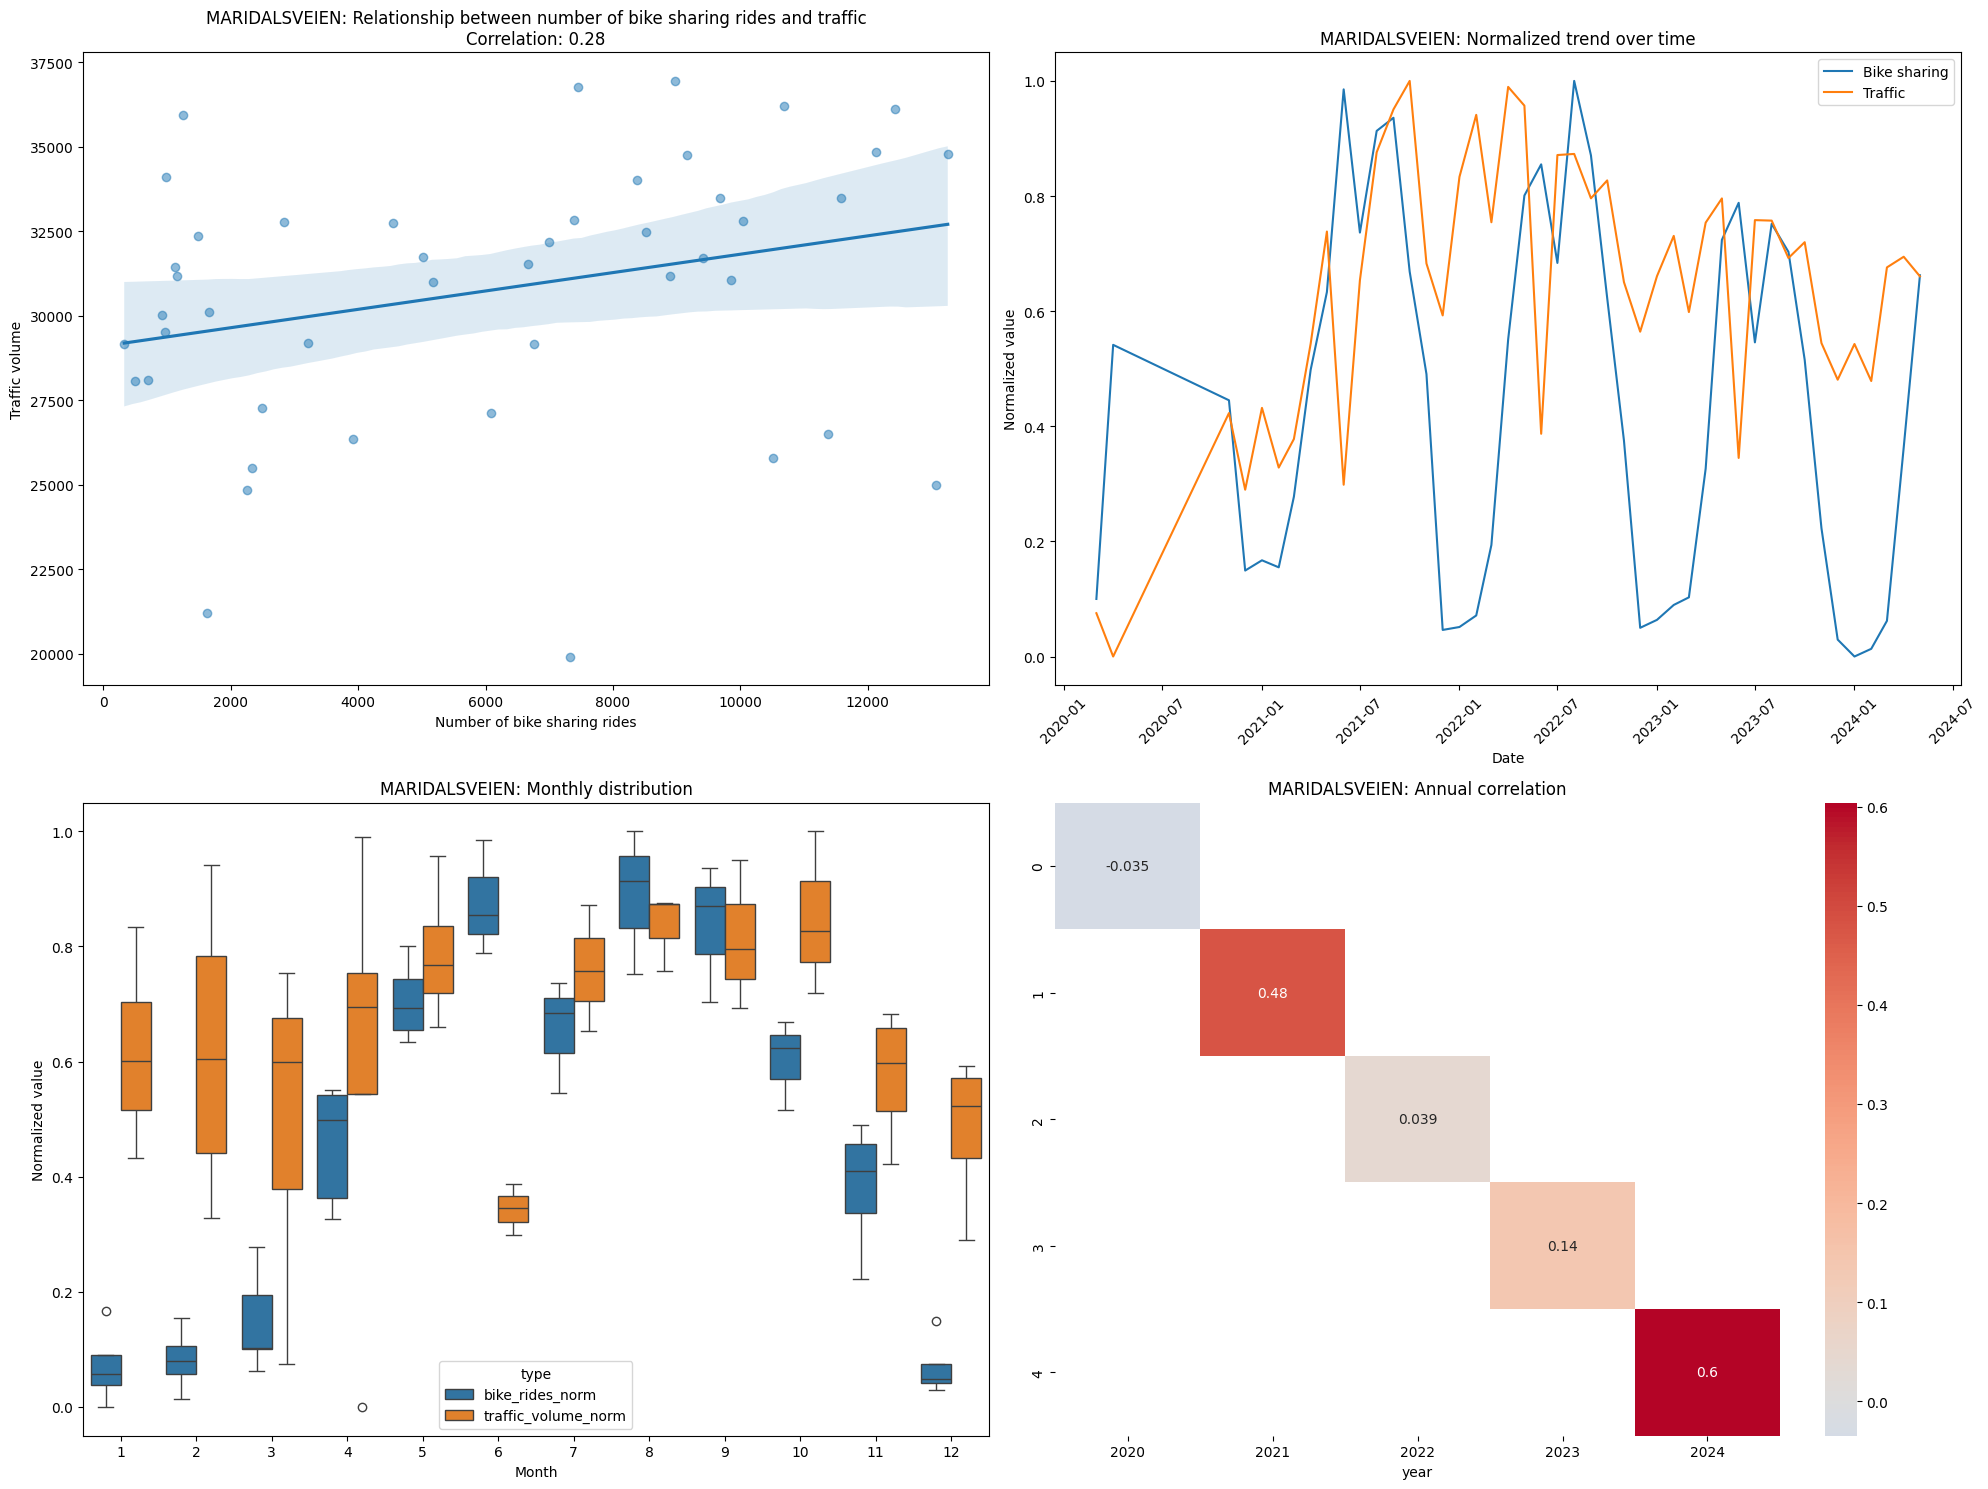

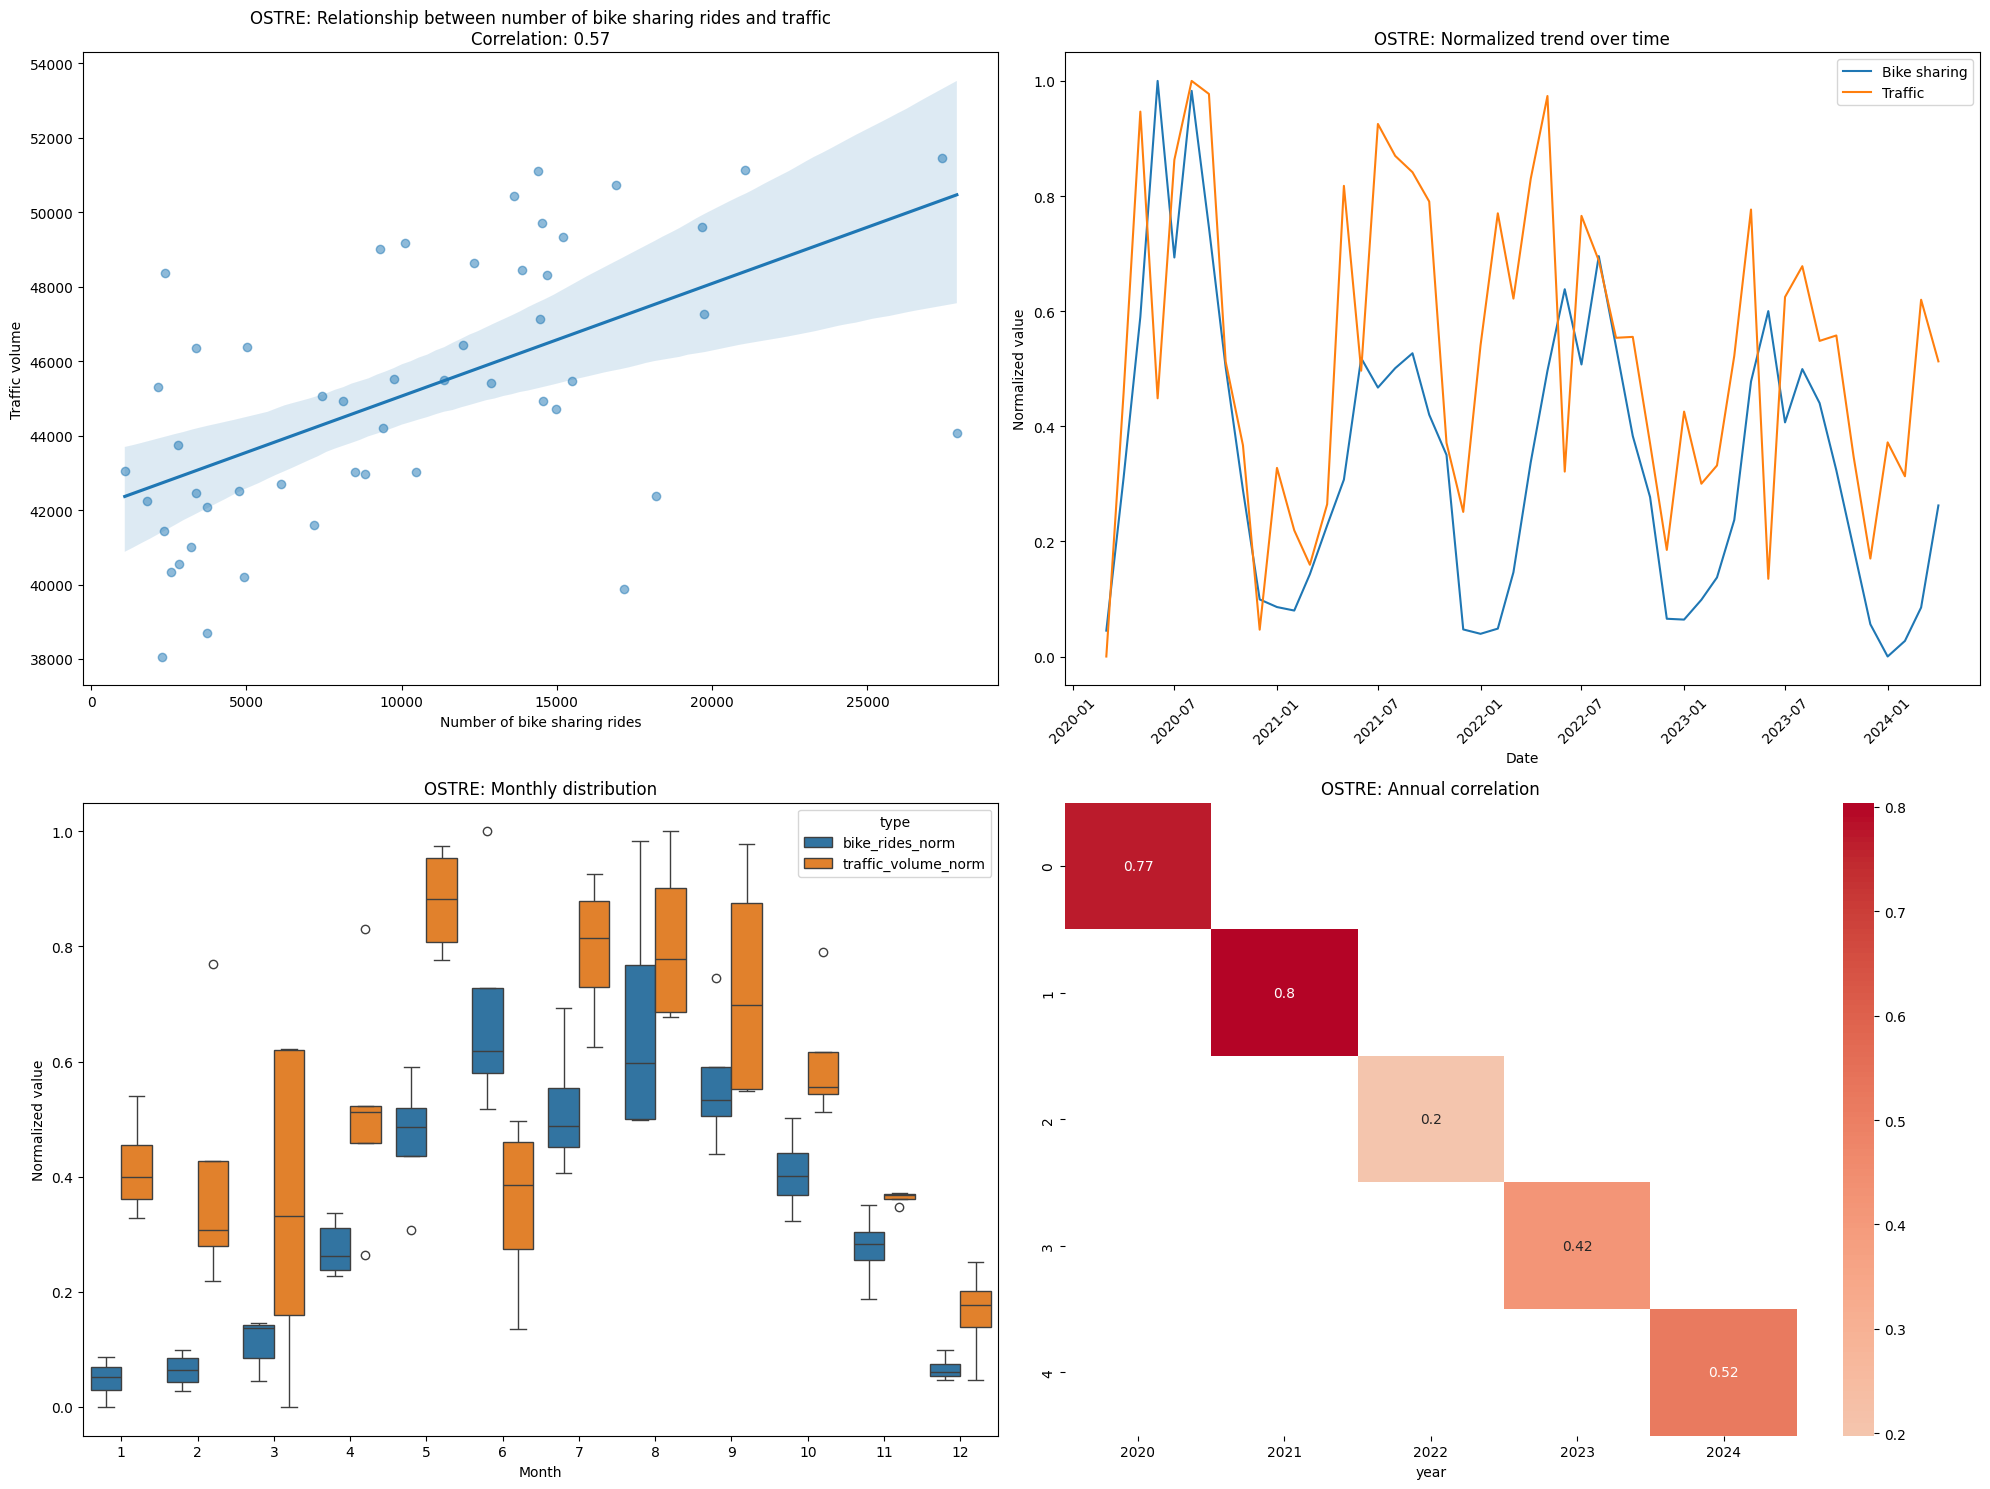

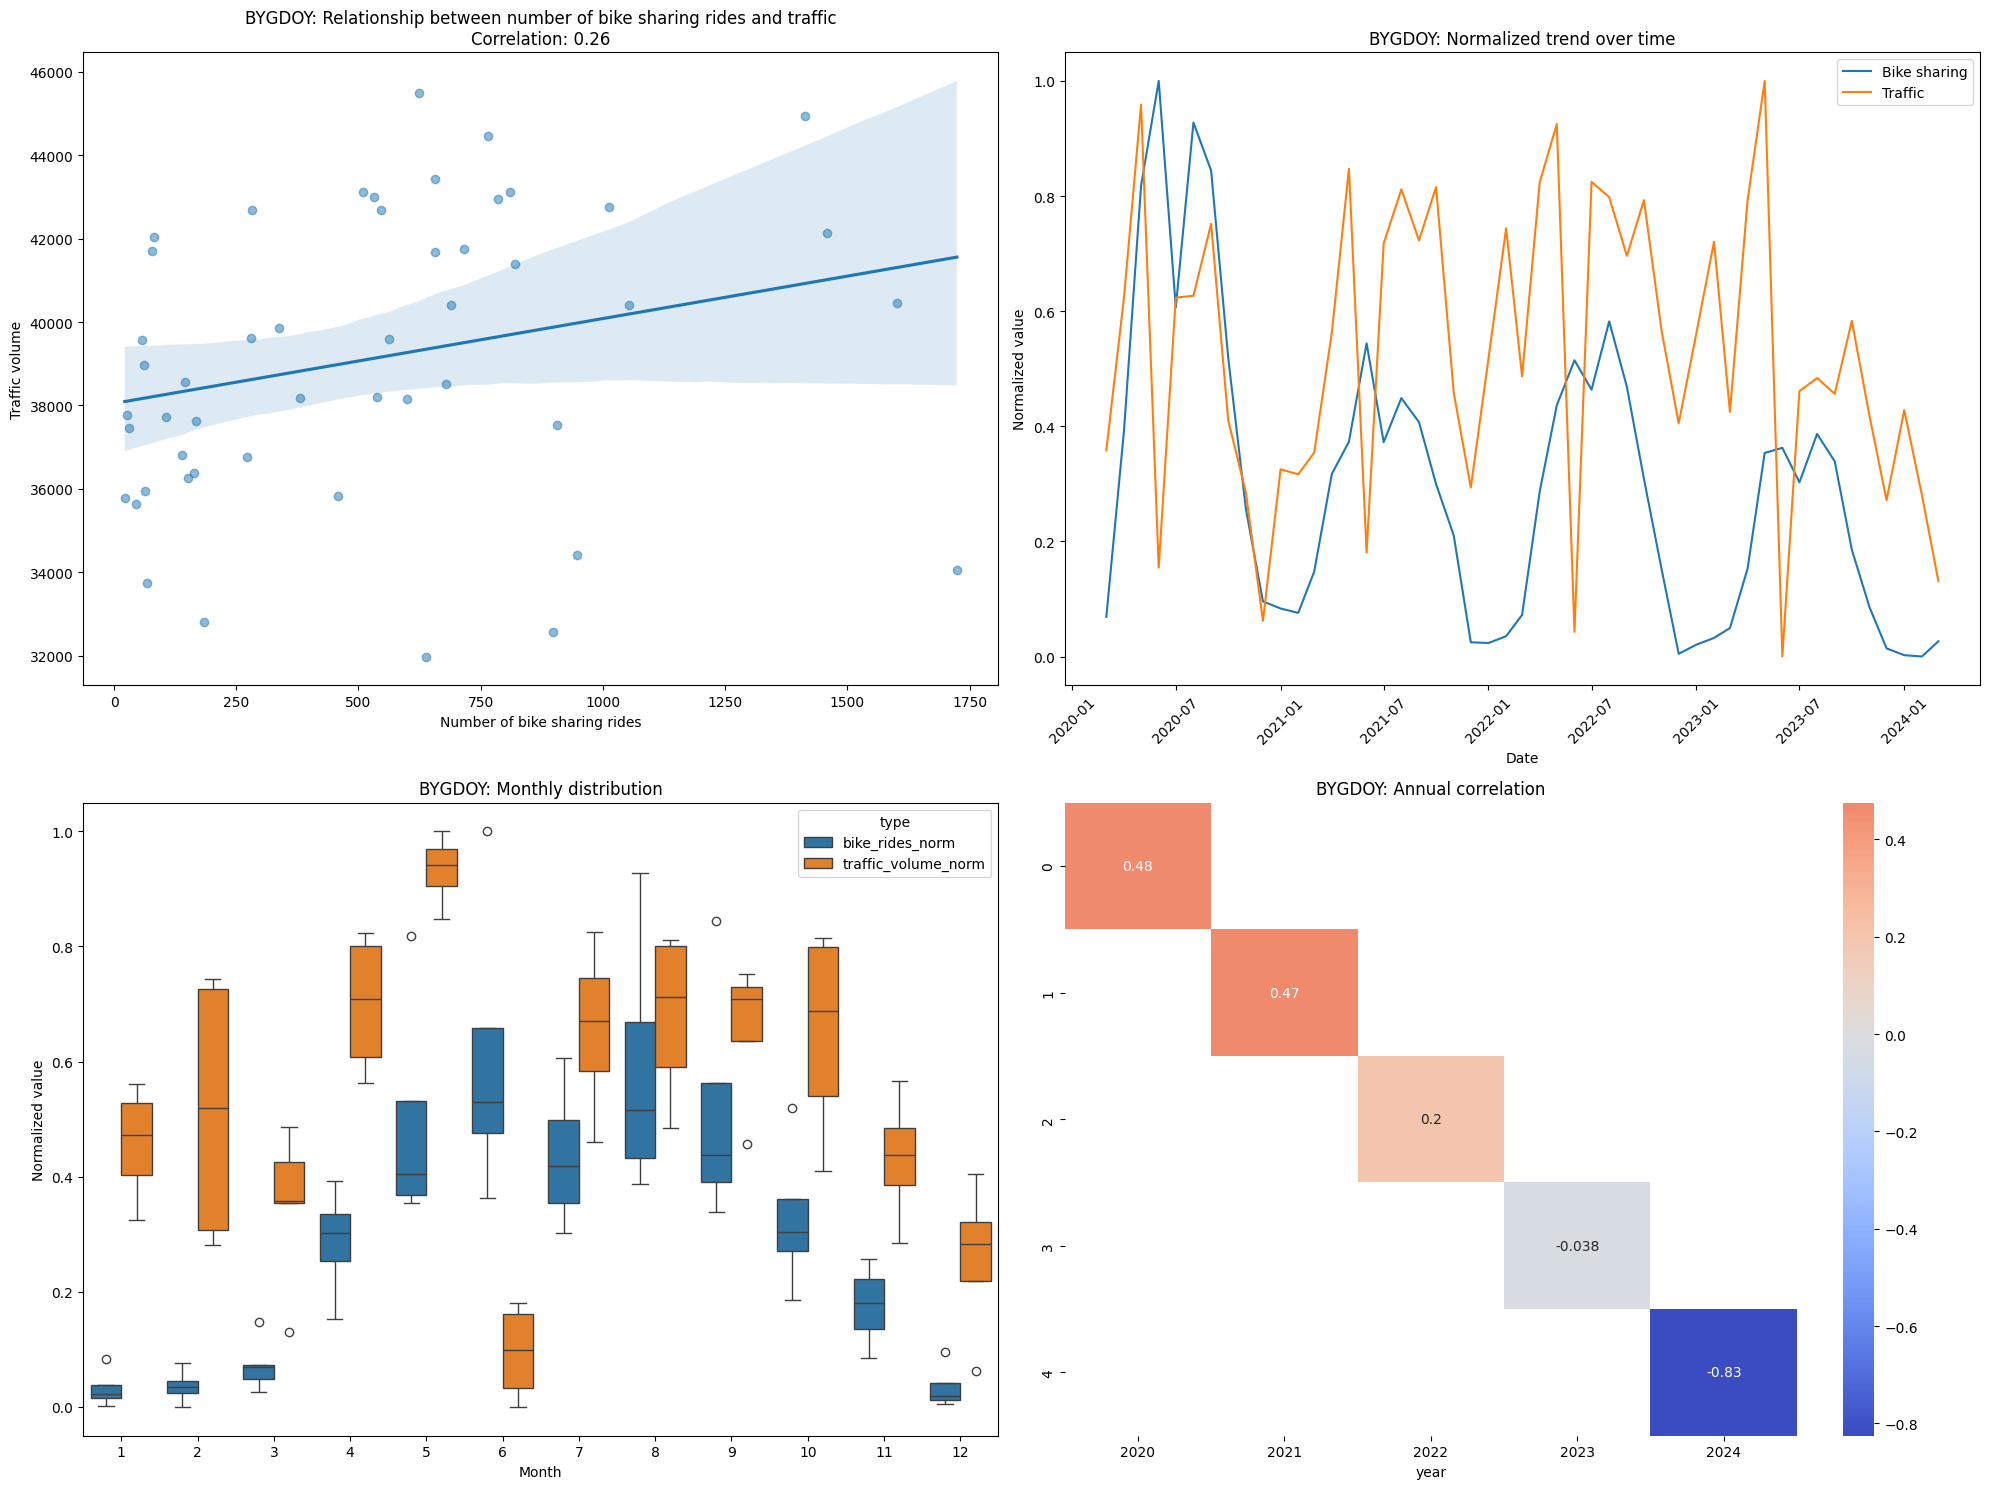

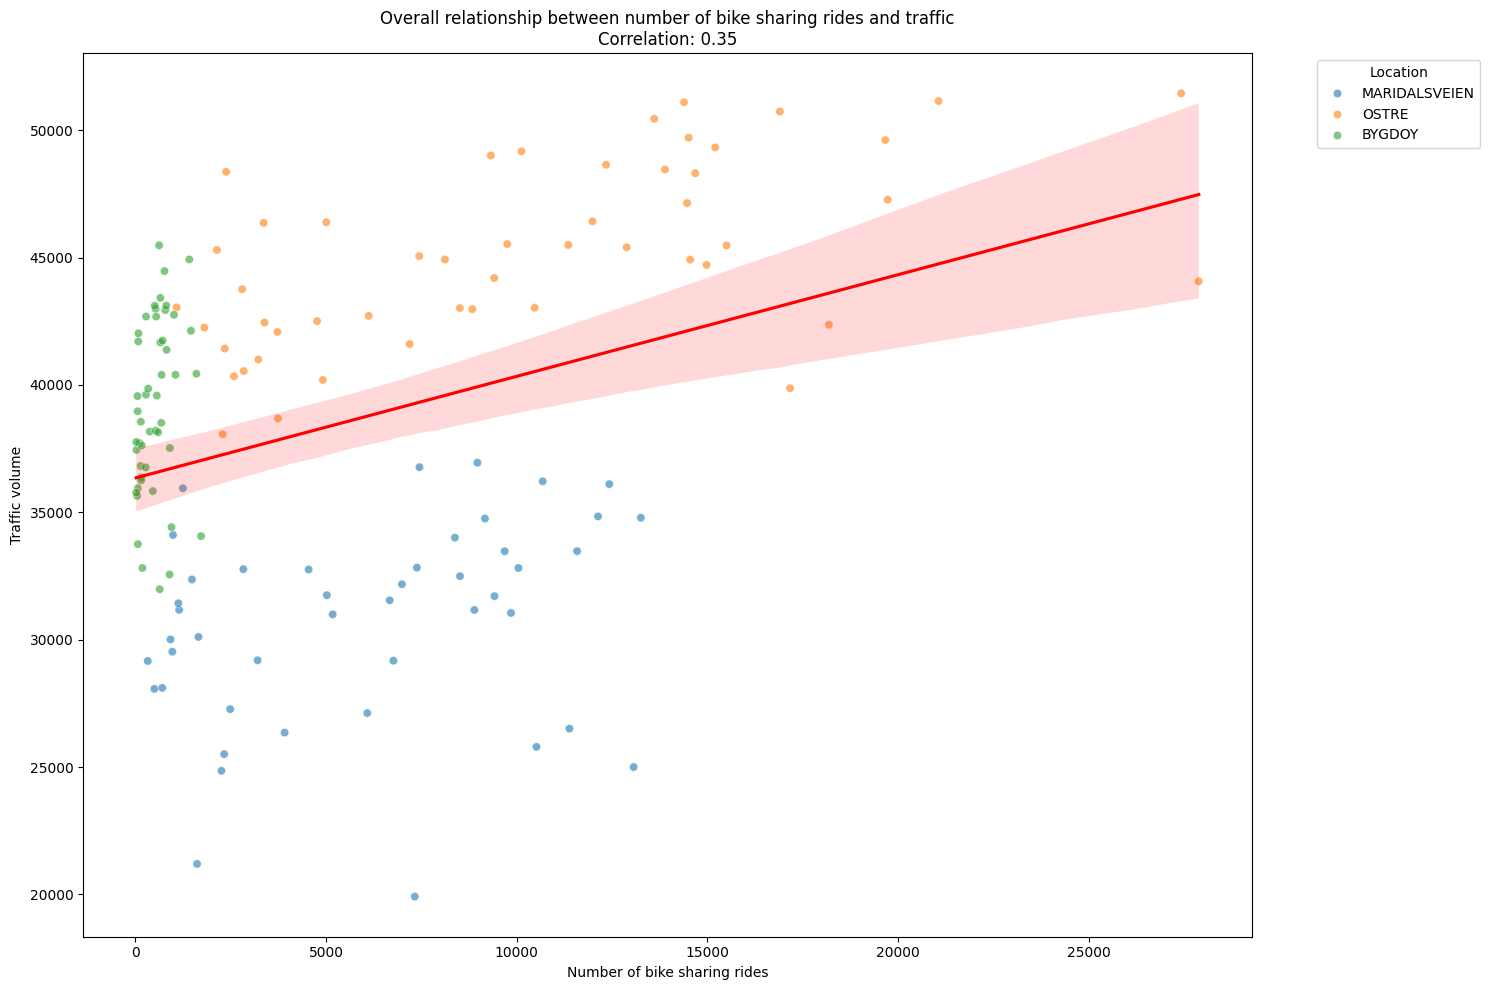

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def prepare_bike_data(df):
    if 'year' in df.columns and 'month' in df.columns:
        monthly = df.groupby(['year', 'month']).size().reset_index(name='bike_rides')
        monthly['date'] = pd.to_datetime(monthly['year'].astype(str) + '-' + monthly['month'].astype(str).str.zfill(2) + '-01')
    else:
        df['date'] = pd.to_datetime(df['started_at'])
        monthly = df.groupby(df['date'].dt.to_period('M')).size().reset_index(name='bike_rides')
        monthly['date'] = monthly['date'].dt.to_timestamp()
    return monthly[['date', 'bike_rides']]

def prepare_traffic_data(df):
    if 'Year' in df.columns and 'Month' in df.columns:
        monthly = df.groupby(['Year', 'Month'])['Traffic_volume'].sum().reset_index()
        monthly['date'] = pd.to_datetime(monthly['Year'].astype(str) + '-' + monthly['Month'].astype(str).str.zfill(2) + '-01')
    else:
        df['date'] = pd.to_datetime(df['date'])
        monthly = df.groupby(df['date'].dt.to_period('M'))['Traffic_volume'].sum().reset_index()
        monthly['date'] = monthly['date'].dt.to_timestamp()
    return monthly[['date', 'Traffic_volume']]

def analyze_traffic_bikesharing(bike_df, traffic_df, location_name):
    bike_monthly = prepare_bike_data(bike_df)
    traffic_monthly = prepare_traffic_data(traffic_df)

    merged = pd.merge(bike_monthly, traffic_monthly, on='date', how='inner')
    merged['year'] = merged['date'].dt.year
    merged['month'] = merged['date'].dt.month

    correlation = merged['bike_rides'].corr(merged['Traffic_volume'])

    merged['bike_rides_norm'] = (merged['bike_rides'] - merged['bike_rides'].min()) / (merged['bike_rides'].max() - merged['bike_rides'].min())
    merged['traffic_volume_norm'] = (merged['Traffic_volume'] - merged['Traffic_volume'].min()) / (merged['Traffic_volume'].max() - merged['Traffic_volume'].min())

    plt.figure(figsize=(20, 15))

    plt.subplot(2, 2, 1)
    sns.regplot(x='bike_rides', y='Traffic_volume', data=merged, scatter_kws={'alpha':0.5})
    plt.title(f'{location_name}: Relationship between number of bike sharing rides and traffic\nCorrelation: {correlation:.2f}')
    plt.xlabel('Number of bike sharing rides')
    plt.ylabel('Traffic volume')

    plt.subplot(2, 2, 2)
    plt.plot(merged['date'], merged['bike_rides_norm'], label='Bike sharing')
    plt.plot(merged['date'], merged['traffic_volume_norm'], label='Traffic')
    plt.title(f'{location_name}: Normalized trend over time')
    plt.xlabel('Date')
    plt.ylabel('Normalized value')
    plt.legend()
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 3)
    merged_long = pd.melt(merged, id_vars=['date', 'month'], value_vars=['bike_rides_norm', 'traffic_volume_norm'], var_name='type', value_name='value')
    sns.boxplot(x='month', y='value', hue='type', data=merged_long)
    plt.title(f'{location_name}: Monthly distribution')
    plt.xlabel('Month')
    plt.ylabel('Normalized value')

    plt.subplot(2, 2, 4)
    yearly_corr = merged.groupby('year').apply(lambda x: x['bike_rides'].corr(x['Traffic_volume'])).reset_index()
    yearly_corr.columns = ['year', 'correlation']
    yearly_corr_pivot = yearly_corr.pivot(columns='year', values='correlation')
    sns.heatmap(yearly_corr_pivot, annot=True, cmap='coolwarm', center=0)
    plt.title(f'{location_name}: Annual correlation')

    plt.tight_layout()
    plt.savefig(f'complete_analysis_bikesharing_traffic_{location_name}.png')
    #plt.close()

    slope, intercept, r_value, p_value, std_err = stats.linregress(merged['bike_rides'], merged['Traffic_volume'])

    merged['season'] = pd.cut(merged['month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Autumn'])
    seasonal_corr = merged.groupby('season').apply(lambda x: x['bike_rides'].corr(x['Traffic_volume']))

    print(f"\nResults for {location_name}:")
    print(f"Overall correlation: {correlation:.2f}")
    print(f"Coefficient of determination (R^2): {r_value**2:.2f}")
    print(f"P-value: {p_value:.4f}")
    print(f"\nSlope of regression line: {slope:.2f}")
    print(f"Intercept of regression line: {intercept:.2f}")

    print("\nSeasonal correlation:")
    print(seasonal_corr)

    print("\nTop 5 months with highest number of bike sharing rides:")
    print(merged.nlargest(5, 'bike_rides')[['date', 'bike_rides', 'Traffic_volume']])

    print("\nTop 5 months with lowest traffic volume:")
    print(merged.nsmallest(5, 'Traffic_volume')[['date', 'bike_rides', 'Traffic_volume']])

    return merged

def analyze_combined_data(bike_dfs, traffic_dfs, location_names):
    combined_data = pd.DataFrame()

    for bike_df, traffic_df, location in zip(bike_dfs, traffic_dfs, location_names):
        merged = analyze_traffic_bikesharing(bike_df, traffic_df, location)
        merged['location'] = location
        combined_data = pd.concat([combined_data, merged])

    correlation = combined_data['bike_rides'].corr(combined_data['Traffic_volume'])

    plt.figure(figsize=(15, 10))

    # Scatterplot with colors for location
    sns.scatterplot(x='bike_rides', y='Traffic_volume', hue='location', data=combined_data, alpha=0.6)

    # Adding regression line
    sns.regplot(x='bike_rides', y='Traffic_volume', data=combined_data, scatter=False, color='red')

    plt.title(f'Overall relationship between number of bike sharing rides and traffic\nCorrelation: {correlation:.2f}')
    plt.xlabel('Number of bike sharing rides')
    plt.ylabel('Traffic volume')
    plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig('overall_analysis_bikesharing_traffic.png', bbox_inches='tight')
    #plt.close()

    slope, intercept, r_value, p_value, std_err = stats.linregress(combined_data['bike_rides'], combined_data['Traffic_volume'])

    print("\nOverall results for all areas:")
    print(f"Overall correlation: {correlation:.2f}")
    print(f"Coefficient of determination (R^2): {r_value**2:.2f}")
    print(f"P-value: {p_value:.4f}")
    print(f"\nSlope of regression line: {slope:.2f}")
    print(f"Intercept of regression line: {intercept:.2f}")

    for location in location_names:
        location_data = combined_data[combined_data['location'] == location]
        loc_correlation = location_data['bike_rides'].corr(location_data['Traffic_volume'])
        print(f"\nCorrelation for {location}: {loc_correlation:.2f}")

def print_data_info(bike_df, traffic_df, location_name):
    print(f"\nInformation for {location_name}:")
    print("Date range for bike sharing:", bike_df['started_at'].min(), "-", bike_df['started_at'].max())
    print("Date range for traffic:", traffic_df['date'].min() if 'date' in traffic_df.columns else f"{traffic_df['Year'].min()}-{traffic_df['Month'].min()}", "-",
          traffic_df['date'].max() if 'date' in traffic_df.columns else f"{traffic_df['Year'].max()}-{traffic_df['Month'].max()}")
    print("Total number of bike sharing rides:", len(bike_df))
    print("Total number of traffic records:", len(traffic_df))

# Execution of the analysis
locations = ["MARIDALSVEIEN", "OSTRE", "BYGDOY"]
bike_dfs = [bike_df_MARIDALSVEIEN, bike_df_OSTRE, bike_df_BYGDOY]
traffic_dfs = [traffic_df_MARIDALSVEIEN, traffic_df_OSTRE, traffic_df_BYGDOY]

# Combined analysis
analyze_combined_data(bike_dfs, traffic_dfs, locations)

# Print data information
#for bike_df, traffic_df, location in zip(bike_dfs, traffic_dfs, locations):
 #   print_data_info(bike_df, traffic_df, location)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def prepare_bike_data(df):
    df['date'] = pd.to_datetime(df['started_at'])
    monthly = df.groupby(df['date'].dt.to_period('M')).size().reset_index(name='bike_rides')
    monthly['date'] = monthly['date'].dt.to_timestamp()
    return monthly[['date', 'bike_rides']]

def prepare_traffic_data(df):
    if 'Year' in df.columns and 'Month' in df.columns:
        monthly = df.groupby(['Year', 'Month'])['12_5m_to_16_0m'].sum().reset_index()
        monthly['date'] = pd.to_datetime(monthly['Year'].astype(str) + '-' + monthly['Month'].astype(str).str.zfill(2) + '-01')
    else:
        df['date'] = pd.to_datetime(df['date'])
        monthly = df.groupby(df['date'].dt.to_period('M'))['12_5m_to_16_0m'].sum().reset_index()
        monthly['date'] = monthly['date'].dt.to_timestamp()
    return monthly[['date', '12_5m_to_16_0m']]

def analyze_traffic_bikesharing(bike_df, traffic_df, location_name):
    bike_monthly = prepare_bike_data(bike_df)
    traffic_monthly = prepare_traffic_data(traffic_df)

    merged = pd.merge(bike_monthly, traffic_monthly, on='date', how='inner')

    correlation = merged['bike_rides'].corr(merged['12_5m_to_16_0m'])

    plt.figure(figsize=(10, 6))
    sns.regplot(x='bike_rides', y='12_5m_to_16_0m', data=merged, scatter_kws={'alpha':0.5})
    plt.title(f'{location_name}: Correlazione tra biciclette e veicoli 12.5m-16.0m\nCorrelazione: {correlation:.2f}')
    plt.xlabel('Numero di corse in bicicletta')
    plt.ylabel('Numero di veicoli 12.5m-16.0m')
    plt.savefig(f'correlation_analysis_{location_name}.png')
    plt.close()

    slope, intercept, r_value, p_value, std_err = stats.linregress(merged['bike_rides'], merged['12_5m_to_16_0m'])

    print(f"\nRisultati per {location_name}:")
    print(f"Correlazione: {correlation:.2f}")
    print(f"Coefficiente di determinazione (R^2): {r_value**2:.2f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Pendenza della retta di regressione: {slope:.2f}")
    print(f"Intercetta della retta di regressione: {intercept:.2f}")

    return merged

# Esecuzione dell'analisi
locations = ["MARIDALSVEIEN", "OSTRE", "BYGDOY"]
bike_dfs = [bike_df_MARIDALSVEIEN, bike_df_OSTRE, bike_df_BYGDOY]
traffic_dfs = [traffic_df_MARIDALSVEIEN, traffic_df_OSTRE, traffic_df_BYGDOY]

for bike_df, traffic_df, location in zip(bike_dfs, traffic_dfs, locations):
    analyze_traffic_bikesharing(bike_df, traffic_df, location)


Risultati per MARIDALSVEIEN:
Correlazione: 0.36
Coefficiente di determinazione (R^2): 0.13
P-value: 0.0154
Pendenza della retta di regressione: 0.00
Intercetta della retta di regressione: 34.03

Risultati per OSTRE:
Correlazione: 0.37
Coefficiente di determinazione (R^2): 0.14
P-value: 0.0077
Pendenza della retta di regressione: 0.01
Intercetta della retta di regressione: 536.44

Risultati per BYGDOY:
Correlazione: 0.09
Coefficiente di determinazione (R^2): 0.01
P-value: 0.5404
Pendenza della retta di regressione: 0.01
Intercetta della retta di regressione: 144.31


<ipython-input-4-d5ebf701c483>:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_corr = merged.groupby('season').apply(lambda x: x['bike_rides'].corr(x['Traffic_volume']))



Results for MARIDALSVEIEN:
Overall correlation: 0.28
Coefficient of determination (R^2): 0.08
P-value: 0.0594

Slope of regression line: 0.27
Intercept of regression line: 29105.13

Seasonal correlation:
season
Winter   -0.283321
Spring   -0.243538
Summer    0.598885
Autumn    0.709448
dtype: float64

Top 5 months with highest number of bike sharing rides:
         date  bike_rides  Traffic_volume
23 2022-08-01       13254           34790
9  2021-06-01       13064           25002
12 2021-09-01       12426           36108
11 2021-08-01       12131           34840
24 2022-09-01       11581           33477

Top 5 months with lowest traffic volume:
        date  bike_rides  Traffic_volume
1 2020-04-01        7326           19919
0 2020-03-01        1619           21201
3 2020-12-01        2257           24855
9 2021-06-01       13064           25002
5 2021-02-01        2329           25510


<ipython-input-4-d5ebf701c483>:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_corr = merged.groupby('season').apply(lambda x: x['bike_rides'].corr(x['Traffic_volume']))



Results for OSTRE:
Overall correlation: 0.57
Coefficient of determination (R^2): 0.33
P-value: 0.0000

Slope of regression line: 0.30
Intercept of regression line: 42038.35

Seasonal correlation:
season
Winter   -0.025857
Spring   -0.097575
Summer    0.596248
Autumn    0.835837
dtype: float64

Top 5 months with highest number of bike sharing rides:
         date  bike_rides  Traffic_volume
3  2020-06-01       27881           44070
5  2020-08-01       27419           51450
6  2020-09-01       21058           51147
29 2022-08-01       19724           47275
4  2020-07-01       19661           49614

Top 5 months with lowest traffic volume:
         date  bike_rides  Traffic_volume
0  2020-03-01        2289           38066
9  2020-12-01        3742           38690
39 2023-06-01       17165           39873
12 2021-03-01        4916           40200
45 2023-12-01        2587           40344


<ipython-input-4-d5ebf701c483>:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_corr = merged.groupby('season').apply(lambda x: x['bike_rides'].corr(x['Traffic_volume']))



Results for BYGDOY:
Overall correlation: 0.26
Coefficient of determination (R^2): 0.07
P-value: 0.0730

Slope of regression line: 2.03
Intercept of regression line: 38049.40

Seasonal correlation:
season
Winter   -0.181733
Spring   -0.290260
Summer    0.301861
Autumn    0.433274
dtype: float64

Top 5 months with highest number of bike sharing rides:
        date  bike_rides  Traffic_volume
3 2020-06-01        1724           34067
5 2020-08-01        1601           40444
6 2020-09-01        1459           42130
2 2020-05-01        1414           44928
4 2020-07-01        1054           40401

Top 5 months with lowest traffic volume:
         date  bike_rides  Traffic_volume
39 2023-06-01         639           31983
27 2022-06-01         898           32562
9  2020-12-01         185           32817
48 2024-03-01          67           33752
3  2020-06-01        1724           34067

Overall results for all areas:
Overall correlation: 0.35
Coefficient of determination (R^2): 0.12
P-value:

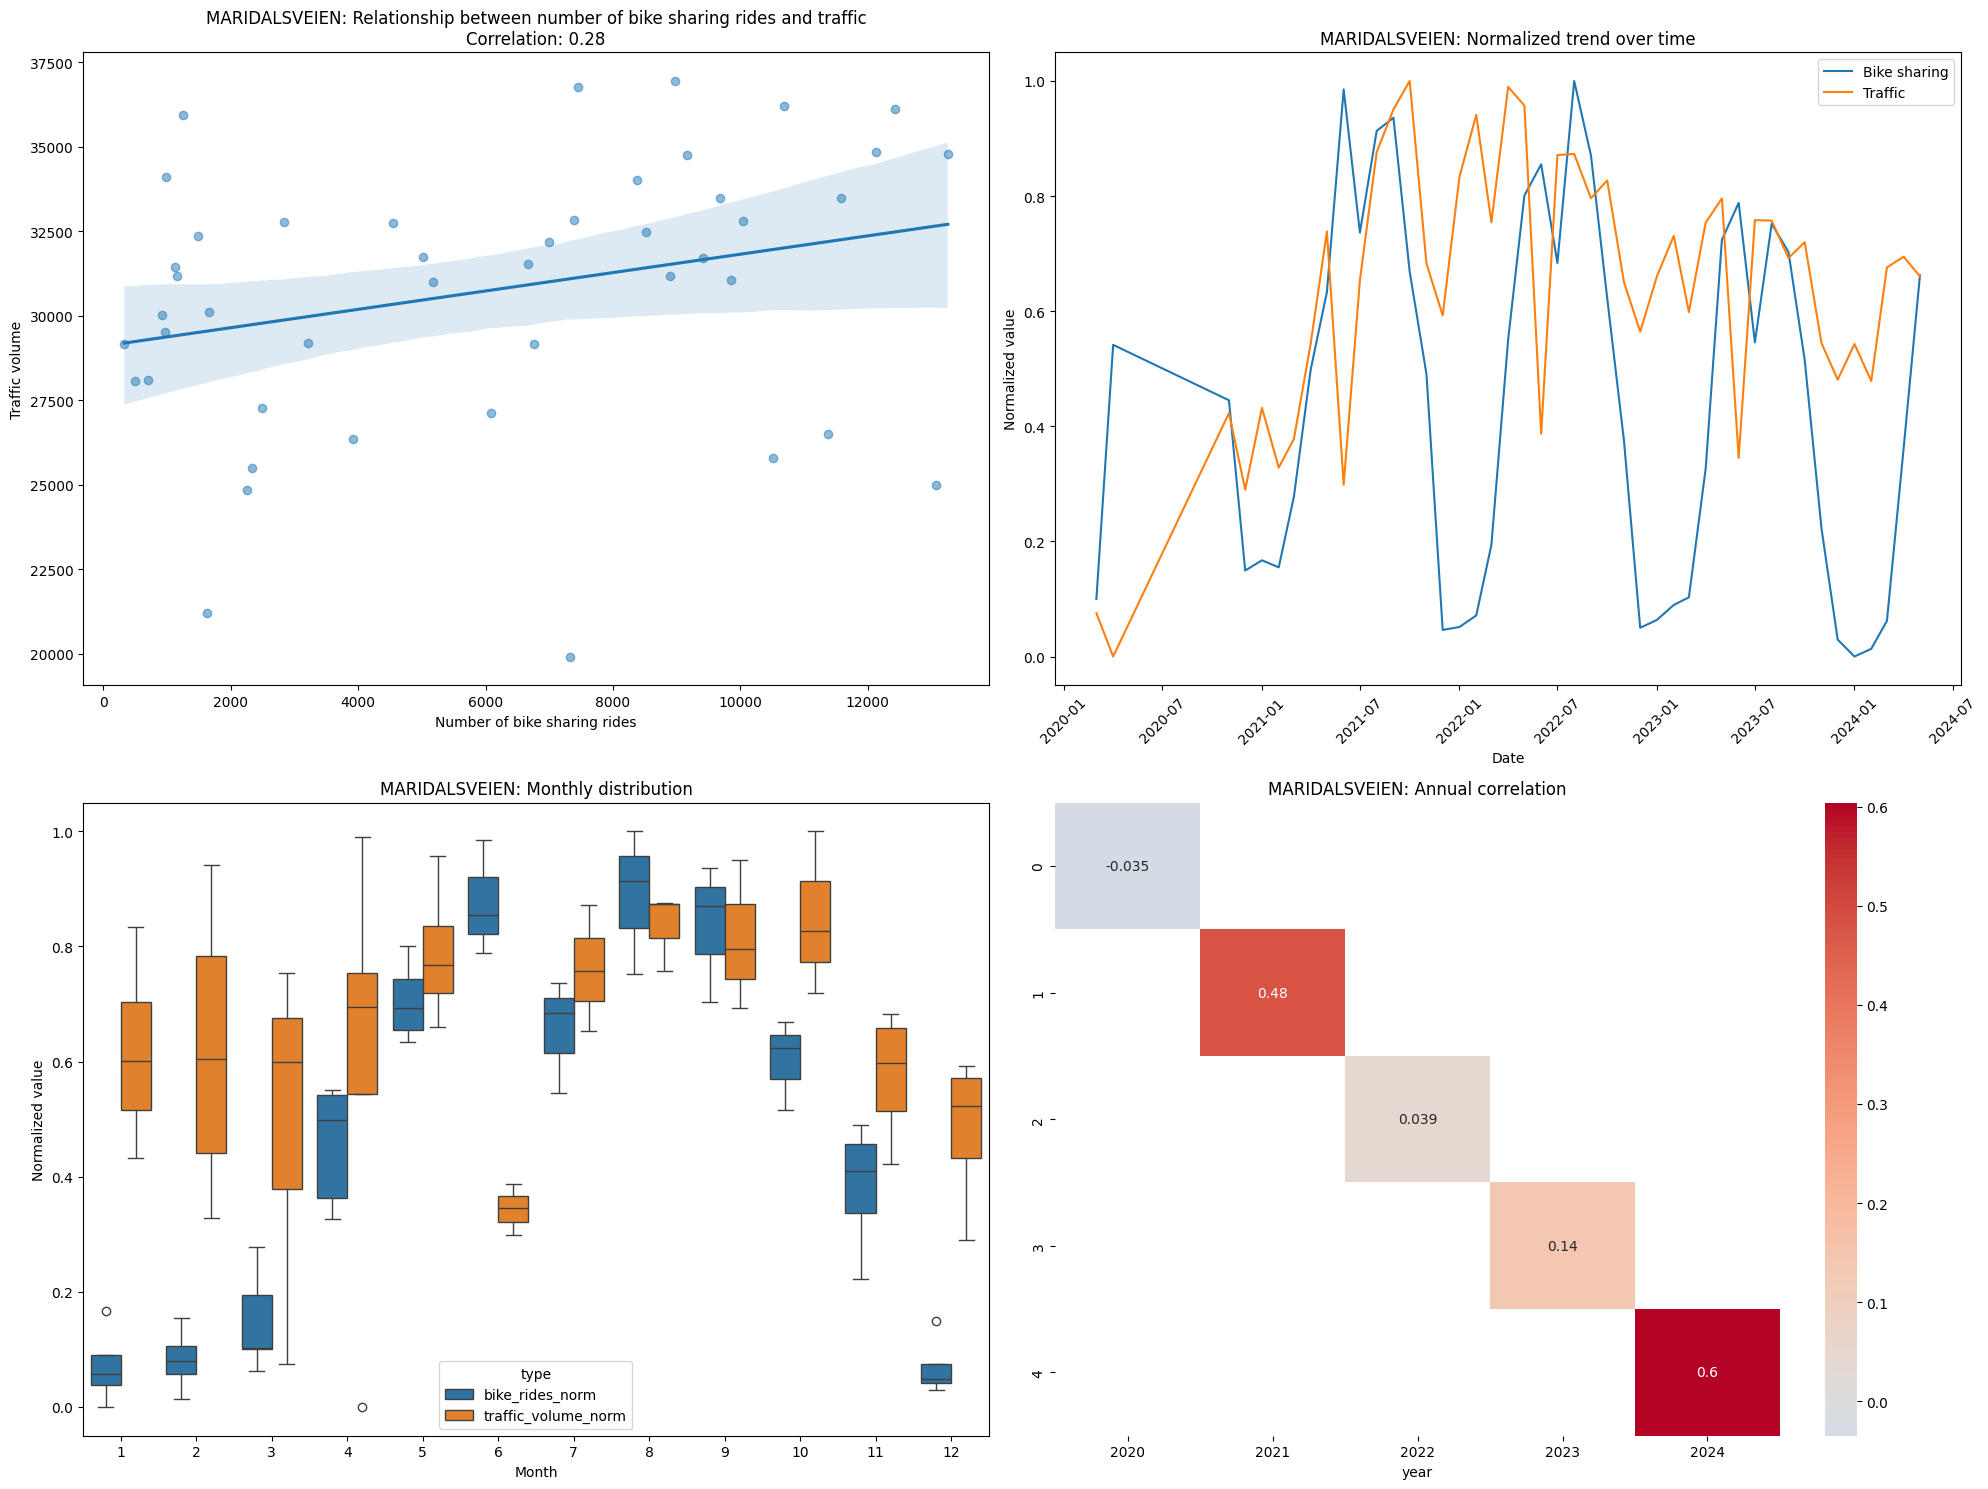

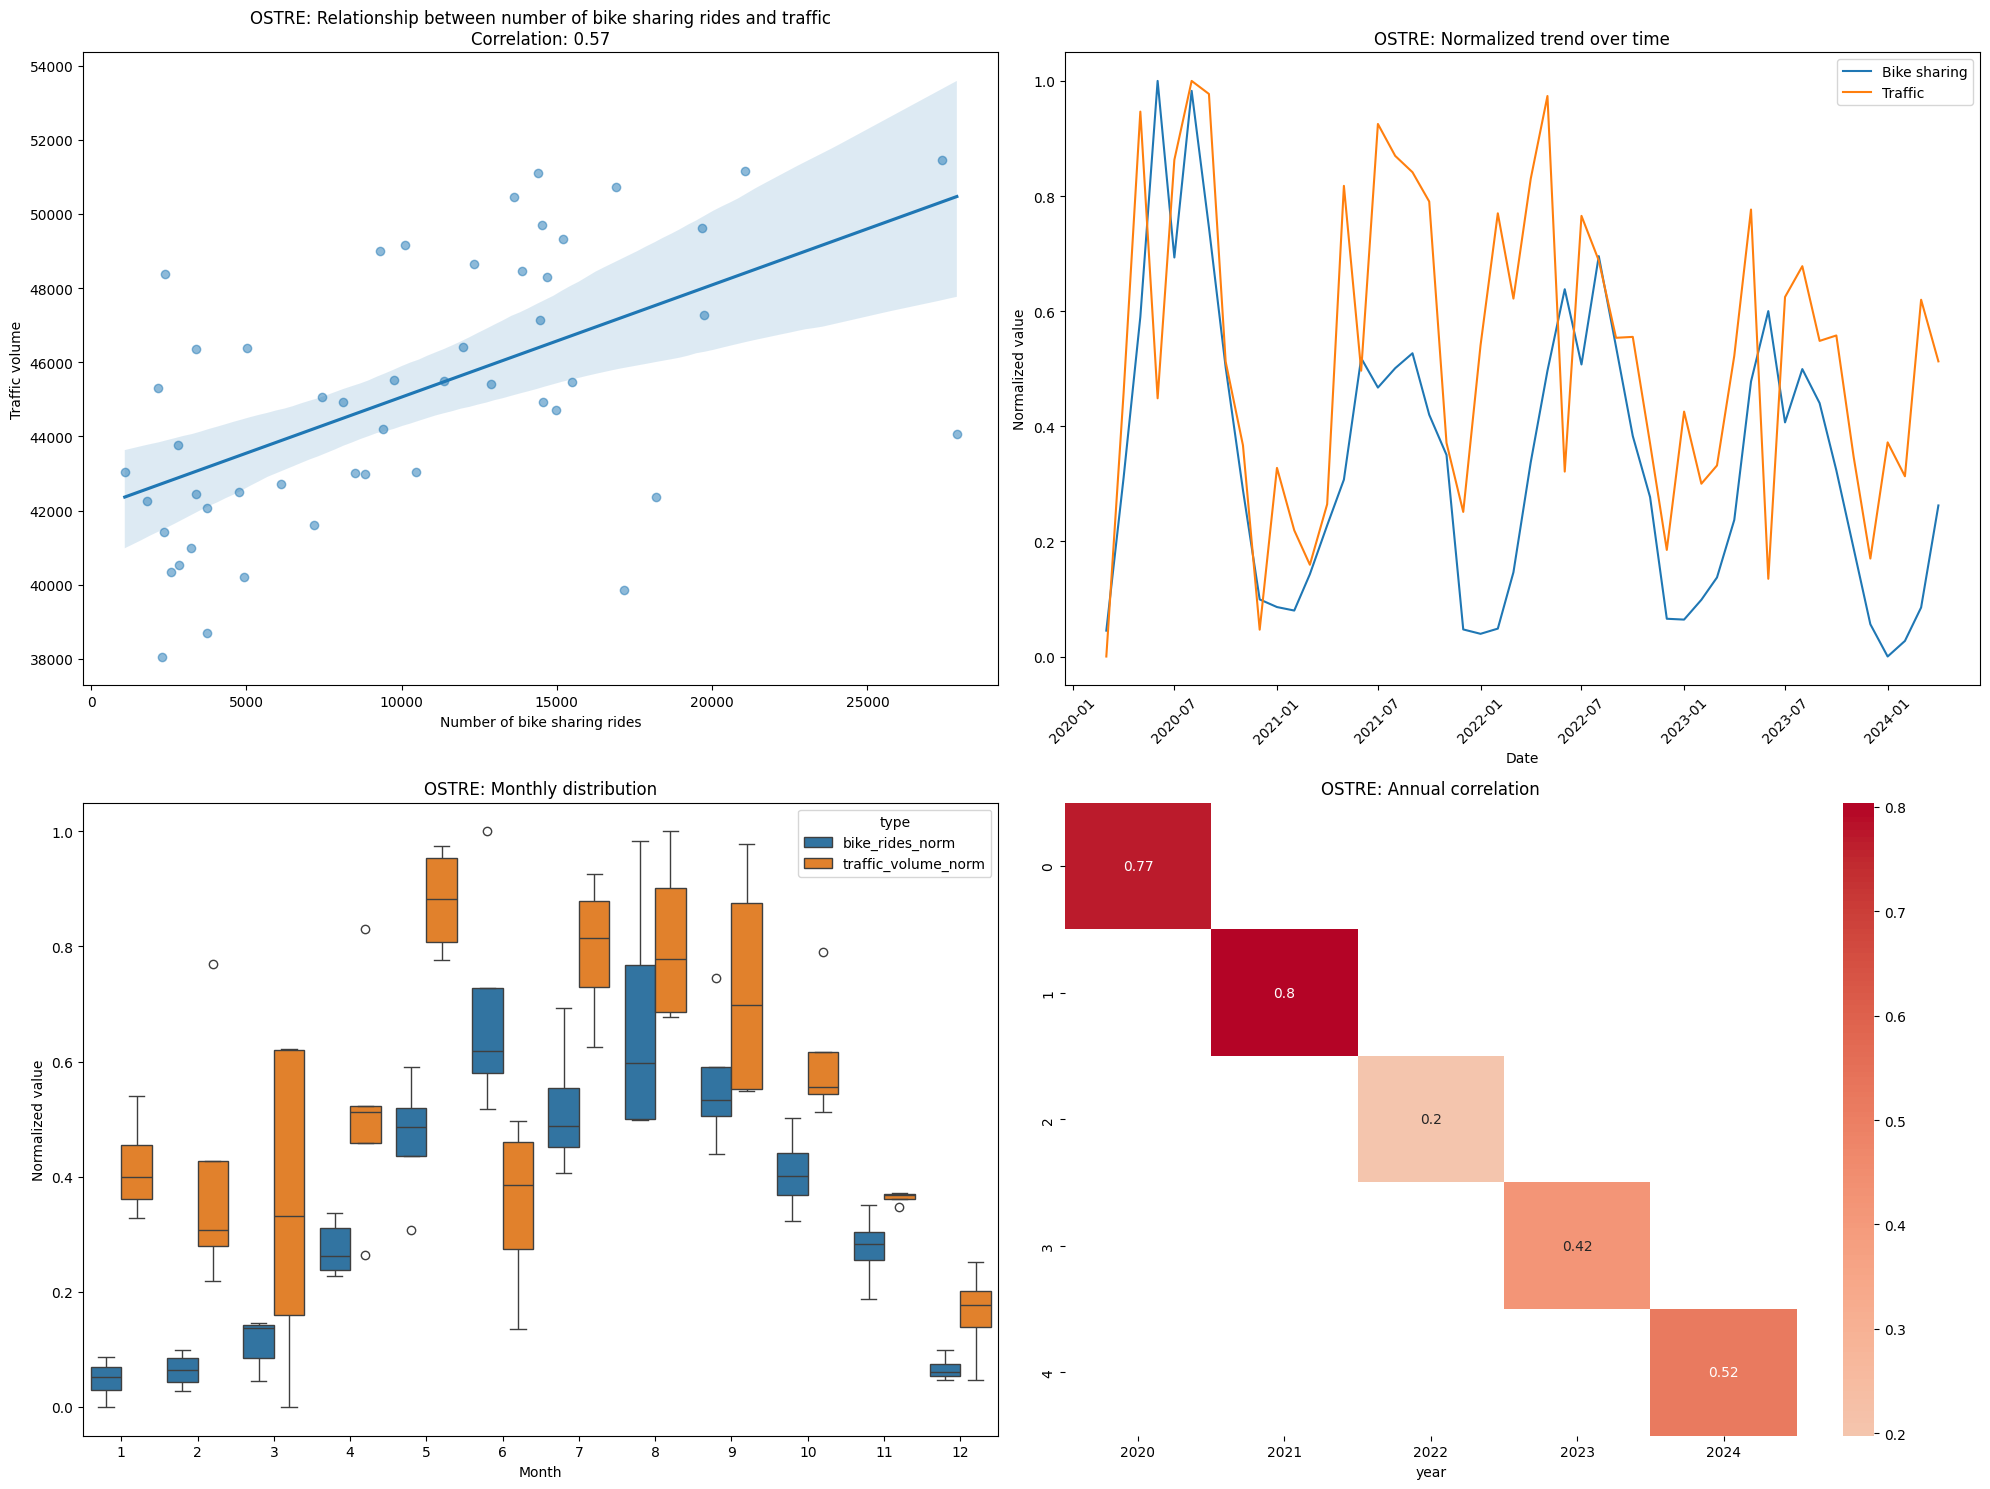

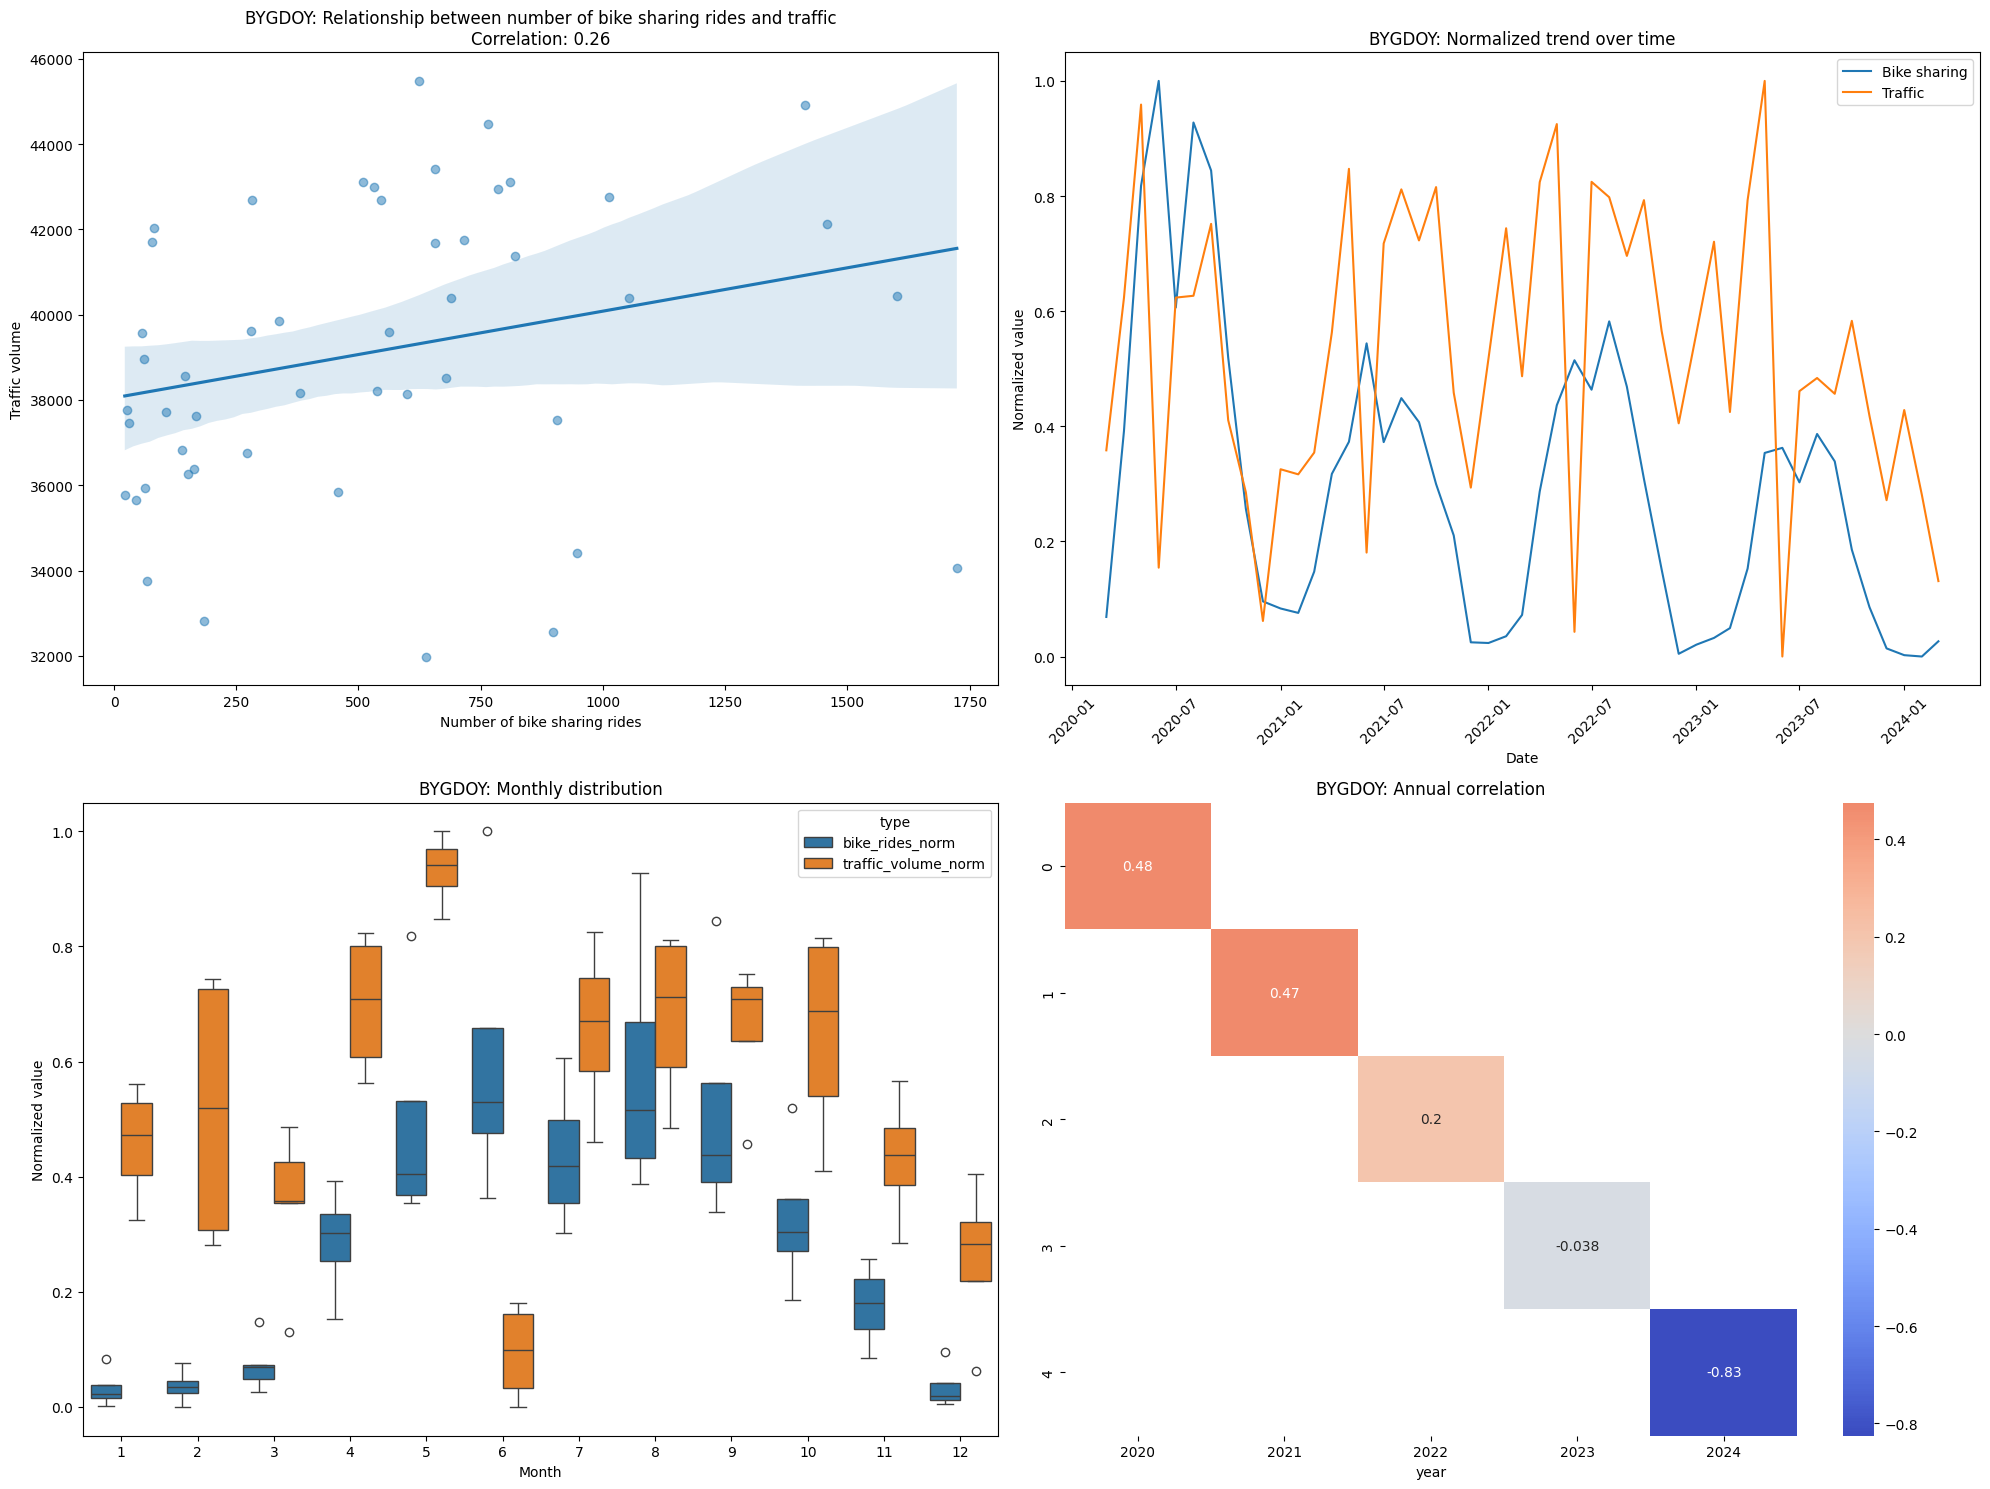

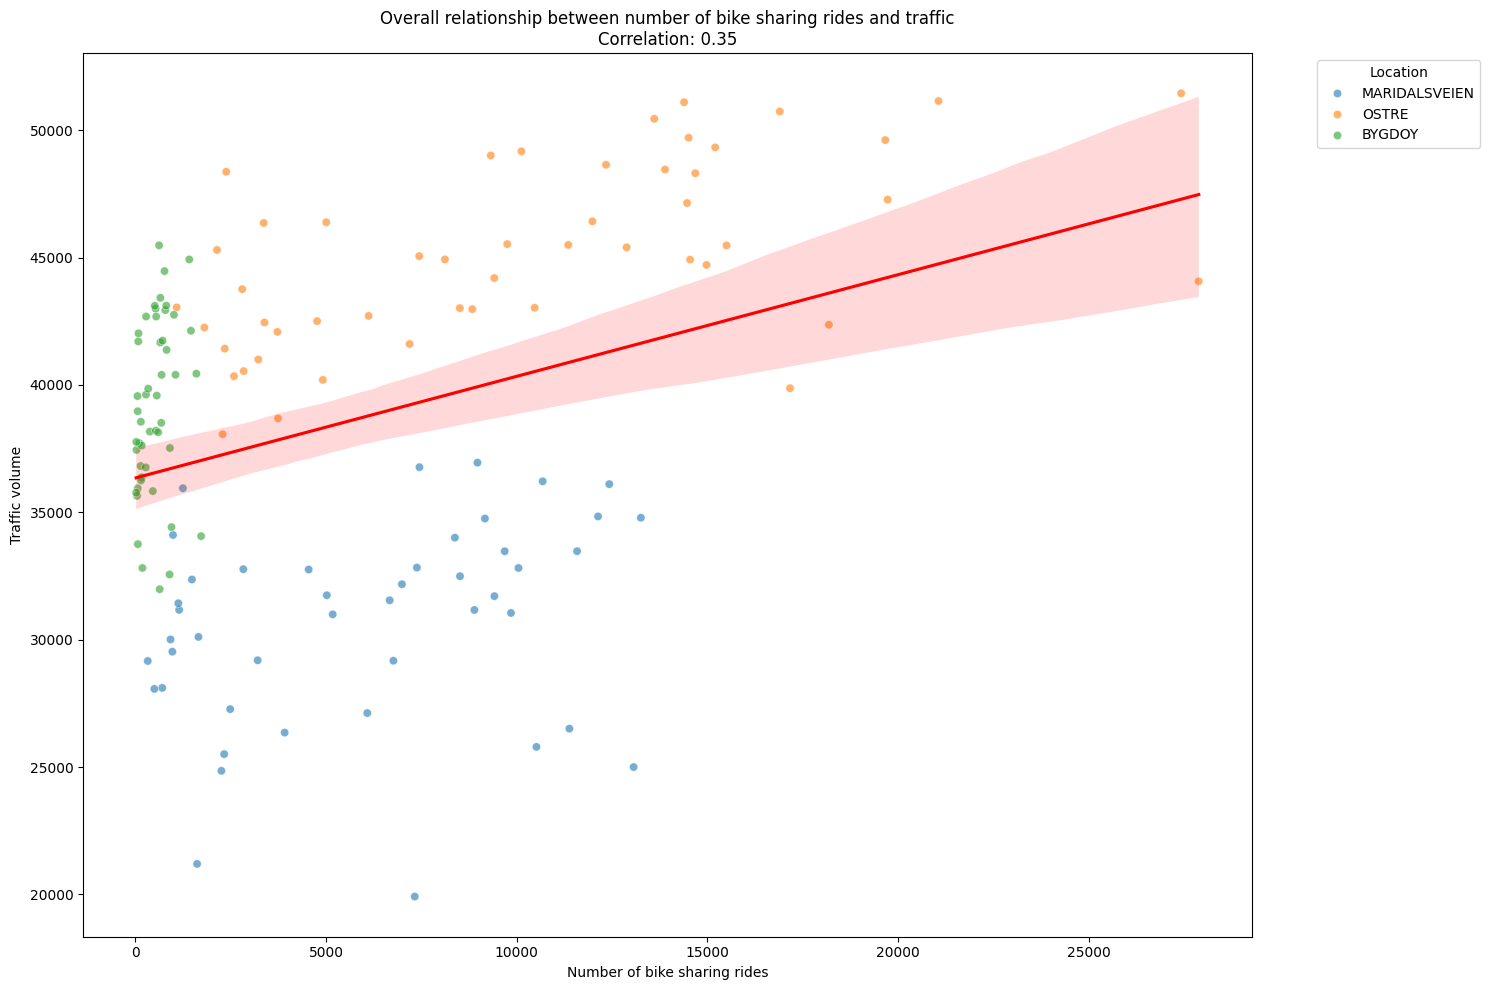

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def prepare_bike_data(df):
    if 'year' in df.columns and 'month' in df.columns:
        monthly = df.groupby(['year', 'month']).size().reset_index(name='bike_rides')
        monthly['date'] = pd.to_datetime(monthly['year'].astype(str) + '-' + monthly['month'].astype(str).str.zfill(2) + '-01')
    else:
        df['date'] = pd.to_datetime(df['started_at'])
        monthly = df.groupby(df['date'].dt.to_period('M')).size().reset_index(name='bike_rides')
        monthly['date'] = monthly['date'].dt.to_timestamp()
    return monthly[['date', 'bike_rides']]

def prepare_traffic_data(df):
    if 'Year' in df.columns and 'Month' in df.columns:
        monthly = df.groupby(['Year', 'Month'])['Traffic_volume'].sum().reset_index()
        monthly['date'] = pd.to_datetime(monthly['Year'].astype(str) + '-' + monthly['Month'].astype(str).str.zfill(2) + '-01')
    else:
        df['date'] = pd.to_datetime(df['date'])
        monthly = df.groupby(df['date'].dt.to_period('M'))['Traffic_volume'].sum().reset_index()
        monthly['date'] = monthly['date'].dt.to_timestamp()
    return monthly[['date', 'Traffic_volume']]

def analyze_traffic_bikesharing(bike_df, traffic_df, location_name):
    bike_monthly = prepare_bike_data(bike_df)
    traffic_monthly = prepare_traffic_data(traffic_df)

    merged = pd.merge(bike_monthly, traffic_monthly, on='date', how='inner')
    merged['year'] = merged['date'].dt.year
    merged['month'] = merged['date'].dt.month

    correlation = merged['bike_rides'].corr(merged['Traffic_volume'])

    merged['bike_rides_norm'] = (merged['bike_rides'] - merged['bike_rides'].min()) / (merged['bike_rides'].max() - merged['bike_rides'].min())
    merged['traffic_volume_norm'] = (merged['Traffic_volume'] - merged['Traffic_volume'].min()) / (merged['Traffic_volume'].max() - merged['Traffic_volume'].min())

    plt.figure(figsize=(20, 15))

    plt.subplot(2, 2, 1)
    sns.regplot(x='bike_rides', y='Traffic_volume', data=merged, scatter_kws={'alpha':0.5})
    plt.title(f'{location_name}: Relationship between number of bike sharing rides and traffic\nCorrelation: {correlation:.2f}')
    plt.xlabel('Number of bike sharing rides')
    plt.ylabel('Traffic volume')

    plt.subplot(2, 2, 2)
    plt.plot(merged['date'], merged['bike_rides_norm'], label='Bike sharing')
    plt.plot(merged['date'], merged['traffic_volume_norm'], label='Traffic')
    plt.title(f'{location_name}: Normalized trend over time')
    plt.xlabel('Date')
    plt.ylabel('Normalized value')
    plt.legend()
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 3)
    merged_long = pd.melt(merged, id_vars=['date', 'month'], value_vars=['bike_rides_norm', 'traffic_volume_norm'], var_name='type', value_name='value')
    sns.boxplot(x='month', y='value', hue='type', data=merged_long)
    plt.title(f'{location_name}: Monthly distribution')
    plt.xlabel('Month')
    plt.ylabel('Normalized value')

    plt.subplot(2, 2, 4)
    yearly_corr = merged.groupby('year').apply(lambda x: x['bike_rides'].corr(x['Traffic_volume'])).reset_index()
    yearly_corr.columns = ['year', 'correlation']
    yearly_corr_pivot = yearly_corr.pivot(columns='year', values='correlation')
    sns.heatmap(yearly_corr_pivot, annot=True, cmap='coolwarm', center=0)
    plt.title(f'{location_name}: Annual correlation')

    plt.tight_layout()
    plt.savefig(f'complete_analysis_bikesharing_traffic_{location_name}.png')
    #plt.close()

    slope, intercept, r_value, p_value, std_err = stats.linregress(merged['bike_rides'], merged['Traffic_volume'])

    merged['season'] = pd.cut(merged['month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Autumn'])
    seasonal_corr = merged.groupby('season').apply(lambda x: x['bike_rides'].corr(x['Traffic_volume']))

    print(f"\nResults for {location_name}:")
    print(f"Overall correlation: {correlation:.2f}")
    print(f"Coefficient of determination (R^2): {r_value**2:.2f}")
    print(f"P-value: {p_value:.4f}")
    print(f"\nSlope of regression line: {slope:.2f}")
    print(f"Intercept of regression line: {intercept:.2f}")

    print("\nSeasonal correlation:")
    print(seasonal_corr)

    print("\nTop 5 months with highest number of bike sharing rides:")
    print(merged.nlargest(5, 'bike_rides')[['date', 'bike_rides', 'Traffic_volume']])

    print("\nTop 5 months with lowest traffic volume:")
    print(merged.nsmallest(5, 'Traffic_volume')[['date', 'bike_rides', 'Traffic_volume']])

    return merged

def analyze_combined_data(bike_dfs, traffic_dfs, location_names):
    combined_data = pd.DataFrame()

    for bike_df, traffic_df, location in zip(bike_dfs, traffic_dfs, location_names):
        merged = analyze_traffic_bikesharing(bike_df, traffic_df, location)
        merged['location'] = location
        combined_data = pd.concat([combined_data, merged])

    correlation = combined_data['bike_rides'].corr(combined_data['Traffic_volume'])

    plt.figure(figsize=(15, 10))

    # Scatterplot with colors for location
    sns.scatterplot(x='bike_rides', y='Traffic_volume', hue='location', data=combined_data, alpha=0.6)

    # Adding regression line
    sns.regplot(x='bike_rides', y='Traffic_volume', data=combined_data, scatter=False, color='red')

    plt.title(f'Overall relationship between number of bike sharing rides and traffic\nCorrelation: {correlation:.2f}')
    plt.xlabel('Number of bike sharing rides')
    plt.ylabel('Traffic volume')
    plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig('overall_analysis_bikesharing_traffic.png', bbox_inches='tight')
    #plt.close()

    slope, intercept, r_value, p_value, std_err = stats.linregress(combined_data['bike_rides'], combined_data['Traffic_volume'])

    print("\nOverall results for all areas:")
    print(f"Overall correlation: {correlation:.2f}")
    print(f"Coefficient of determination (R^2): {r_value**2:.2f}")
    print(f"P-value: {p_value:.4f}")
    print(f"\nSlope of regression line: {slope:.2f}")
    print(f"Intercept of regression line: {intercept:.2f}")

    for location in location_names:
        location_data = combined_data[combined_data['location'] == location]
        loc_correlation = location_data['bike_rides'].corr(location_data['Traffic_volume'])
        print(f"\nCorrelation for {location}: {loc_correlation:.2f}")

def print_data_info(bike_df, traffic_df, location_name):
    print(f"\nInformation for {location_name}:")
    print("Date range for bike sharing:", bike_df['started_at'].min(), "-", bike_df['started_at'].max())
    print("Date range for traffic:", traffic_df['date'].min() if 'date' in traffic_df.columns else f"{traffic_df['Year'].min()}-{traffic_df['Month'].min()}", "-",
          traffic_df['date'].max() if 'date' in traffic_df.columns else f"{traffic_df['Year'].max()}-{traffic_df['Month'].max()}")
    print("Total number of bike sharing rides:", len(bike_df))
    print("Total number of traffic records:", len(traffic_df))

# Execution of the analysis
locations = ["MARIDALSVEIEN", "OSTRE", "BYGDOY"]
bike_dfs = [bike_df_MARIDALSVEIEN, bike_df_OSTRE, bike_df_BYGDOY]
traffic_dfs = [traffic_df_MARIDALSVEIEN, traffic_df_OSTRE, traffic_df_BYGDOY]

# Combined analysis
analyze_combined_data(bike_dfs, traffic_dfs, locations)

# Print data information
#for bike_df, traffic_df, location in zip(bike_dfs, traffic_dfs, locations):
 #   print_data_info(bike_df, traffic_df, location)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def prepare_bike_data(df):
    if 'year' in df.columns and 'month' in df.columns:
        monthly = df.groupby(['year', 'month']).size().reset_index(name='bike_rides')
        monthly['date'] = pd.to_datetime(monthly['year'].astype(str) + '-' + monthly['month'].astype(str).str.zfill(2) + '-01')
    else:
        df['date'] = pd.to_datetime(df['started_at'])
        monthly = df.groupby(df['date'].dt.to_period('M')).size().reset_index(name='bike_rides')
        monthly['date'] = monthly['date'].dt.to_timestamp()
    return monthly[['date', 'bike_rides']]

def prepare_traffic_data(df):
    if 'Year' in df.columns and 'Month' in df.columns:
        monthly = df.groupby(['Year', 'Month'])['12_5m_to_16_0m'].sum().reset_index()
        monthly['date'] = pd.to_datetime(monthly['Year'].astype(str) + '-' + monthly['Month'].astype(str).str.zfill(2) + '-01')
    else:
        df['date'] = pd.to_datetime(df['date'])
        monthly = df.groupby(df['date'].dt.to_period('M'))['12_5m_to_16_0m'].sum().reset_index()
        monthly['date'] = monthly['date'].dt.to_timestamp()
    return monthly[['date', '12_5m_to_16_0m']]

def analyze_traffic_bikesharing(bike_df, traffic_df, location_name):
    bike_monthly = prepare_bike_data(bike_df)
    traffic_monthly = prepare_traffic_data(traffic_df)

    merged = pd.merge(bike_monthly, traffic_monthly, on='date', how='inner')
    merged['year'] = merged['date'].dt.year
    merged['month'] = merged['date'].dt.month

    correlation = merged['bike_rides'].corr(merged['12_5m_to_16_0m'])

    merged['bike_rides_norm'] = (merged['bike_rides'] - merged['bike_rides'].min()) / (merged['bike_rides'].max() - merged['bike_rides'].min())
    merged['traffic_volume_norm'] = (merged['12_5m_to_16_0m'] - merged['12_5m_to_16_0m'].min()) / (merged['12_5m_to_16_0m'].max() - merged['12_5m_to_16_0m'].min())

    plt.figure(figsize=(20, 15))

    plt.subplot(2, 2, 1)
    sns.regplot(x='bike_rides', y='12_5m_to_16_0m', data=merged, scatter_kws={'alpha':0.5})
    plt.title(f'{location_name}: Relationship between number of bike rides and vehicles 12.5m-16.0m\nCorrelation: {correlation:.2f}')
    plt.xlabel('Number of bike rides')
    plt.ylabel('Number of vehicles 12.5m-16.0m')

    plt.subplot(2, 2, 2)
    plt.plot(merged['date'], merged['bike_rides_norm'], label='Bicycles')
    plt.plot(merged['date'], merged['traffic_volume_norm'], label='Vehicles 12.5m-16.0m')
    plt.title(f'{location_name}: Normalized trend over time')
    plt.xlabel('Date')
    plt.ylabel('Normalized value')
    plt.legend()
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 3)
    merged_long = pd.melt(merged, id_vars=['date', 'month'], value_vars=['bike_rides_norm', 'traffic_volume_norm'], var_name='type', value_name='value')
    sns.boxplot(x='month', y='value', hue='type', data=merged_long)
    plt.title(f'{location_name}: Monthly distribution')
    plt.xlabel('Month')
    plt.ylabel('Normalized value')

    plt.subplot(2, 2, 4)
    yearly_corr = merged.groupby('year').apply(lambda x: x['bike_rides'].corr(x['12_5m_to_16_0m'])).reset_index()
    yearly_corr.columns = ['year', 'correlation']
    yearly_corr_pivot = yearly_corr.pivot(columns='year', values='correlation')
    sns.heatmap(yearly_corr_pivot, annot=True, cmap='coolwarm', center=0)
    plt.title(f'{location_name}: Annual correlation')

    plt.tight_layout()
    plt.savefig(f'complete_analysis_bikesharing_traffic_{location_name}.png')
    plt.close()

    slope, intercept, r_value, p_value, std_err = stats.linregress(merged['bike_rides'], merged['12_5m_to_16_0m'])

    merged['season'] = pd.cut(merged['month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Autumn'])
    seasonal_corr = merged.groupby('season').apply(lambda x: x['bike_rides'].corr(x['12_5m_to_16_0m']))

    print(f"\nResults for {location_name}:")
    print(f"Overall correlation: {correlation:.2f}")
    print(f"Coefficient of determination (R^2): {r_value**2:.2f}")
    print(f"P-value: {p_value:.4f}")
    print(f"\nSlope of regression line: {slope:.2f}")
    print(f"Intercept of regression line: {intercept:.2f}")

    print("\nSeasonal correlation:")
    print(seasonal_corr)

    print("\nTop 5 months with the highest number of bike rides:")
    print(merged.nlargest(5, 'bike_rides')[['date', 'bike_rides', '12_5m_to_16_0m']])

    print("\nTop 5 months with the lowest number of vehicles 12.5m-16.0m:")
    print(merged.nsmallest(5, '12_5m_to_16_0m')[['date', 'bike_rides', '12_5m_to_16_0m']])

    return merged

def analyze_combined_data(bike_dfs, traffic_dfs, location_names):
    combined_data = pd.DataFrame()

    for bike_df, traffic_df, location in zip(bike_dfs, traffic_dfs, location_names):
        merged = analyze_traffic_bikesharing(bike_df, traffic_df, location)
        merged['location'] = location
        combined_data = pd.concat([combined_data, merged])

    correlation = combined_data['bike_rides'].corr(combined_data['12_5m_to_16_0m'])

    plt.figure(figsize=(15, 10))

    # Scatter plot with colors for locations
    sns.scatterplot(x='bike_rides', y='12_5m_to_16_0m', hue='location', data=combined_data, alpha=0.6)

    # Add regression line
    sns.regplot(x='bike_rides', y='12_5m_to_16_0m', data=combined_data, scatter=False, color='red')

    plt.title(f'Overall relationship between number of bike rides and vehicles 12.5m-16.0m\nCorrelation: {correlation:.2f}')
    plt.xlabel('Number of bike rides')
    plt.ylabel('Number of vehicles 12.5m-16.0m')
    plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig('overall_analysis_bikesharing_traffic.png', bbox_inches='tight')
    plt.close()

    slope, intercept, r_value, p_value, std_err = stats.linregress(combined_data['bike_rides'], combined_data['12_5m_to_16_0m'])

    print("\nOverall results for all areas:")
    print(f"Overall correlation: {correlation:.2f}")
    print(f"Coefficient of determination (R^2): {r_value**2:.2f}")
    print(f"P-value: {p_value:.4f}")
    print(f"\nSlope of regression line: {slope:.2f}")
    print(f"Intercept of regression line: {intercept:.2f}")

    for location in location_names:
        location_data = combined_data[combined_data['location'] == location]
        loc_correlation = location_data['bike_rides'].corr(location_data['12_5m_to_16_0m'])
        print(f"\nCorrelation for {location}: {loc_correlation:.2f}")

def print_data_info(bike_df, traffic_df, location_name):
    print(f"\nInformation for {location_name}:")
    print("Date range for bike sharing:", bike_df['started_at'].min(), "-", bike_df['started_at'].max())
    print("Date range for traffic:", traffic_df['date'].min() if 'date' in traffic_df.columns else f"{traffic_df['Year'].min()}-{traffic_df['Month'].min()}", "-",
          traffic_df['date'].max() if 'date' in traffic_df.columns else f"{traffic_df['Year'].max()}-{traffic_df['Month'].max()}")
    print("Total number of bike rides:", len(bike_df))
    print("Total number of traffic records:", len(traffic_df))

# Execution of the analysis
locations = ["MARIDALSVEIEN", "OSTRE", "BYGDOY"]
bike_dfs = [bike_df_MARIDALSVEIEN, bike_df_OSTRE, bike_df_BYGDOY]
traffic_dfs = [traffic_df_MARIDALSVEIEN, traffic_df_OSTRE, traffic_df_BYGDOY]

# Combined analysis
analyze_combined_data(bike_dfs, traffic_dfs, locations)

# Print data information
for bike_df, traffic_df, location in zip(bike_dfs, traffic_dfs, locations):
    print_data_info(bike_df, traffic_df, location)

<ipython-input-7-8d2dcfa3deff>:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_corr = merged.groupby('season').apply(lambda x: x['bike_rides'].corr(x['12_5m_to_16_0m']))



Results for MARIDALSVEIEN:
Overall correlation: 0.36
Coefficient of determination (R^2): 0.13
P-value: 0.0154

Slope of regression line: 0.00
Intercept of regression line: 34.03

Seasonal correlation:
season
Winter   -0.440591
Spring   -0.402504
Summer   -0.375999
Autumn    0.563940
dtype: float64

Top 5 months with the highest number of bike rides:
         date  bike_rides  12_5m_to_16_0m
23 2022-08-01       13254              52
9  2021-06-01       13064              21
12 2021-09-01       12426              42
11 2021-08-01       12131              45
24 2022-09-01       11581              39

Top 5 months with the lowest number of vehicles 12.5m-16.0m:
         date  bike_rides  12_5m_to_16_0m
9  2021-06-01       13064              21
21 2022-06-01       11380              23
2  2020-11-01        6081              24
3  2020-12-01        2257              24
4  2021-01-01        2487              24


<ipython-input-7-8d2dcfa3deff>:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_corr = merged.groupby('season').apply(lambda x: x['bike_rides'].corr(x['12_5m_to_16_0m']))



Results for OSTRE:
Overall correlation: 0.37
Coefficient of determination (R^2): 0.14
P-value: 0.0077

Slope of regression line: 0.01
Intercept of regression line: 536.44

Seasonal correlation:
season
Winter   -0.062292
Spring    0.304443
Summer   -0.466361
Autumn    0.091947
dtype: float64

Top 5 months with the highest number of bike rides:
         date  bike_rides  12_5m_to_16_0m
3  2020-06-01       27881             636
5  2020-08-01       27419             558
6  2020-09-01       21058             621
29 2022-08-01       19724             870
4  2020-07-01       19661             714

Top 5 months with the lowest number of vehicles 12.5m-16.0m:
         date  bike_rides  12_5m_to_16_0m
8  2020-11-01        8835             290
0  2020-03-01        2289             328
13 2021-04-01        7191             342
12 2021-03-01        4916             344
10 2021-01-01        3387             345


<ipython-input-7-8d2dcfa3deff>:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_corr = merged.groupby('season').apply(lambda x: x['bike_rides'].corr(x['12_5m_to_16_0m']))



Results for BYGDOY:
Overall correlation: 0.09
Coefficient of determination (R^2): 0.01
P-value: 0.5404

Slope of regression line: 0.01
Intercept of regression line: 144.31

Seasonal correlation:
season
Winter   -0.462094
Spring   -0.493733
Summer   -0.534496
Autumn    0.296425
dtype: float64

Top 5 months with the highest number of bike rides:
        date  bike_rides  12_5m_to_16_0m
3 2020-06-01        1724              95
5 2020-08-01        1601              93
6 2020-09-01        1459             112
2 2020-05-01        1414             143
4 2020-07-01        1054             119

Top 5 months with the lowest number of vehicles 12.5m-16.0m:
         date  bike_rides  12_5m_to_16_0m
21 2021-12-01          64              89
5  2020-08-01        1601              93
9  2020-12-01         185              93
3  2020-06-01        1724              95
15 2021-06-01         948              96

Overall results for all areas:
Overall correlation: 0.54
Coefficient of determination (R^2):

## Mappe

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap
from branca.colormap import LinearColormap

# Add a 'zone' column to each dataset
bike_df_MARIDALSVEIEN['zone'] = 'Maridalsveien'
bike_df_OSTRE['zone'] = 'Ostre'
bike_df_BYGDOY['zone'] = 'Bygdoy'

# Combine the datasets
all_stations = pd.concat([bike_df_MARIDALSVEIEN, bike_df_OSTRE, bike_df_BYGDOY])

# Define column names
lat_col = 'start_station_latitude'
lon_col = 'start_station_longitude'
name_col = 'start_station_name'

# Calculate station popularity for each zone
station_popularity = all_stations.groupby([name_col, lat_col, lon_col, 'zone'])['start_station_id'].count().reset_index(name='trip_count')

# Function to get the top 3 stations for each zone
def top_3_per_zone(group):
    return group.nlargest(3, 'trip_count')

# Get the top 3 stations for each zone
top_stations = station_popularity.groupby('zone').apply(top_3_per_zone).reset_index(drop=True)

# Create a map centered on Oslo
m = folium.Map(location=[59.9139, 10.7522], zoom_start=12, tiles='cartodbpositron')

# Create a color scale for the number of trips
colormap = LinearColormap(colors=['yellow', 'orange', 'red'],
                          vmin=station_popularity['trip_count'].min(),
                          vmax=station_popularity['trip_count'].max())

# Add the legend to the map
colormap.add_to(m)

# Create layers for each zone
layers = {}
for zone in ['Maridalsveien', 'Ostre', 'Bygdoy']:
    layers[zone] = folium.FeatureGroup(name=f'{zone} Stations')

# Add all stations to the map in their respective layers
for idx, row in station_popularity.iterrows():
    folium.CircleMarker(
        location=[row[lat_col], row[lon_col]],
        radius=5,
        popup=f"{row[name_col]}: {row['trip_count']} trips",
        color=colormap(row['trip_count']),
        fill=True,
        fillColor=colormap(row['trip_count']),
        fillOpacity=0.7
    ).add_to(layers[row['zone']])

# Colors for the zones
zone_colors = {'Maridalsveien': 'red', 'Ostre': 'blue', 'Bygdoy': 'green'}

# Add the top 3 stations for each zone
for idx, row in top_stations.iterrows():
    folium.Marker(
        location=[row[lat_col], row[lon_col]],
        popup=f"Top {row['zone']}: {row[name_col]}, {row['trip_count']} trips",
        icon=folium.Icon(color=zone_colors[row['zone']], icon='star', prefix='fa')
    ).add_to(layers[row['zone']])

# Add all layers to the map
for layer in layers.values():
    layer.add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Add a heatmap
heat_data = [[row[lat_col], row[lon_col], row['trip_count']] for idx, row in station_popularity.iterrows()]
HeatMap(heat_data).add_to(folium.FeatureGroup(name='Heatmap').add_to(m))

# Add a legend for the zones
legend_html = '''
<div style="position: fixed; bottom: 50px; left: 50px; width: 250px;
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white; padding: 10px;
            ">
    <b>Legend:</b><br>
    <i class="fa fa-map-marker fa-2x" style="color:red"></i> Top Maridalsveien<br>
    <i class="fa fa-map-marker fa-2x" style="color:blue"></i> Top Ostre<br>
    <i class="fa fa-map-marker fa-2x" style="color:green"></i> Top Bygdoy<br>
    <hr>
    <div style="background: linear-gradient(to right, yellow, orange, red); height: 20px;"></div>
    <div style="float: left;">Fewer trips</div><div style="float: right;">More trips</div>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map
m.save("oslo_bike_sharing_map_improved.html")

In [ ]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster, HeatMap
from branca.colormap import LinearColormap
from shapely.geometry import MultiPoint
from shapely.geometry import box

# Add a 'zone' column to each dataset
bike_df_MARIDALSVEIEN['zone'] = 'Maridalsveien'
bike_df_OSTRE['zone'] = 'Ostre'
bike_df_BYGDOY['zone'] = 'Bygdoy'

# Combine the datasets
all_stations = pd.concat([bike_df_MARIDALSVEIEN, bike_df_OSTRE, bike_df_BYGDOY])

# Define column names
lat_col = 'start_station_latitude'
lon_col = 'start_station_longitude'
name_col = 'start_station_name'

# Calculate station popularity for each zone
station_popularity = all_stations.groupby([name_col, lat_col, lon_col, 'zone'])['start_station_id'].count().reset_index(name='trip_count')

# Function to get the top 3 stations for each zone
def top_3_per_zone(group):
    return group.nlargest(3, 'trip_count')

# Get the top 3 stations for each zone
top_stations = station_popularity.groupby('zone').apply(top_3_per_zone).reset_index(drop=True)

# Create a map centered on Oslo
m = folium.Map(location=[59.9139, 10.7522], zoom_start=12, tiles='cartodbpositron')

# Create a color scale for the number of trips
colormap = LinearColormap(colors=['yellow', 'orange', 'red'],
                          vmin=station_popularity['trip_count'].min(),
                          vmax=station_popularity['trip_count'].max())

# Add the legend to the map
colormap.add_to(m)

# Create layers for each zone
layers = {}
for zone in ['Maridalsveien', 'Ostre', 'Bygdoy']:
    layers[zone] = folium.FeatureGroup(name=f'{zone} Stations')

# Add all stations to the map in their respective layers
for idx, row in station_popularity.iterrows():
    folium.CircleMarker(
        location=[row[lat_col], row[lon_col]],
        radius=5,
        popup=f"{row[name_col]}: {row['trip_count']} trips",
        color=colormap(row['trip_count']),
        fill=True,
        fillColor=colormap(row['trip_count']),
        fillOpacity=0.7
    ).add_to(layers[row['zone']])

# Colors for the zones
zone_colors = {'Maridalsveien': 'red', 'Ostre': 'blue', 'Bygdoy': 'green'}

# Add the top 3 stations for each zone
for idx, row in top_stations.iterrows():
    folium.Marker(
        location=[row[lat_col], row[lon_col]],
        popup=f"Top {row['zone']}: {row[name_col]}, {row['trip_count']} trips",
        icon=folium.Icon(color=zone_colors[row['zone']], icon='star', prefix='fa')
    ).add_to(layers[row['zone']])

# Calculate boundaries for each zone
zone_boundaries = {}
for zone in ['Maridalsveien', 'Ostre', 'Bygdoy']:
    zone_stations = station_popularity[station_popularity['zone'] == zone]
    points = MultiPoint(zone_stations[[lon_col, lat_col]].values)
    boundary = points.minimum_rotated_rectangle
    # Slightly expand the boundary
    expanded_boundary = boundary.buffer(0.001)
    zone_boundaries[zone] = expanded_boundary

# Add polygon overlays for each zone
for zone, boundary in zone_boundaries.items():
    folium.Polygon(
        locations=[[y, x] for x, y in boundary.exterior.coords],
        color=zone_colors[zone],
        fill=True,
        fillColor=zone_colors[zone],
        fillOpacity=0.2,
        weight=2,
        popup=f"{zone} Area"
    ).add_to(layers[zone])

# Add all layers to the map
for layer in layers.values():
    layer.add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Add a heatmap
heat_data = [[row[lat_col], row[lon_col], row['trip_count']] for idx, row in station_popularity.iterrows()]
HeatMap(heat_data).add_to(folium.FeatureGroup(name='Heatmap').add_to(m))

# Add a legend for the zones
legend_html = '''
<div style="position: fixed; bottom: 50px; left: 50px; width: 250px;
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white; padding: 10px;
            ">
    <b>Legend:</b><br>
    <i class="fa fa-map-marker fa-2x" style="color:red"></i> Top Maridalsveien<br>
    <i class="fa fa-map-marker fa-2x" style="color:blue"></i> Top Ostre<br>
    <i class="fa fa-map-marker fa-2x" style="color:green"></i> Top Bygdoy<br>
    <hr>
    <div style="background: linear-gradient(to right, yellow, orange, red); height: 20px;"></div>
    <div style="float: left;">Fewer trips</div><div style="float: right;">More trips</div>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map
m.save("oslo_bike_sharing_map_improved_with_accurate_zones.html")

for zone in ['Maridalsveien', 'Ostre', 'Bygdoy']:
    print(f"\nTop 3 stations in {zone}:")
    zone_stations = top_stations[top_stations['zone'] == zone]
    for _, row in zone_stations.iterrows():
        print(f"  {row['start_station_name']}: {row['trip_count']} trips")


Top 3 stations in Maridalsveien:
  Ringnes Park: 26425 trips
  Alexander Kiellands Plass: 25303 trips
  Torggata: 18350 trips

Top 3 stations in Ostre:
  Helga Helgesens plass: 31301 trips
  TÃ¸yen skole: 22815 trips
  Sukkerbiten: 21643 trips

Top 3 stations in Bygdoy:
  Frogner plass: 3955 trips
  Gimle Kino: 3316 trips
  Thomas Heftyes plass: 3124 trips


## Sistemo Traffico

In [ ]:
import pandas as pd
import numpy as np
import holidays

def process_and_save_traffic_data(file_path):
    # Carica il dataset
    df = pd.read_csv(file_path, sep=",", decimal=",")

    # Lista delle colonne originali che vogliamo mantenere (rimossa 'Hour')
    original_columns = [
        'Traffic_registration_point', 'Name', 'Road_reference', 'From', 'To',
        'Traffic_volume', 'Confidence_interval_start', 'Confidence_interval_end',
        'Coverage (%)', 'Total_days', 'Included_days', 'Invalid_days',
        'Invalid_length', 'Length_quality_grade (%)', 'Lane', 'under_5_6m',
        'over_5_6m', '5_6m_to_7_6m', '7_6m_to_12_5m', '12_5m_to_16_0m',
        'over_16_0m', '16_0m_to_24_0m', 'over_24_0m'
    ]

    # Mantieni solo le colonne originali
    df = df[original_columns]

    # Standardizzazione del formato dei dati
    df = df.replace(',', '.', regex=True)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col], errors='ignore')

    # Pulizia dei dati
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    # Gestione dei valori mancanti
    df = df.fillna(np.nan)

    # Conversione delle date e aggiunta di colonne
    df['From'] = pd.to_datetime(df['From'], format='mixed', utc=True).dt.tz_localize(None)
    df['To'] = pd.to_datetime(df['To'], format='mixed', utc=True).dt.tz_localize(None)
    df['Year'] = df['From'].dt.year
    df['Month'] = df['From'].dt.month
    df['Day_of_Week'] = df['From'].dt.day_name()

    # Calcolo veicoli leggeri e pesanti
    df['Light_Vehicles'] = df['under_5_6m']
    df['Heavy_Vehicles'] = df['over_5_6m'] + df['5_6m_to_7_6m'] + df['7_6m_to_12_5m'] + \
                           df['12_5m_to_16_0m'] + df['over_16_0m'] + df['16_0m_to_24_0m'] + df['over_24_0m']

    # Verifica coerenza
    df['Traffic_Volume_Check'] = df['Light_Vehicles'] + df['Heavy_Vehicles']
    df['Traffic_Volume_Difference'] = df['Traffic_volume'] - df['Traffic_Volume_Check']

    # Controllo della qualità dei dati
    df['Days_Check'] = df['Total_days'] - df['Included_days'] - df['Invalid_days']

    # Gestione degli outlier
    def is_outlier(s):
        lower_bound, upper_bound = s.quantile(.25), s.quantile(.75)
        iqr = upper_bound - lower_bound
        lower_bound = lower_bound - (1.5 * iqr)
        upper_bound = upper_bound + (1.5 * iqr)
        return ~s.between(lower_bound, upper_bound)

    df['Traffic_Volume_Outlier'] = df.groupby('Name')['Traffic_volume'].transform(is_outlier)

    # Filtra per anni tra il 2020 e il 2024
    df = df[(df['Year'] >= 2020) & (df['Year'] <= 2024)]

    # Calcolo degli indicatori mensili
    df['YearMonth'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)
    monthly_stats = df.groupby('YearMonth').agg(
        Monthly_Traffic_Volume=('Traffic_volume', 'sum'),
        Daily_Mean_Traffic_Volume=('Traffic_volume', 'mean'),
        Percent_Light_Vehicles=('Light_Vehicles', lambda x: (x.sum() / df['Traffic_volume'].sum()) * 100),
        Percent_Heavy_Vehicles=('Heavy_Vehicles', lambda x: (x.sum() / df['Traffic_volume'].sum()) * 100),
        Percent_5_6m_to_7_6m=('5_6m_to_7_6m', lambda x: (x.sum() / df['Traffic_volume'].sum()) * 100),
        Percent_7_6m_to_12_5m=('7_6m_to_12_5m', lambda x: (x.sum() / df['Traffic_volume'].sum()) * 100),
        Percent_12_5m_to_16_0m=('12_5m_to_16_0m', lambda x: (x.sum() / df['Traffic_volume'].sum()) * 100),
        Percent_16_0m_to_24_0m=('16_0m_to_24_0m', lambda x: (x.sum() / df['Traffic_volume'].sum()) * 100),
        Percent_Over_24_0m=('over_24_0m', lambda x: (x.sum() / df['Traffic_volume'].sum()) * 100),
        Confidence_Interval=('Confidence_interval_start', 'mean'),
        Traffic_Quality_Grade=('Length_quality_grade (%)', 'mean')
    ).reset_index()

    # Unisci gli indicatori mensili al dataframe originale
    df = df.merge(monthly_stats, on='YearMonth', how='left')

    # Aggiungi nuovi indicatori

    # 1. Weekend indicator
    df['is_weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday']).astype(int)

    # 2. Season
    df['season'] = pd.cut(df['Month'],
                          bins=[0, 3, 6, 9, 12],
                          labels=['Winter', 'Spring', 'Summer', 'Autumn'],
                          include_lowest=True)

    # 3. Heavy vehicle ratio
    df['heavy_vehicle_ratio'] = df['Heavy_Vehicles'] / df['Traffic_volume']

    # 4. Traffic volume category
    df['traffic_volume_category'] = pd.qcut(df['Traffic_volume'], q=3, labels=['Low', 'Medium', 'High'])

    # 5. Traffic quality category
    df['traffic_quality_category'] = pd.cut(df['Length_quality_grade (%)'],
                                            bins=[0, 33, 66, 100],
                                            labels=['Poor', 'Average', 'Good'])

    # 6. Day type (workday, weekend, holiday)
    no_holidays = holidays.NO()  # Norwegian holidays
    df['date'] = pd.to_datetime(df['From'].dt.date)
    df['day_type'] = df.apply(lambda row: 'Holiday' if row['date'] in no_holidays
                              else 'Weekend' if row['is_weekend']
                              else 'Workday', axis=1)

    # Sovrascrivi il file originale
    df.to_csv(file_path, index=False)

    print(f"Dataset {file_path} elaborato e sovrascritto con successo!")

# Lista dei percorsi dei file
file_paths = [
    '/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/maridalsveien_traffic.csv',
    '/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/ostre_traffic.csv',
    '/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/bygdoy_traffic.csv'
]

# Elabora e sovrascrivi ciascun file
for file_path in file_paths:
    process_and_save_traffic_data(file_path)

# Carica i dataset elaborati
traffic_df_MARIDALSVEIEN = pd.read_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/maridalsveien_traffic.csv')
traffic_df_OSTRE = pd.read_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/ostre_traffic.csv')
traffic_df_BYGDOY = pd.read_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/bygdoy_traffic.csv')

print("Datasets caricati e pronti per l'analisi.")

<ipython-input-2-e75442f935a9>:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Dataset /content/drive/MyDrive/Magistrale/DS for Smart Cities/script/maridalsveien_traffic.csv elaborato e sovrascritto con successo!
Dataset /content/drive/MyDrive/Magistrale/DS for Smart Cities/script/ostre_traffic.csv elaborato e sovrascritto con successo!


<ipython-input-2-e75442f935a9>:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
<ipython-input-2-e75442f935a9>:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Dataset /content/drive/MyDrive/Magistrale/DS for Smart Cities/script/bygdoy_traffic.csv elaborato e sovrascritto con successo!
Datasets caricati e pronti per l'analisi.


In [ ]:
traffic_df_MARIDALSVEIEN['YearMonth']

0      2020-01
1      2020-01
2      2020-01
3      2020-01
4      2020-01
        ...   
230    2024-05
231    2024-05
232    2024-05
233    2024-05
234    2024-05
Name: YearMonth, Length: 235, dtype: object

## Sistemo Bike Sharing

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

def clean_bike_sharing_data(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # List of original columns we want to keep, if present
    original_columns = [
        'started_at', 'ended_at', 'start_station_name', 'start_station_id',
        'end_station_name', 'end_station_id', 'start_station_latitude',
        'start_station_longitude', 'end_station_latitude', 'end_station_longitude',
        'rideable_type', 'member_casual'
    ]

    # Keep only the original columns that are actually present in the dataset
    columns_to_keep = [col for col in original_columns if col in df.columns]
    df = df[columns_to_keep]

    # Convert date and time columns to datetime
    df['started_at'] = pd.to_datetime(df['started_at'], format='ISO8601', utc=True)
    df['ended_at'] = pd.to_datetime(df['ended_at'], format='ISO8601', utc=True)

    # Remove timezone
    df['started_at'] = df['started_at'].dt.tz_localize(None)
    df['ended_at'] = df['ended_at'].dt.tz_localize(None)

    # Calculate duration in minutes
    df['duration_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

    # Remove trips with negative duration or longer than 24 hours
    df = df[(df['duration_minutes'] > 0) & (df['duration_minutes'] <= 1440)]

    # Add columns for day of week, hour of day, month, and year
    df['day_of_week'] = df['started_at'].dt.dayofweek
    df['day'] = df['started_at'].dt.day  # Add this line to extract the day
    df['hour_of_day'] = df['started_at'].dt.hour
    df['month'] = df['started_at'].dt.month
    df['year'] = df['started_at'].dt.year

    # Convert coordinates to float, if present
    coordinate_columns = ['start_station_latitude', 'start_station_longitude',
                          'end_station_latitude', 'end_station_longitude']
    for col in coordinate_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove rows with missing coordinates, if the columns are present
    if all(col in df.columns for col in coordinate_columns):
        df = df.dropna(subset=coordinate_columns)

        # Calculate the straight-line distance between start and end stations (in km)
        df['distance_km'] = np.sqrt(
            (df['start_station_latitude'] - df['end_station_latitude'])**2 +
            (df['start_station_longitude'] - df['end_station_longitude'])**2
        ) * 111  # Approximation: 1 degree = 111 km

        # Remove trips with zero distance (same start and end station)
        df = df[df['distance_km'] > 0]

        # Calculate average speed in km/h
        df['speed_km_h'] = df['distance_km'] / (df['duration_minutes'] / 60)

        # Remove trips with unrealistic average speed (e.g., > 35 km/h)
        df = df[df['speed_km_h'] <= 35]

    # Add new indicators

    # 1. Trip duration category
    df['duration_category'] = pd.cut(df['duration_minutes'],
                                     bins=[0, 10, 30, np.inf],
                                     labels=['short', 'medium', 'long'])

    # 2. Rush hour indicator
    df['is_rush_hour'] = ((df['hour_of_day'].isin([7, 8, 9, 16, 17, 18])) &
                          (df['day_of_week'].isin([0, 1, 2, 3, 4]))).astype(int)

    # 3. Weekend indicator
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

    # 4. Season
    df['season'] = pd.cut(df['month'],
                          bins=[0, 3, 6, 9, 12],
                          labels=['winter', 'spring', 'summer', 'autumn'],
                          include_lowest=True)

    if 'distance_km' in df.columns:
        # 5. Trip distance category
        df['distance_category'] = pd.cut(df['distance_km'],
                                         bins=[0, 2, 5, np.inf],
                                         labels=['short', 'medium', 'long'])

        # 6. Round trip indicator
        df['is_round_trip'] = ((df['start_station_id'] == df['end_station_id']) &
                               (df['distance_km'] > 0)).astype(int)

        # 7. Average speed category
        df['speed_category'] = pd.cut(df['speed_km_h'],
                                      bins=[0, 10, 20, np.inf],
                                      labels=['slow', 'medium', 'fast'])

    # Sort the dataframe by start date
    df = df.sort_values('started_at')

    # Reset the index
    df = df.reset_index(drop=True)

    return df

# File paths
file_paths = [
    '/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_MARIDALSVEIN.csv',
    '/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_OSTRE.csv',
    '/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_BYGDOY.csv'
]

# Process and save each file
for file_path in file_paths:
    cleaned_df = clean_bike_sharing_data(file_path)

    # Save the cleaned dataset, overwriting the original file
    cleaned_df.to_csv(file_path, index=False)
    print(f"Cleaned dataset saved in: {file_path}")

# Load the cleaned datasets
bike_df_MARIDALSVEIEN = pd.read_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_MARIDALSVEIN.csv')
bike_df_OSTRE = pd.read_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_OSTRE.csv')
bike_df_BYGDOY = pd.read_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_BYGDOY.csv')

print("Datasets loaded and ready for analysis.")

Cleaned dataset saved in: /content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_MARIDALSVEIN.csv
Cleaned dataset saved in: /content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_OSTRE.csv
Cleaned dataset saved in: /content/drive/MyDrive/Magistrale/DS for Smart Cities/script/final_bike_sharing_BYGDOY.csv
Datasets loaded and ready for analysis.


In [ ]:
bike_df_MARIDALSVEIEN.columns

Index(['started_at', 'ended_at', 'start_station_name', 'start_station_id',
       'end_station_name', 'end_station_id', 'start_station_latitude',
       'start_station_longitude', 'end_station_latitude',
       'end_station_longitude', 'duration_minutes', 'day_of_week',
       'hour_of_day', 'month', 'year', 'distance_km', 'speed_km_h',
       'duration_category', 'is_rush_hour', 'is_weekend', 'season',
       'distance_category', 'is_round_trip', 'speed_category'],
      dtype='object')

## Sistemo Traffico 2024 su ore

In [ ]:
traffic_df_hour_2024_BYGDOY.head(100).to_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/bygdoy_traffic_hour_2024R.csv',index=False)
traffic_df_hour_2024_OSTRE.head(100).to_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/ostre_traffic_hour_2024R.csv',index=False)
traffic_df_hour_2024_MARIDALSVEIEN.head(100).to_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/maridalsveien_traffic_hour_2024R.csv',index=False)

NameError: name 'traffic_df_hour_2024_BYGDOY' is not defined

In [ ]:
import pandas as pd
import holidays

# Funzione di elaborazione dei DataFrame
def process_dataframe(df):
    if 'Trafikkregistreringspunkt' in df.columns:
        # Rename columns (come prima)
        df = df.rename(columns={
            'Trafikkregistreringspunkt': 'Traffic_Registration_Point',
            'Navn': 'Name',
            'Vegreferanse': 'Road_Reference',
            'Fra': 'From',
            'Til': 'To',
            'Dato': 'Date',
            'Fra tidspunkt': 'From_Time',
            'Til tidspunkt': 'To_Time',
            'Felt': 'Lane',
            'Trafikkmengde': 'Traffic_Volume',
            'Dekningsgrad (%)': 'Coverage_Percentage',
            'Antall timer total': 'Total_Hours',
            'Antall timer inkludert': 'Included_Hours',
            'Antall timer ugyldig': 'Invalid_Hours',
            'Ikke gyldig lengde': 'Invalid_Length',
            'Lengdekvalitetsgrad (%)': 'Length_Quality_Grade',
            '< 5.6m': 'Under_5_6m',
            '>= 5.6m': 'Over_5_6m',
            '5.6m - 7.6m': '5_6m_to_7_6m',
            '7.6m - 12.5m': '7_6m_to_12_5m',
            '12.5m - 16.0m': '12_5m_to_16_0m',
            '>= 16.0m': 'Over_16_0m',
            '16.0m - 24.0m': '16_0m_to_24_0m',
            '>= 24.0m': 'Over_24_0m'
        })

        # Converti 'From' in datetime
        df['From'] = pd.to_datetime(df['From'], format='%Y-%m-%dT%H:%M%z', utc=True)

        # Estrai caratteristiche temporali
        df['Year'] = df['From'].dt.year
        df['Month'] = df['From'].dt.month
        df['Day'] = df['From'].dt.day
        df['Hour'] = df['From'].dt.hour
        df['Day_of_Week'] = df['From'].dt.dayofweek
        df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)

        # Converti colonne numeriche
        numeric_columns = ['Traffic_Volume', 'Coverage_Percentage', 'Total_Hours', 'Included_Hours',
                           'Invalid_Hours', 'Invalid_Length', 'Length_Quality_Grade', 'Under_5_6m',
                           'Over_5_6m', '5_6m_to_7_6m', '7_6m_to_12_5m', '12_5m_to_16_0m',
                           'Over_16_0m', '16_0m_to_24_0m', 'Over_24_0m']

        for col in numeric_columns:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

        # Calcola veicoli leggeri e pesanti
        df['Light_Vehicles'] = df.get('Under_5_6m', 0)
        df['Heavy_Vehicles'] = df.get('Over_5_6m', 0) + df.get('5_6m_to_7_6m', 0) + df.get('7_6m_to_12_5m', 0) + \
                               df.get('12_5m_to_16_0m', 0) + df.get('Over_16_0m', 0) + df.get('16_0m_to_24_0m', 0) + df.get('Over_24_0m', 0)

        # Calcola il rapporto dei veicoli pesanti
        df['Heavy_Vehicle_Ratio'] = df['Heavy_Vehicles'] / df['Traffic_Volume']

        # Indicatore ora di punta
        df['Is_Rush_Hour'] = ((df['Hour'].isin([7, 8, 9, 15, 16, 17])) &
                              (df['Day_of_Week'].isin([0, 1, 2, 3, 4]))).astype(int)

        # Stagione
        df['Season'] = pd.cut(df['Month'],
                              bins=[0, 3, 6, 9, 12],
                              labels=['Winter', 'Spring', 'Summer', 'Autumn'],
                              include_lowest=True)

        # Categoria volume di traffico
        df['Traffic_Volume_Category'] = pd.qcut(df['Traffic_Volume'], q=3, labels=['Low', 'Medium', 'High'])

        # Categoria qualità del traffico
        if 'Length_Quality_Grade' in df.columns:
            df['Traffic_Quality_Category'] = pd.cut(df['Length_Quality_Grade'],
                                                    bins=[0, 33, 66, 100],
                                                    labels=['Poor', 'Average', 'Good'])

        # Tipo di giorno (lavorativo, weekend, festivo)
        no_holidays = holidays.NO()  # Festività norvegesi
        df['Day_Type'] = df.apply(lambda row: 'Holiday' if row['From'].date() in no_holidays
                                  else 'Weekend' if row['Is_Weekend']
                                  else 'Workday', axis=1)

        # Indicatore ore di punta del traffico
        df['Is_Peak_Traffic'] = ((df['Hour'].isin([7, 8, 9, 15, 16, 17])) &
                                 (df['Day_Type'] == 'Workday')).astype(int)

    return df

# Lista dei DataFrame da processare
dataframes = {
    'MARIDALSVEIEN': traffic_df_hour_2024_MARIDALSVEIEN,
    'OSTRE': traffic_df_hour_2024_OSTRE,
    'BYGDOY': traffic_df_hour_2024_BYGDOY
}

# Processa e salva i DataFrame
for df_name, df in dataframes.items():
    if df is not None:
        print(f"\nProcessing {df_name}:")
        processed_df = process_dataframe(df)
        dataframes[df_name] = processed_df
        processed_df.to_csv(f'/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/{df_name.lower()}_traffic_hour_2024.csv', index=False)
        print(f"Saved processed {df_name} DataFrame.")
    else:
        print(f"\nFailed to load {df_name}")



Processing MARIDALSVEIEN:
Saved processed MARIDALSVEIEN DataFrame.

Processing OSTRE:
Saved processed OSTRE DataFrame.

Processing BYGDOY:
Saved processed BYGDOY DataFrame.


## Traffico

In [ ]:
# Carica i dataset elaborati
traffic_df_MARIDALSVEIEN = pd.read_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/maridalsveien_traffic.csv')
traffic_df_OSTRE = pd.read_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/ostre_traffic.csv')
traffic_df_BYGDOY = pd.read_csv('/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/bygdoy_traffic.csv')

## Primo Indicatore

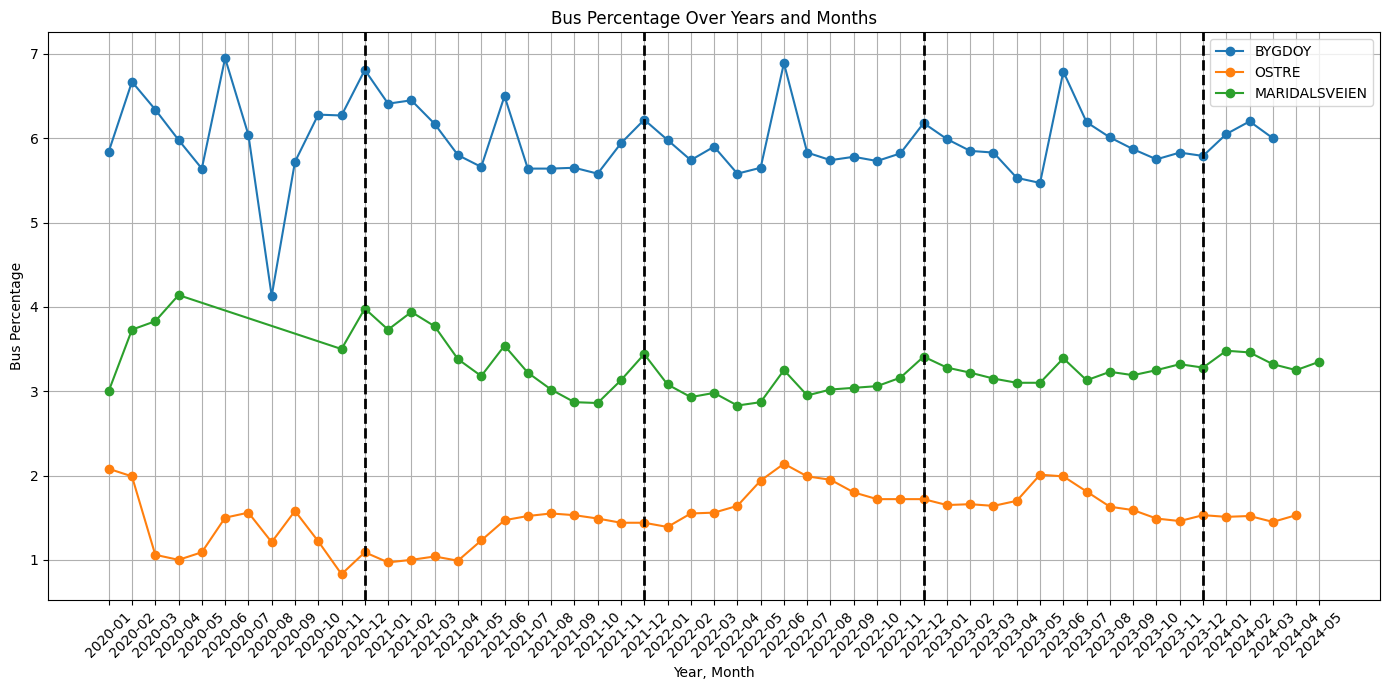

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# The order comprises 71 MAN Lion’s City L LE, 33 MAN Lion’s City LE and 23 MAN Lion’s City GL buses, ranging from 12 to 18.75 metres in length

def process_traffic_data(df, dataset_name):
    # Calculate light and heavy vehicles
    df['bus_num'] = df['12_5m_to_16_0m'] + df['over_16_0m']

    df['others_vehicles'] = df['under_5_6m'] + df['over_5_6m'] + df['5_6m_to_7_6m'] + df['7_6m_to_12_5m'] + df['over_24_0m']+ df['16_0m_to_24_0m']

    # Group by year and month
    grouped = df.groupby(['Year', 'Month'])[['bus_num', 'others_vehicles']].sum()

    # Calculate percentages
    total_vehicles = grouped['bus_num'] + grouped['others_vehicles']
    grouped['bus_percentage'] = (grouped['bus_num'] / total_vehicles * 100).round(2)

    grouped['Year_Month'] = grouped.index.map(lambda x: f'{x[0]}-{x[1]:02d}')

    return grouped

# Assuming traffic_df_BYGDOY, traffic_df_OSTRE, and traffic_df_MARIDALSVEIEN are already defined
results_BYGDOY = process_traffic_data(traffic_df_BYGDOY, "BYGDOY")
results_OSTRE = process_traffic_data(traffic_df_OSTRE, "OSTRE")
results_MARIDALSVEIEN = process_traffic_data(traffic_df_MARIDALSVEIEN, "MARIDALSVEIEN")

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(results_BYGDOY['Year_Month'], results_BYGDOY['bus_percentage'], label='BYGDOY', marker='o')
plt.plot(results_OSTRE['Year_Month'], results_OSTRE['bus_percentage'], label='OSTRE', marker='o')
plt.plot(results_MARIDALSVEIEN['Year_Month'], results_MARIDALSVEIEN['bus_percentage'], label='MARIDALSVEIEN', marker='o')

# Add vertical bold lines at the end of each year
end_of_year_indices = results_BYGDOY.groupby(level='Year').apply(lambda x: x.index[-1]).tolist()
for end_index in end_of_year_indices[:-1]:   # don't print the final vertical line
    plt.axvline(x=results_BYGDOY.loc[end_index, 'Year_Month'], color='black', linestyle='--', linewidth=2)

plt.xlabel('Year, Month')
plt.ylabel('Bus Percentage')
plt.title('Bus Percentage Over Years and Months')
plt.legend()
plt.grid(True)

# Adjust x-axis to display year and month clearly
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## Secondo Indicatore


DataFrame information for Maridalsveien:

Number of common dates: 126
Common dates (first 10):
[Timestamp('2024-02-01 00:00:00'), Timestamp('2024-02-02 00:00:00'), Timestamp('2024-02-03 00:00:00'), Timestamp('2024-02-04 00:00:00'), Timestamp('2024-02-05 00:00:00'), Timestamp('2024-02-06 00:00:00'), Timestamp('2024-02-07 00:00:00'), Timestamp('2024-02-08 00:00:00'), Timestamp('2024-02-09 00:00:00'), Timestamp('2024-02-10 00:00:00')]

Traffic statistics for Maridalsveien:
Average workday traffic: 259.94
Average non-workday traffic: 231.00
Difference: 28.94

Bike sharing statistics for Maridalsveien:
Average workday trip duration: 7.70 minutes
Average non-workday trip duration: 9.14 minutes
Difference: 1.43 minutes

DataFrame information for Ostre:

Number of common dates: 127
Common dates (first 10):
[Timestamp('2024-01-31 00:00:00'), Timestamp('2024-02-01 00:00:00'), Timestamp('2024-02-02 00:00:00'), Timestamp('2024-02-03 00:00:00'), Timestamp('2024-02-04 00:00:00'), Timestamp('2024-02

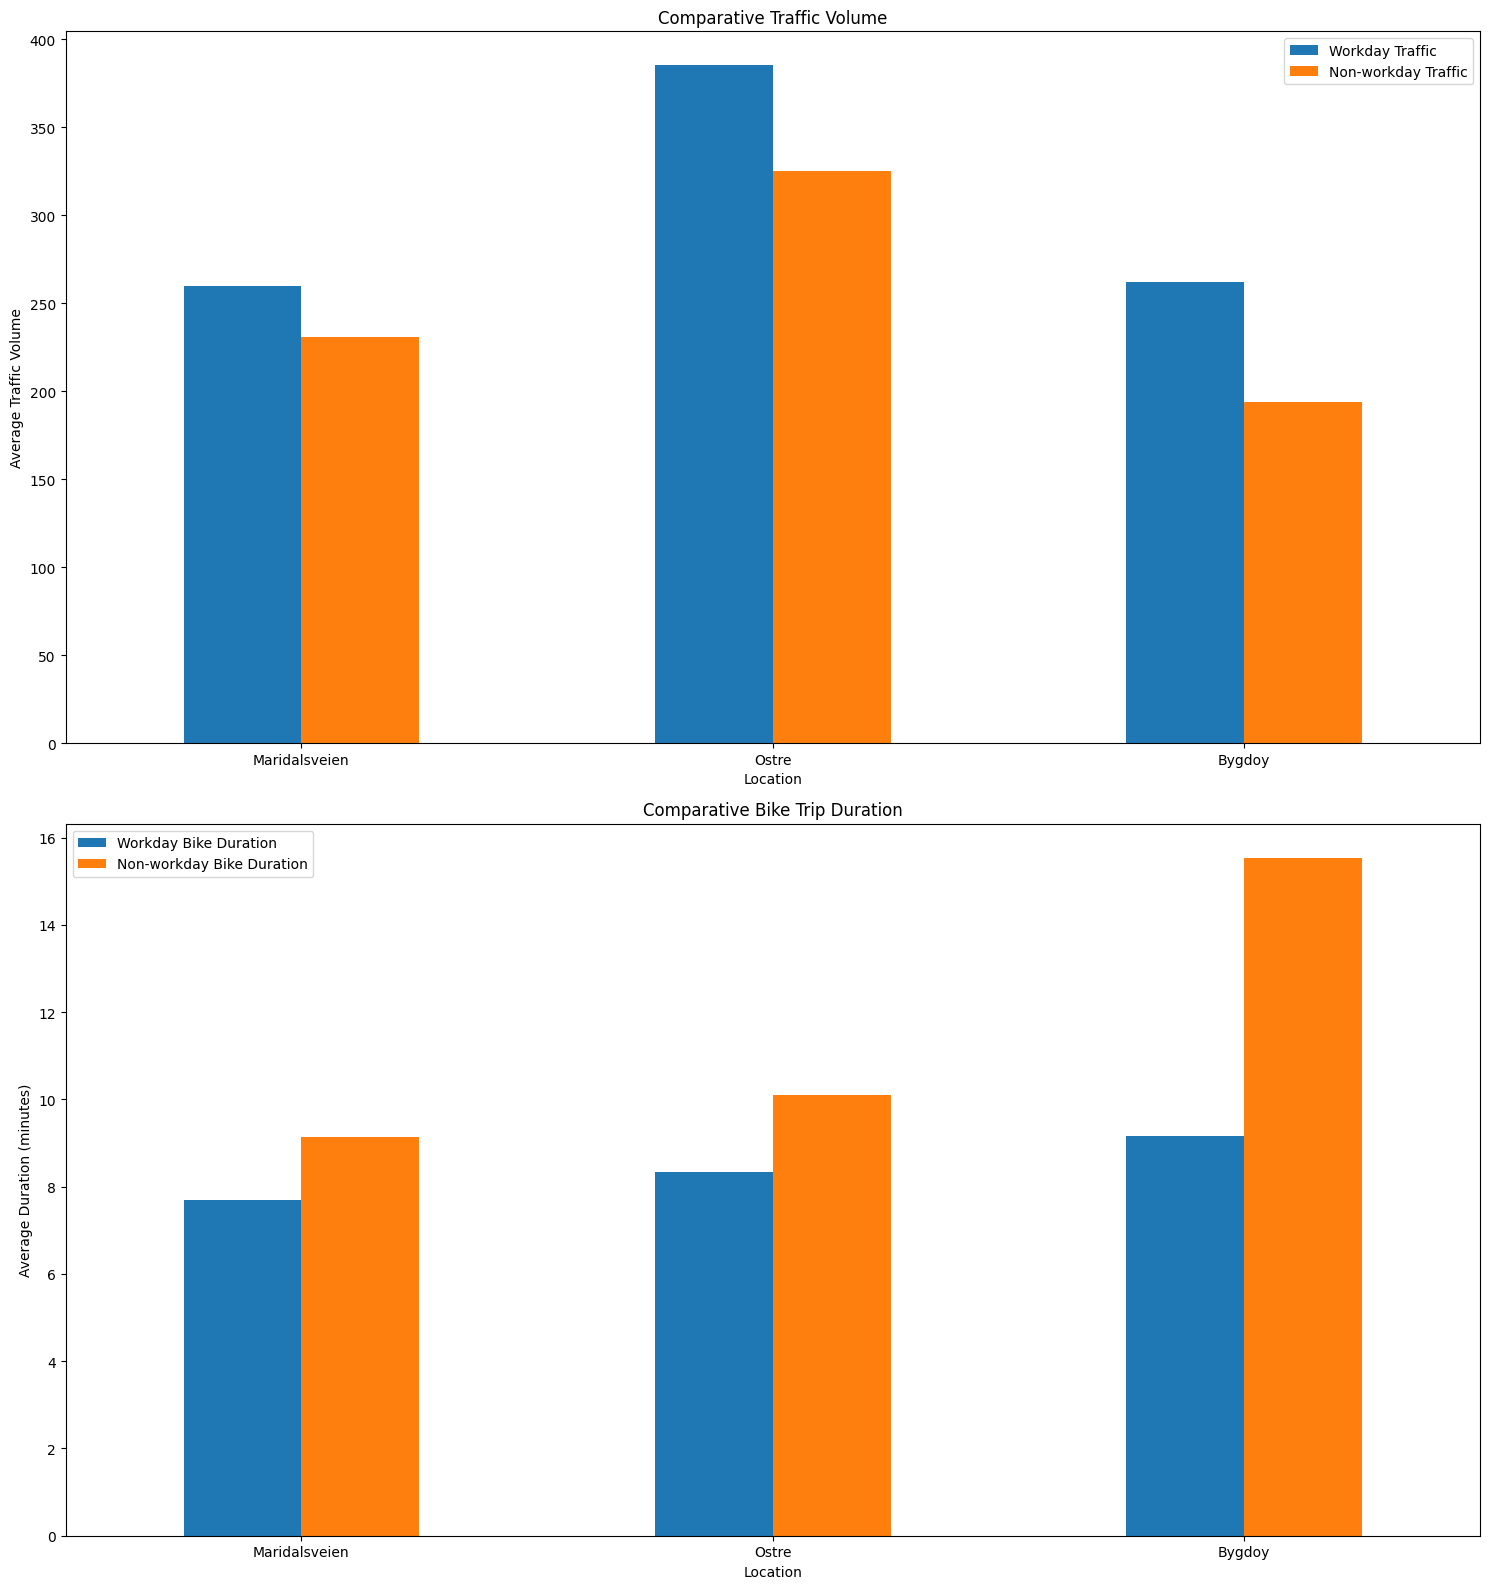

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_traffic_and_bike_graphs(traffic_df, bike_df, location_name):
    print(f"\nDataFrame information for {location_name}:")

    # Create a Year-Month-Day column for both dataframes
    traffic_df['Year-Month-Day'] = pd.to_datetime(traffic_df['Year'].astype(str) + '-' + traffic_df['Month'].astype(str).str.zfill(2) + '-' + traffic_df['Day'].astype(str).str.zfill(2))
    bike_df['Year-Month-Day'] = pd.to_datetime(bike_df['year'].astype(str) + '-' + bike_df['month'].astype(str).str.zfill(2) + '-' + bike_df['day'].astype(str).str.zfill(2))

    # Find common dates
    common_dates = set(traffic_df['Year-Month-Day']) & set(bike_df['Year-Month-Day'])
    print(f"\nNumber of common dates: {len(common_dates)}")
    print("Common dates (first 10):")
    print(sorted(common_dates)[:10])

    # Filter data for common dates
    traffic_df_filtered = traffic_df[traffic_df['Year-Month-Day'].isin(common_dates)]
    bike_df_filtered = bike_df[bike_df['Year-Month-Day'].isin(common_dates)].reset_index(drop=True)

    # Group traffic data
    traffic_workday = traffic_df_filtered[traffic_df_filtered['Is_Weekend'] == 0].groupby('Hour')['Traffic_Volume'].mean()
    traffic_non_workday = traffic_df_filtered[traffic_df_filtered['Is_Weekend'] == 1].groupby('Hour')['Traffic_Volume'].mean()

    # Group bike data
    bike_workday = bike_df_filtered[bike_df_filtered['is_weekend'] == 0].groupby('hour_of_day')['duration_minutes'].mean()
    bike_non_workday = bike_df_filtered[bike_df_filtered['is_weekend'] == 1].groupby('hour_of_day')['duration_minutes'].mean()

    # Calculate and return traffic and bike trip duration statistics
    avg_workday_traffic = traffic_workday.mean()
    avg_non_workday_traffic = traffic_non_workday.mean()
    avg_workday_bike = bike_workday.mean()
    avg_non_workday_bike = bike_non_workday.mean()

    print(f"\nTraffic statistics for {location_name}:")
    print(f"Average workday traffic: {avg_workday_traffic:.2f}")
    print(f"Average non-workday traffic: {avg_non_workday_traffic:.2f}")
    print(f"Difference: {avg_workday_traffic - avg_non_workday_traffic:.2f}")

    print(f"\nBike sharing statistics for {location_name}:")
    print(f"Average workday trip duration: {avg_workday_bike:.2f} minutes")
    print(f"Average non-workday trip duration: {avg_non_workday_bike:.2f} minutes")
    print(f"Difference: {avg_non_workday_bike - avg_workday_bike:.2f} minutes")

    return avg_workday_traffic, avg_non_workday_traffic, avg_workday_bike, avg_non_workday_bike

def create_comparative_barplot(stats, location_names):
    # Extract traffic and bike data
    traffic_data = [stat[0:2] for stat in stats]  # Workday and Non-workday traffic
    bike_data = [stat[2:4] for stat in stats]     # Workday and Non-workday bike duration

    # Create DataFrame for plotting
    df_traffic = pd.DataFrame(traffic_data, columns=['Workday Traffic', 'Non-workday Traffic'], index=location_names)
    df_bike = pd.DataFrame(bike_data, columns=['Workday Bike Duration', 'Non-workday Bike Duration'], index=location_names)

    # Create figure and axes
    fig, axs = plt.subplots(2, 1, figsize=(15, 16))

    # Plot traffic data
    df_traffic.plot(kind='bar', ax=axs[0])
    axs[0].set_title('Comparative Traffic Volume')
    axs[0].set_ylabel('Average Traffic Volume')
    axs[0].set_xlabel('Location')
    axs[0].tick_params(axis='x', rotation=0)

    # Plot bike data
    df_bike.plot(kind='bar', ax=axs[1])
    axs[1].set_title('Comparative Bike Trip Duration')
    axs[1].set_ylabel('Average Duration (minutes)')
    axs[1].set_xlabel('Location')
    axs[1].tick_params(axis='x', rotation=0)

    plt.tight_layout()
    plt.show()

# Call the function for each location
maridalsveien_stats = create_traffic_and_bike_graphs(traffic_df_hour_2024_MARIDALSVEIEN, bike_df_MARIDALSVEIEN, 'Maridalsveien')
ostre_stats = create_traffic_and_bike_graphs(traffic_df_hour_2024_OSTRE, bike_df_OSTRE, 'Ostre')
bygdoy_stats = create_traffic_and_bike_graphs(traffic_df_hour_2024_BYGDOY, bike_df_BYGDOY, 'Bygdoy')

# Prepare data for the barplot
stats = [maridalsveien_stats, ostre_stats, bygdoy_stats]
location_names = ['Maridalsveien', 'Ostre', 'Bygdoy']

# Create the comparative bar plot
create_comparative_barplot(stats, location_names)



DataFrame information for Maridalsveien:

Number of common dates: 126
Common dates (first 10):
[Timestamp('2024-02-01 00:00:00'), Timestamp('2024-02-02 00:00:00'), Timestamp('2024-02-03 00:00:00'), Timestamp('2024-02-04 00:00:00'), Timestamp('2024-02-05 00:00:00'), Timestamp('2024-02-06 00:00:00'), Timestamp('2024-02-07 00:00:00'), Timestamp('2024-02-08 00:00:00'), Timestamp('2024-02-09 00:00:00'), Timestamp('2024-02-10 00:00:00')]

Traffic statistics for Maridalsveien:
Average workday traffic: 259.94
Average non-workday traffic: 231.00
Difference: 28.94

Bike sharing statistics for Maridalsveien:
Average workday trip duration: 7.70 minutes
Average non-workday trip duration: 9.14 minutes
Difference: 1.43 minutes

DataFrame information for Ostre:

Number of common dates: 127
Common dates (first 10):
[Timestamp('2024-01-31 00:00:00'), Timestamp('2024-02-01 00:00:00'), Timestamp('2024-02-02 00:00:00'), Timestamp('2024-02-03 00:00:00'), Timestamp('2024-02-04 00:00:00'), Timestamp('2024-02

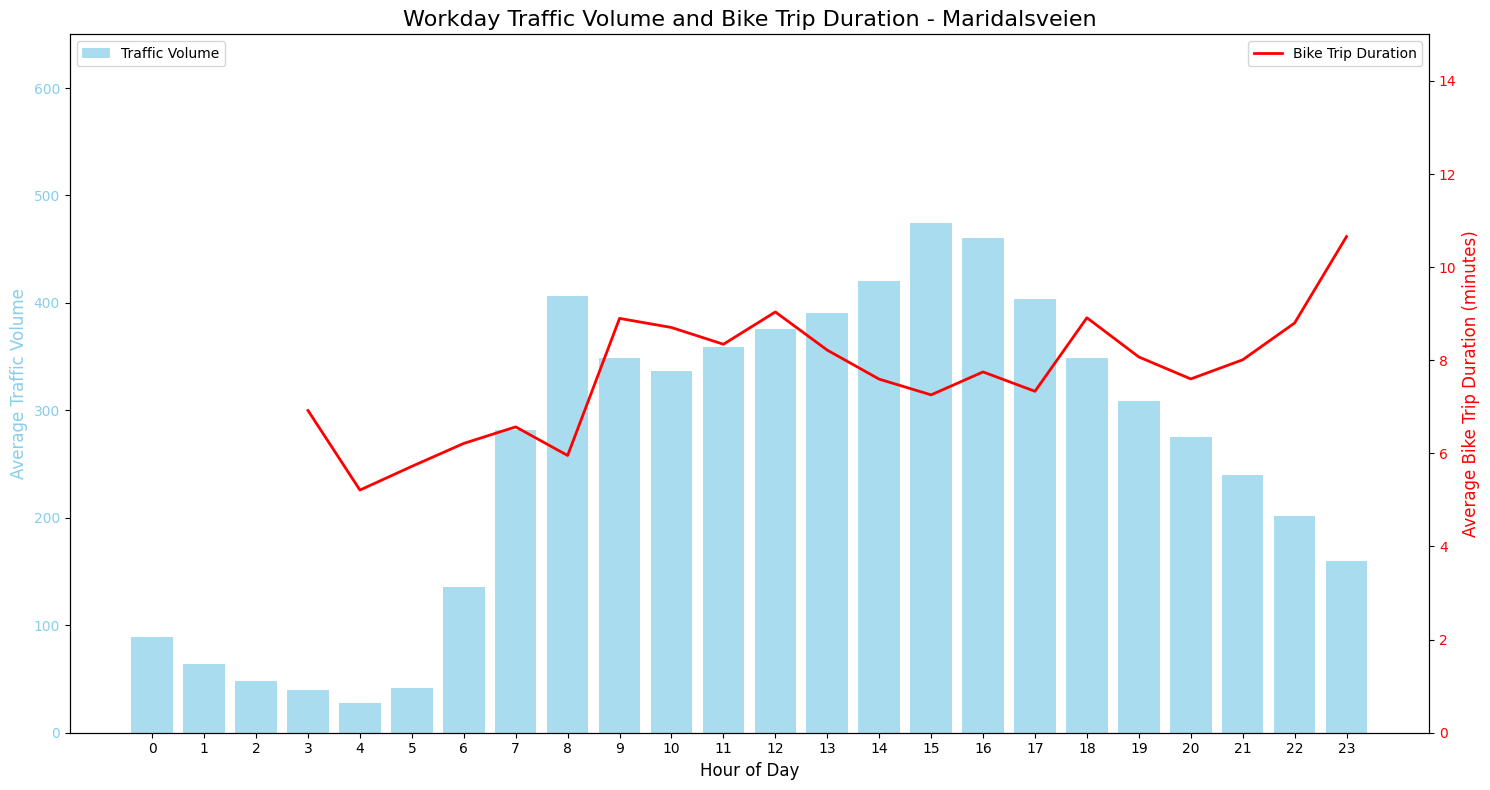

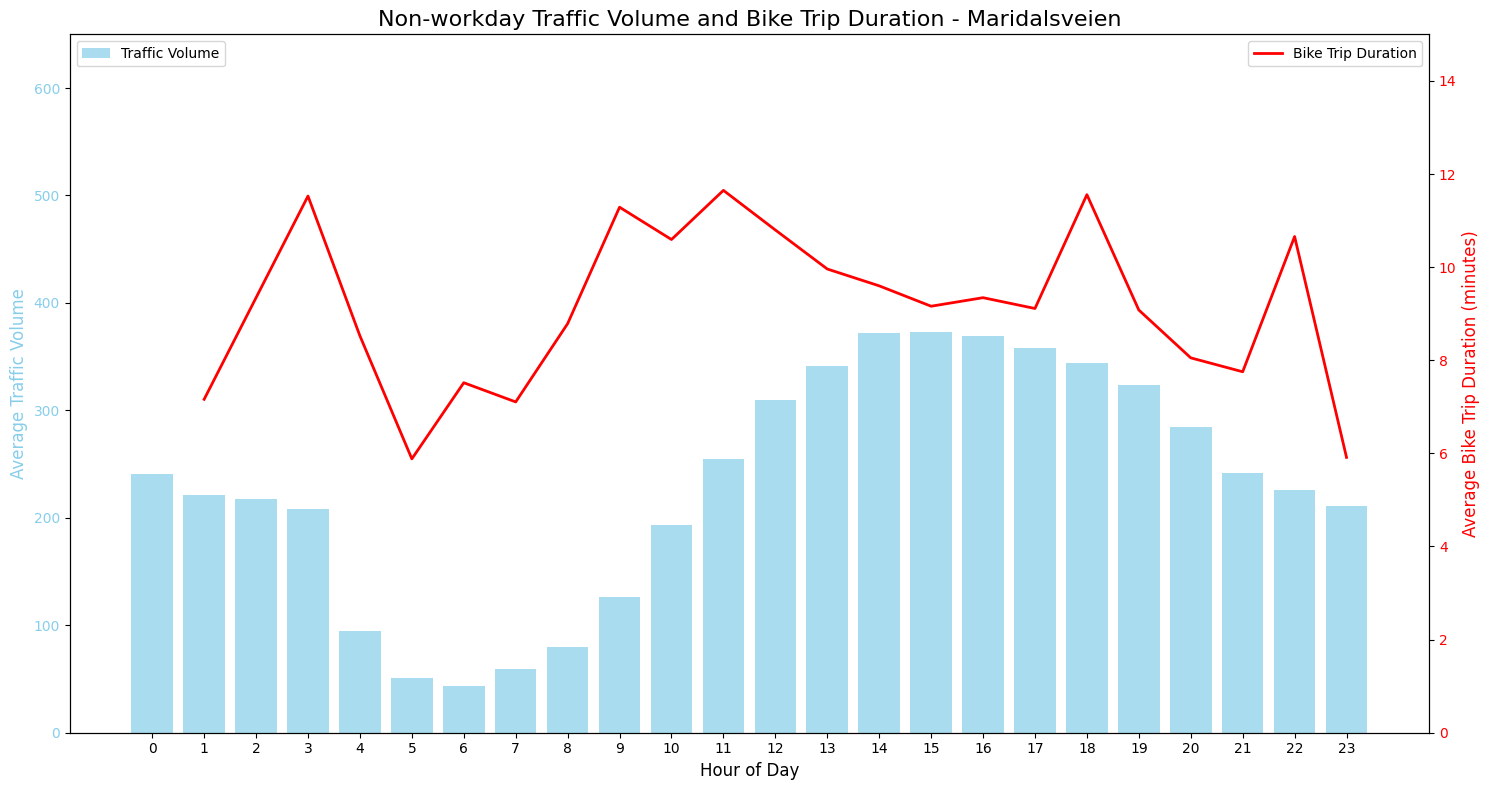

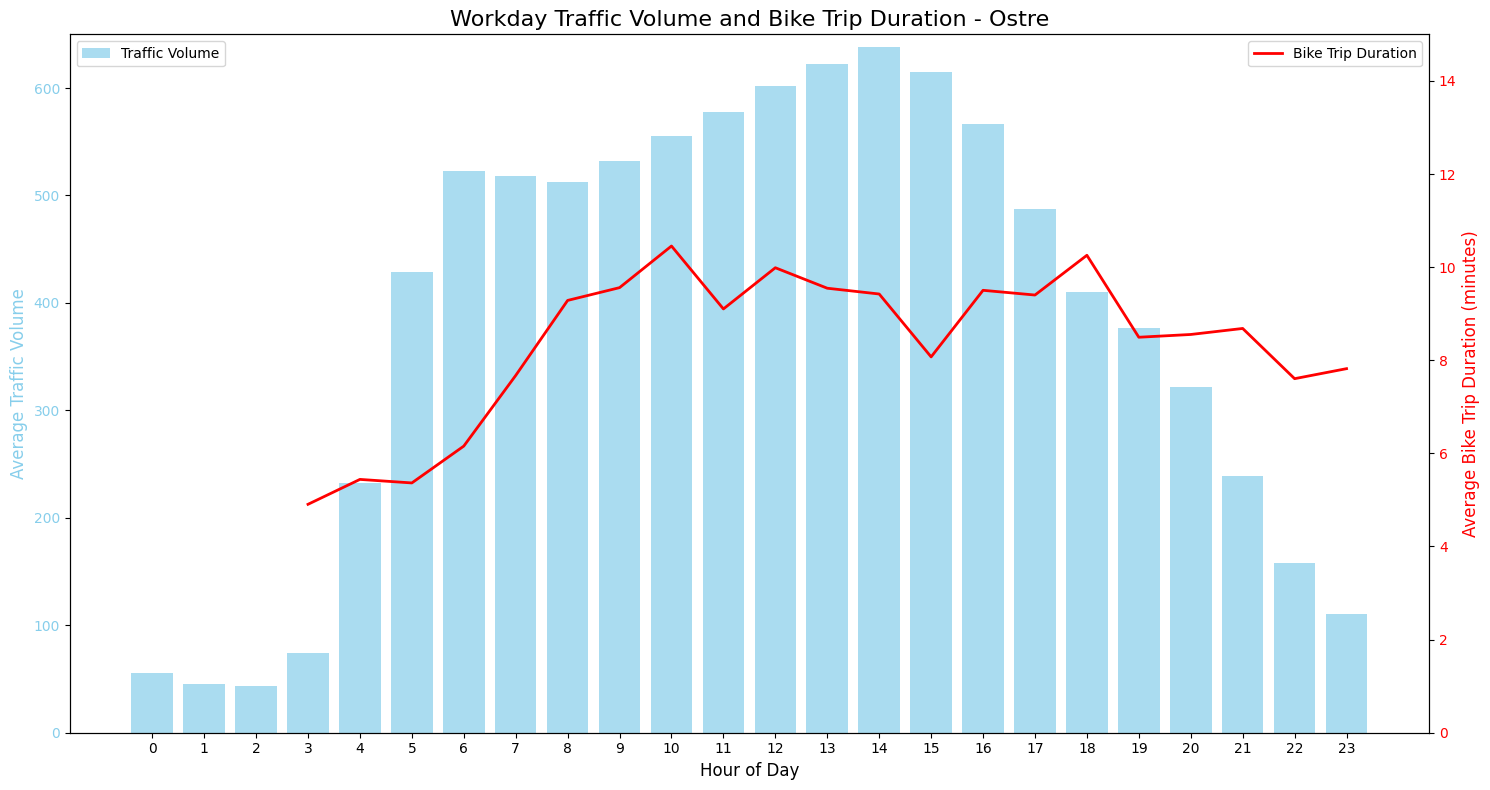

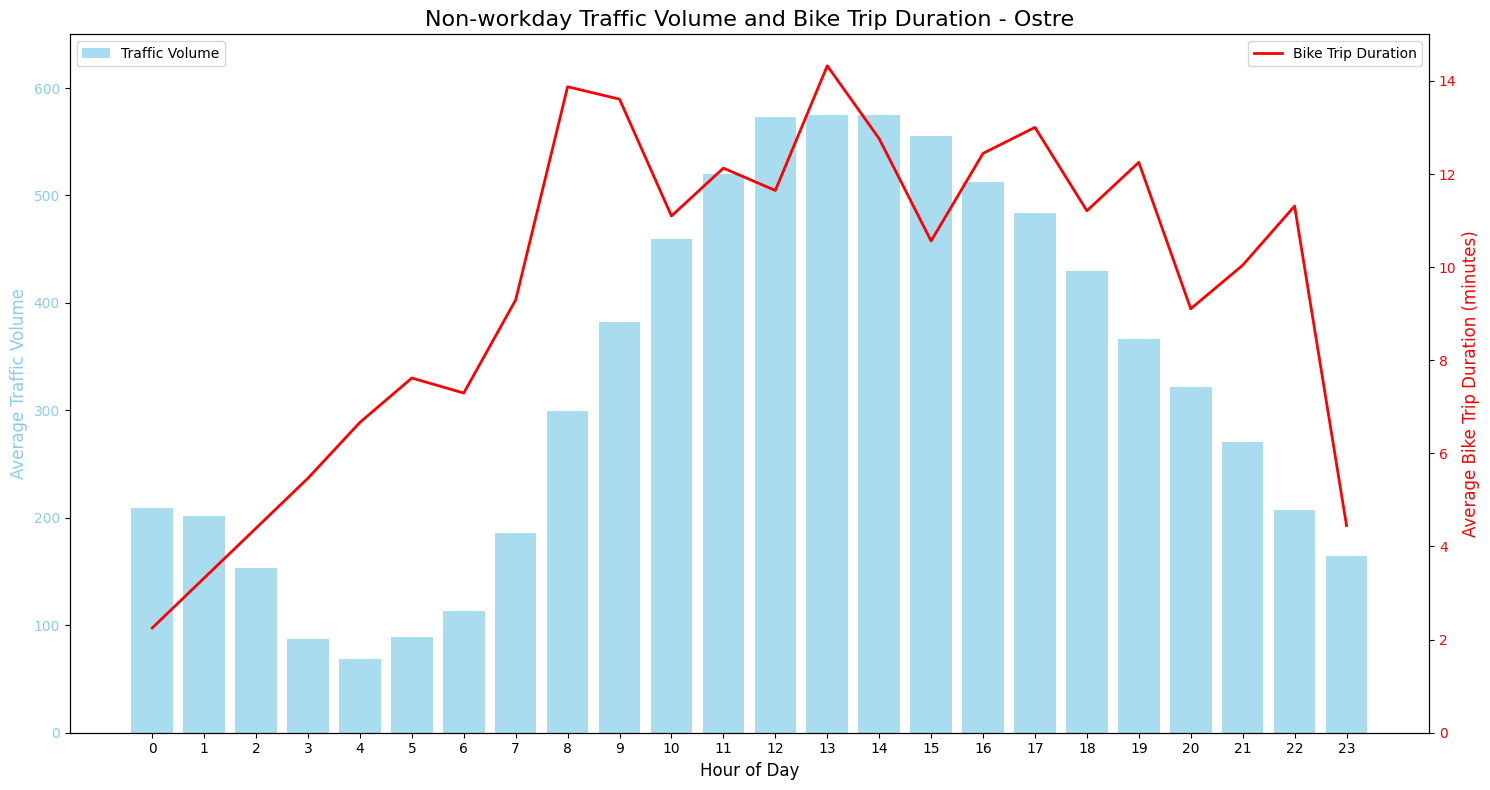

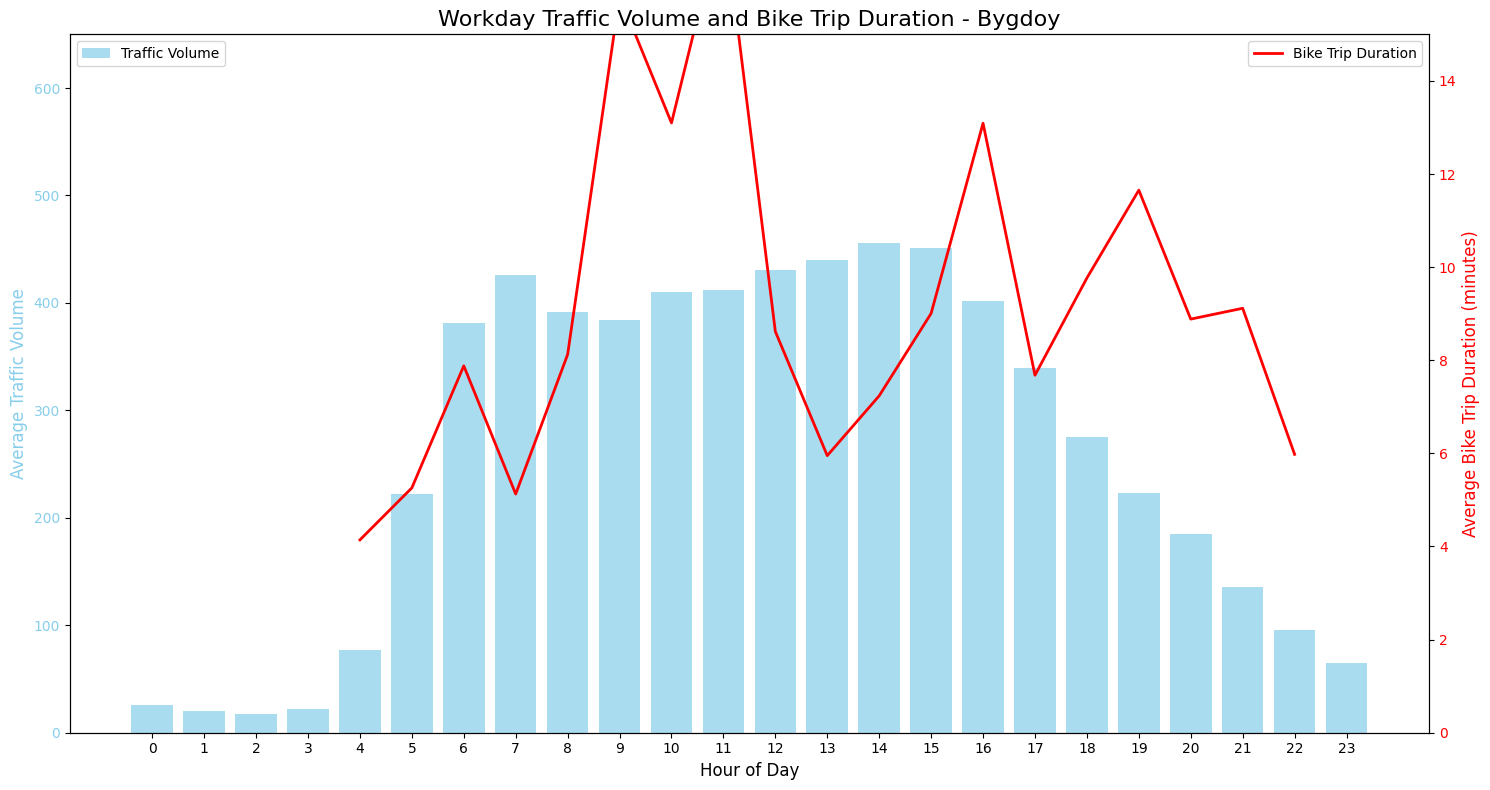

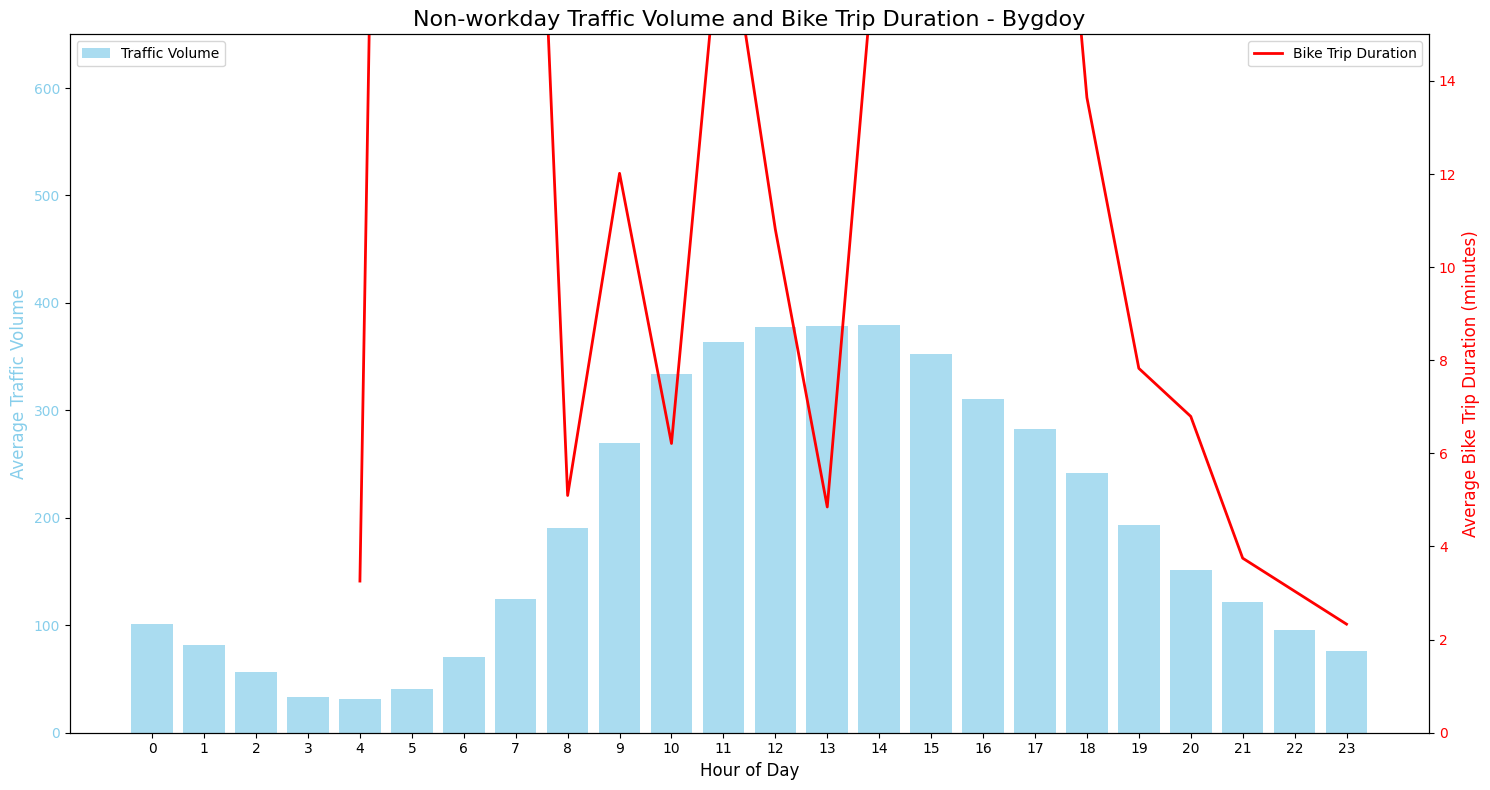

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_traffic_and_bike_graphs(traffic_df, bike_df, location_name):
    print(f"\nDataFrame information for {location_name}:")

    # Create a Year-Month-Day column for both dataframes
    traffic_df['Year-Month-Day'] = pd.to_datetime(traffic_df['Year'].astype(str) + '-' + traffic_df['Month'].astype(str).str.zfill(2) + '-' + traffic_df['Day'].astype(str).str.zfill(2))
    bike_df['Year-Month-Day'] = pd.to_datetime(bike_df['year'].astype(str) + '-' + bike_df['month'].astype(str).str.zfill(2) + '-' + bike_df['day'].astype(str).str.zfill(2))

    # Find common dates
    common_dates = set(traffic_df['Year-Month-Day']) & set(bike_df['Year-Month-Day'])
    print(f"\nNumber of common dates: {len(common_dates)}")
    print("Common dates (first 10):")
    print(sorted(common_dates)[:10])

    # Filter data for common dates
    traffic_df_filtered = traffic_df[traffic_df['Year-Month-Day'].isin(common_dates)]
    bike_df_filtered = bike_df[bike_df['Year-Month-Day'].isin(common_dates)].reset_index(drop=True)

    # Group traffic data
    traffic_workday = traffic_df_filtered[traffic_df_filtered['Is_Weekend'] == 0].groupby('Hour')['Traffic_Volume'].mean()
    traffic_non_workday = traffic_df_filtered[traffic_df_filtered['Is_Weekend'] == 1].groupby('Hour')['Traffic_Volume'].mean()

    # Group bike data
    bike_workday = bike_df_filtered[bike_df_filtered['is_weekend'] == 0].groupby('hour_of_day')['duration_minutes'].mean()
    bike_non_workday = bike_df_filtered[bike_df_filtered['is_weekend'] == 1].groupby('hour_of_day')['duration_minutes'].mean()

    # Create workday graph
    create_graph(traffic_workday, bike_workday, location_name, "Workday")

    # Create non-workday graph
    create_graph(traffic_non_workday, bike_non_workday, location_name, "Non-workday")

    # Calculate and print statistics
    print(f"\nTraffic statistics for {location_name}:")
    print(f"Average workday traffic: {traffic_workday.mean():.2f}")
    print(f"Average non-workday traffic: {traffic_non_workday.mean():.2f}")
    print(f"Difference: {traffic_workday.mean() - traffic_non_workday.mean():.2f}")

    print(f"\nBike sharing statistics for {location_name}:")
    print(f"Average workday trip duration: {bike_workday.mean():.2f} minutes")
    print(f"Average non-workday trip duration: {bike_non_workday.mean():.2f} minutes")
    print(f"Difference: {bike_non_workday.mean() - bike_workday.mean():.2f} minutes")

def create_graph(traffic_data, bike_data, location_name, day_type):
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Traffic volume bars
    ax1.bar(traffic_data.index, traffic_data.values, color='skyblue', alpha=0.7, label='Traffic Volume')
    ax1.set_xlabel('Hour of Day', fontsize=12)
    ax1.set_ylabel('Average Traffic Volume', fontsize=12, color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    ax1.set_xticks(range(0, 24))
    ax1.set_ylim(0, 650)  # Set the y-axis limit for traffic volume
    ax1.legend(loc='upper left')

    # Bike trip duration line
    ax2 = ax1.twinx()
    ax2.plot(bike_data.index, bike_data.values, color='red', linewidth=2, label='Bike Trip Duration')
    ax2.set_ylabel('Average Bike Trip Duration (minutes)', fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 15)  # Set the y-axis limit for bike trip duration
    ax2.legend(loc='upper right')

    plt.title(f'{day_type} Traffic Volume and Bike Trip Duration - {location_name}', fontsize=16)
    plt.tight_layout()
    #plt.savefig(f'{location_name}_{day_type.lower()}_traffic_and_bike.png', dpi=300, bbox_inches='tight')

    #plt.close()



# Call the function for each location
create_traffic_and_bike_graphs(traffic_df_hour_2024_MARIDALSVEIEN, bike_df_MARIDALSVEIEN, 'Maridalsveien')
create_traffic_and_bike_graphs(traffic_df_hour_2024_OSTRE, bike_df_OSTRE, 'Ostre')
create_traffic_and_bike_graphs(traffic_df_hour_2024_BYGDOY, bike_df_BYGDOY, 'Bygdoy')


DataFrame information for Maridalsveien:

Number of common dates: 126
Common dates (first 10):
[Timestamp('2024-02-01 00:00:00'), Timestamp('2024-02-02 00:00:00'), Timestamp('2024-02-03 00:00:00'), Timestamp('2024-02-04 00:00:00'), Timestamp('2024-02-05 00:00:00'), Timestamp('2024-02-06 00:00:00'), Timestamp('2024-02-07 00:00:00'), Timestamp('2024-02-08 00:00:00'), Timestamp('2024-02-09 00:00:00'), Timestamp('2024-02-10 00:00:00')]

Traffic statistics for Maridalsveien:
Average workday traffic: 259.94
Average non-workday traffic: 231.00
Difference: 28.94

Bike sharing statistics for Maridalsveien:
Average workday trip duration: 7.70 minutes
Average non-workday trip duration: 9.14 minutes
Difference: 1.43 minutes

DataFrame information for Ostre:

Number of common dates: 127
Common dates (first 10):
[Timestamp('2024-01-31 00:00:00'), Timestamp('2024-02-01 00:00:00'), Timestamp('2024-02-02 00:00:00'), Timestamp('2024-02-03 00:00:00'), Timestamp('2024-02-04 00:00:00'), Timestamp('2024-02

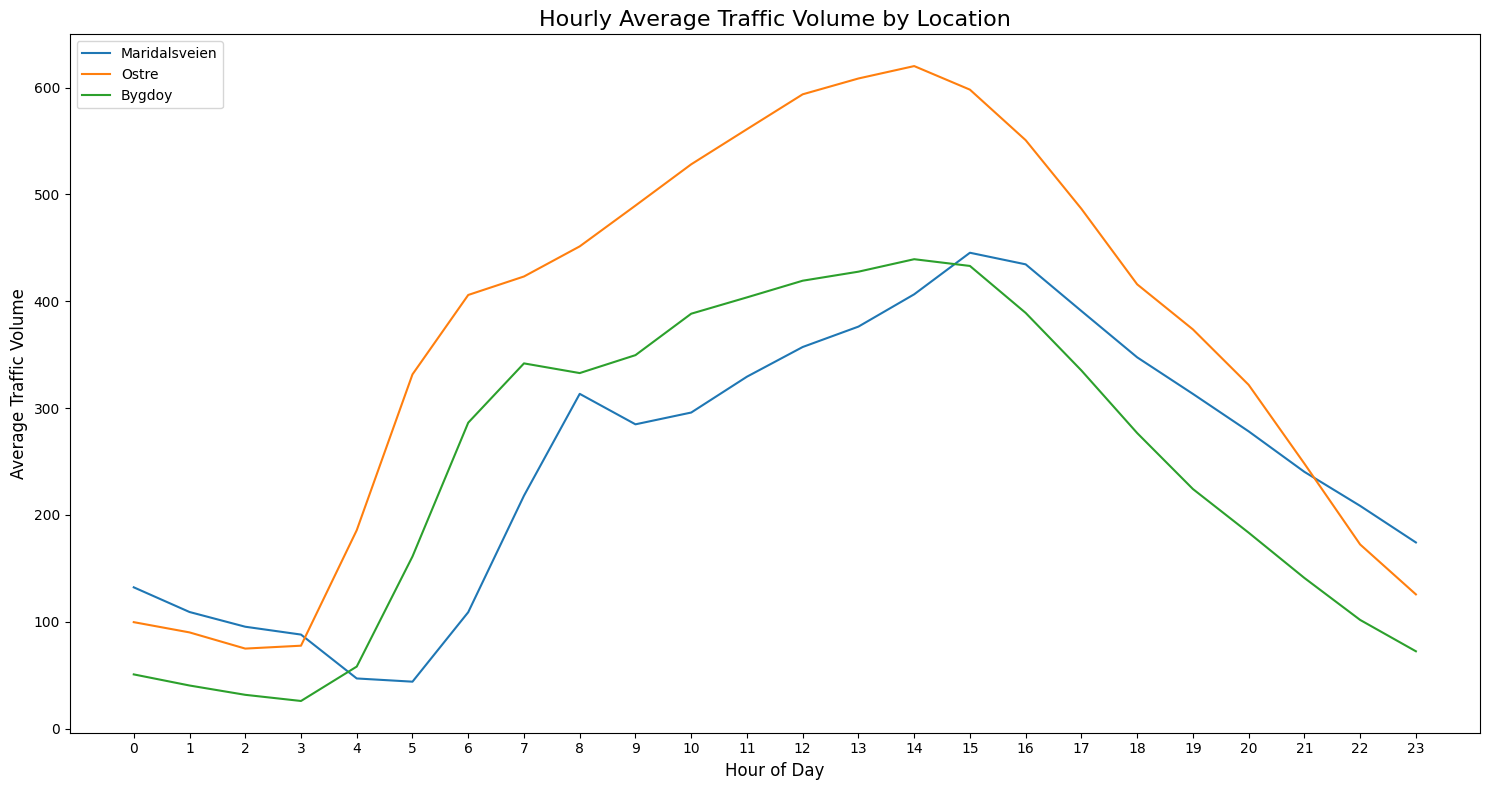

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_traffic_and_bike_graphs(traffic_df, bike_df, location_name):
    print(f"\nDataFrame information for {location_name}:")

    # Create a Year-Month-Day column for both dataframes
    traffic_df['Year-Month-Day'] = pd.to_datetime(traffic_df['Year'].astype(str) + '-' + traffic_df['Month'].astype(str).str.zfill(2) + '-' + traffic_df['Day'].astype(str).str.zfill(2))
    bike_df['Year-Month-Day'] = pd.to_datetime(bike_df['year'].astype(str) + '-' + bike_df['month'].astype(str).str.zfill(2) + '-' + bike_df['day'].astype(str).str.zfill(2))

    # Find common dates
    common_dates = set(traffic_df['Year-Month-Day']) & set(bike_df['Year-Month-Day'])
    print(f"\nNumber of common dates: {len(common_dates)}")
    print("Common dates (first 10):")
    print(sorted(common_dates)[:10])

    # Filter data for common dates
    traffic_df_filtered = traffic_df[traffic_df['Year-Month-Day'].isin(common_dates)]
    bike_df_filtered = bike_df[bike_df['Year-Month-Day'].isin(common_dates)].reset_index(drop=True)

    # Group traffic data
    traffic_workday = traffic_df_filtered[traffic_df_filtered['Is_Weekend'] == 0].groupby('Hour')['Traffic_Volume'].mean()
    traffic_non_workday = traffic_df_filtered[traffic_df_filtered['Is_Weekend'] == 1].groupby('Hour')['Traffic_Volume'].mean()

    # Group bike data
    bike_workday = bike_df_filtered[bike_df_filtered['is_weekend'] == 0].groupby('hour_of_day')['duration_minutes'].mean()
    bike_non_workday = bike_df_filtered[bike_df_filtered['is_weekend'] == 1].groupby('hour_of_day')['duration_minutes'].mean()

    # Create workday graph
    create_graph(traffic_workday, bike_workday, location_name, "Workday")

    # Create non-workday graph
    create_graph(traffic_non_workday, bike_non_workday, location_name, "Non-workday")

    # Calculate and print statistics
    print(f"\nTraffic statistics for {location_name}:")
    print(f"Average workday traffic: {traffic_workday.mean():.2f}")
    print(f"Average non-workday traffic: {traffic_non_workday.mean():.2f}")
    print(f"Difference: {traffic_workday.mean() - traffic_non_workday.mean():.2f}")

    print(f"\nBike sharing statistics for {location_name}:")
    print(f"Average workday trip duration: {bike_workday.mean():.2f} minutes")
    print(f"Average non-workday trip duration: {bike_non_workday.mean():.2f} minutes")
    print(f"Difference: {bike_non_workday.mean() - bike_workday.mean():.2f} minutes")

def create_graph(traffic_data, bike_data, location_name, day_type):
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Traffic volume bars
    ax1.bar(traffic_data.index, traffic_data.values, color='skyblue', alpha=0.7, label='Traffic Volume')
    ax1.set_xlabel('Hour of Day', fontsize=12)
    ax1.set_ylabel('Average Traffic Volume', fontsize=12, color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    ax1.set_xticks(range(0, 24))
    ax1.set_ylim(0, 650)  # Set the y-axis limit for traffic volume
    ax1.legend(loc='upper left')

    # Bike trip duration line
    ax2 = ax1.twinx()
    ax2.plot(bike_data.index, bike_data.values, color='red', linewidth=2, label='Bike Trip Duration')
    ax2.set_ylabel('Average Bike Trip Duration (minutes)', fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 15)  # Set the y-axis limit for bike trip duration
    ax2.legend(loc='upper right')

    plt.title(f'{day_type} Traffic Volume and Bike Trip Duration - {location_name}', fontsize=16)
    plt.tight_layout()
    plt.savefig(f'{location_name}_{day_type.lower()}_traffic_and_bike.png', dpi=300, bbox_inches='tight')
    plt.close()

def plot_hourly_average_traffic(traffic_dfs, location_names):
    plt.figure(figsize=(15, 8))
    for traffic_df, location_name in zip(traffic_dfs, location_names):
        traffic_df['Year-Month-Day'] = pd.to_datetime(traffic_df['Year'].astype(str) + '-' + traffic_df['Month'].astype(str).str.zfill(2) + '-' + traffic_df['Day'].astype(str).str.zfill(2))
        traffic_filtered = traffic_df.groupby('Hour')['Traffic_Volume'].mean()
        plt.plot(traffic_filtered.index, traffic_filtered.values, label=location_name)

    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Average Traffic Volume', fontsize=12)
    plt.title('Hourly Average Traffic Volume by Location', fontsize=16)
    plt.legend(loc='upper left')
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.savefig('hourly_average_traffic_volume.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function for each location
create_traffic_and_bike_graphs(traffic_df_hour_2024_MARIDALSVEIEN, bike_df_MARIDALSVEIEN, 'Maridalsveien')
create_traffic_and_bike_graphs(traffic_df_hour_2024_OSTRE, bike_df_OSTRE, 'Ostre')
create_traffic_and_bike_graphs(traffic_df_hour_2024_BYGDOY, bike_df_BYGDOY, 'Bygdoy')

# Plot hourly average traffic volume for all three locations
plot_hourly_average_traffic([traffic_df_hour_2024_MARIDALSVEIEN, traffic_df_hour_2024_OSTRE, traffic_df_hour_2024_BYGDOY], ['Maridalsveien', 'Ostre', 'Bygdoy'])


## Terzo Indicatore

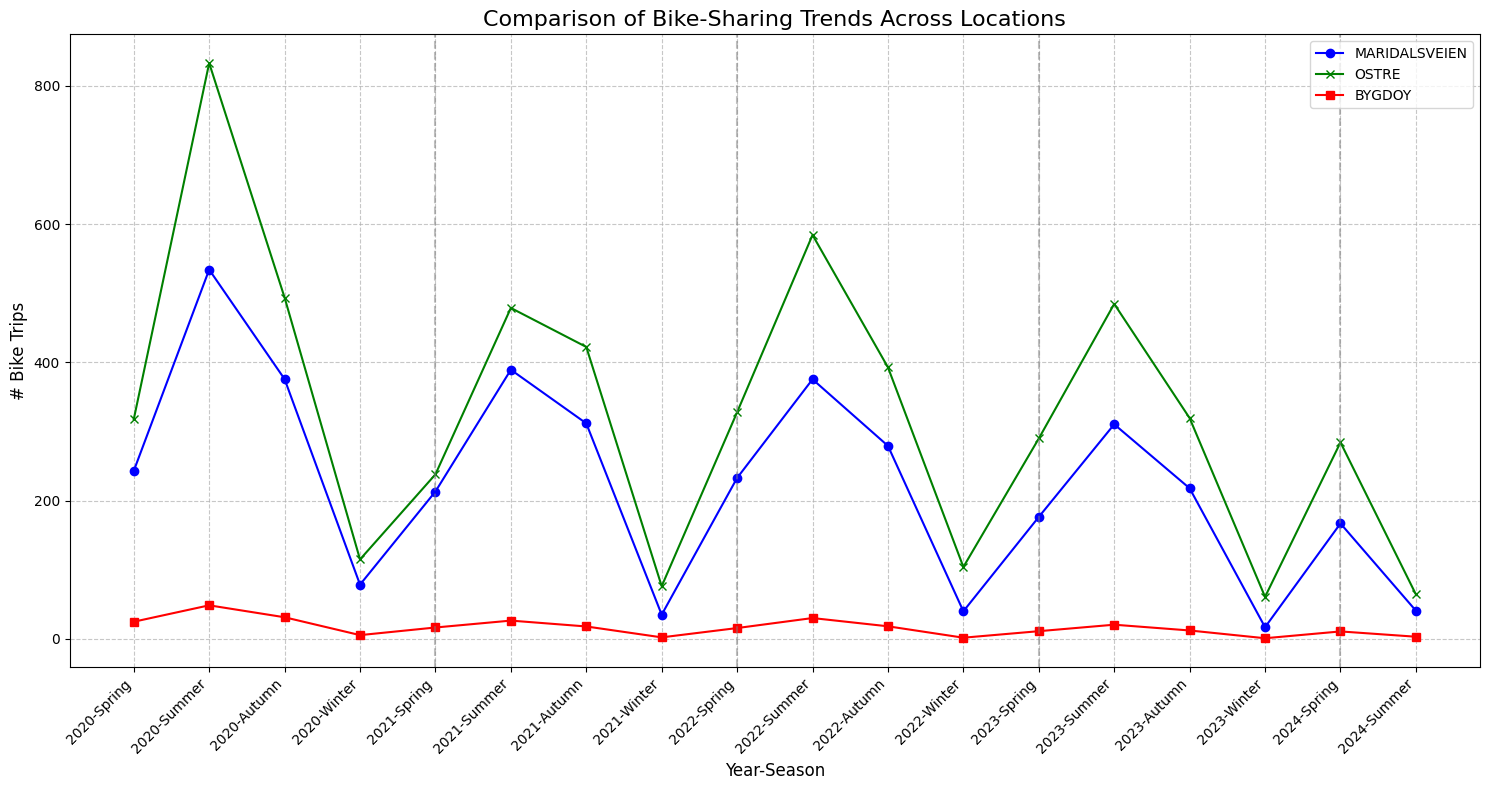

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_bike_sharing_comparison(data_dict):
    plt.figure(figsize=(15, 8))

    colors = {'MARIDALSVEIEN': 'blue', 'OSTRE': 'green', 'BYGDOY': 'red'}
    markers = {'MARIDALSVEIEN': 'o', 'OSTRE': 'x', 'BYGDOY': 's'}

    for location, data in data_dict.items():
        plt.plot(data['year_season'], data['bike_trips'],
                 label=location,
                 color=colors[location],
                 marker=markers[location])

    plt.title('Comparison of Bike-Sharing Trends Across Locations', fontsize=16)
    plt.xlabel('Year-Season', fontsize=12)
    plt.ylabel('# Bike Trips', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.legend(loc='upper right')

    # Ruota le etichette sull'asse x
    plt.xticks(rotation=45, ha='right')

    # Aggiungi linee verticali per separare gli anni
    years = sorted(set([ys.split('-')[0] for ys in data['year_season']]))
    for year in years[1:]:
        plt.axvline(x=f"{year}-Spring", color='gray', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# Esempio di utilizzo:
# Assumendo che hai già i dataframe preparati per ogni località

data_dict = {
    'MARIDALSVEIEN': prepare_data(traffic_df_MARIDALSVEIEN, bike_df_MARIDALSVEIEN),
    'OSTRE': prepare_data(traffic_df_OSTRE, bike_df_OSTRE),
    'BYGDOY': prepare_data(traffic_df_BYGDOY, bike_df_BYGDOY)
}

plot_bike_sharing_comparison(data_dict)

<ipython-input-3-752f84cba9fb>:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['year_season'], rotation=90, ha='center', fontsize=10)


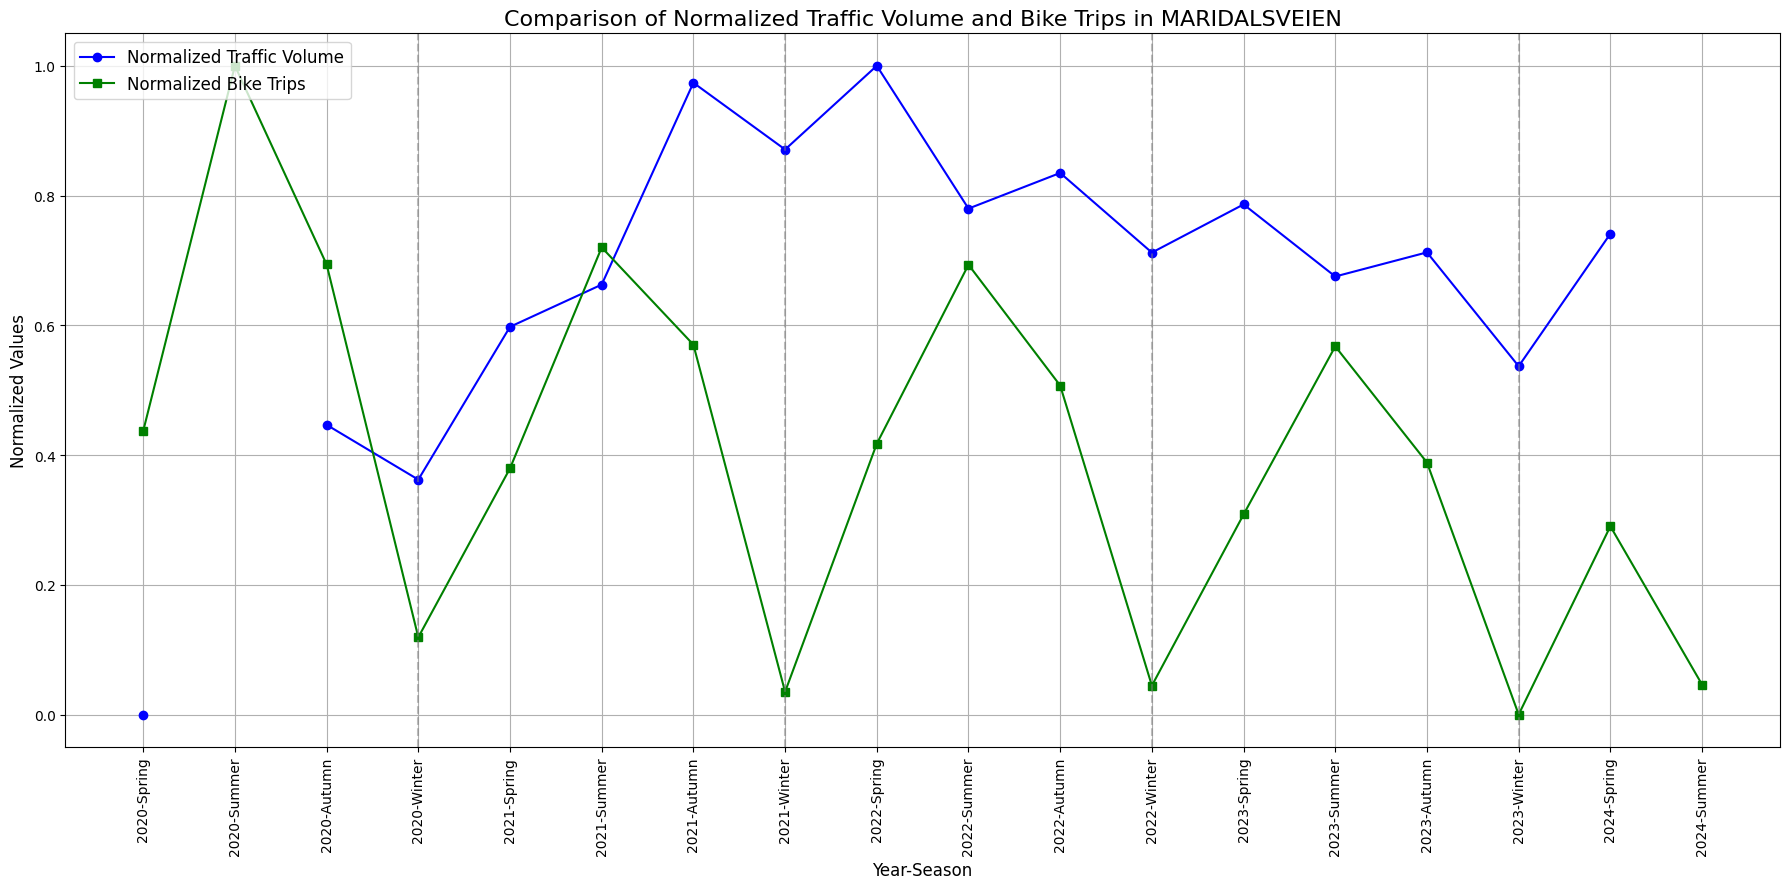

<ipython-input-3-752f84cba9fb>:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['year_season'], rotation=90, ha='center', fontsize=10)


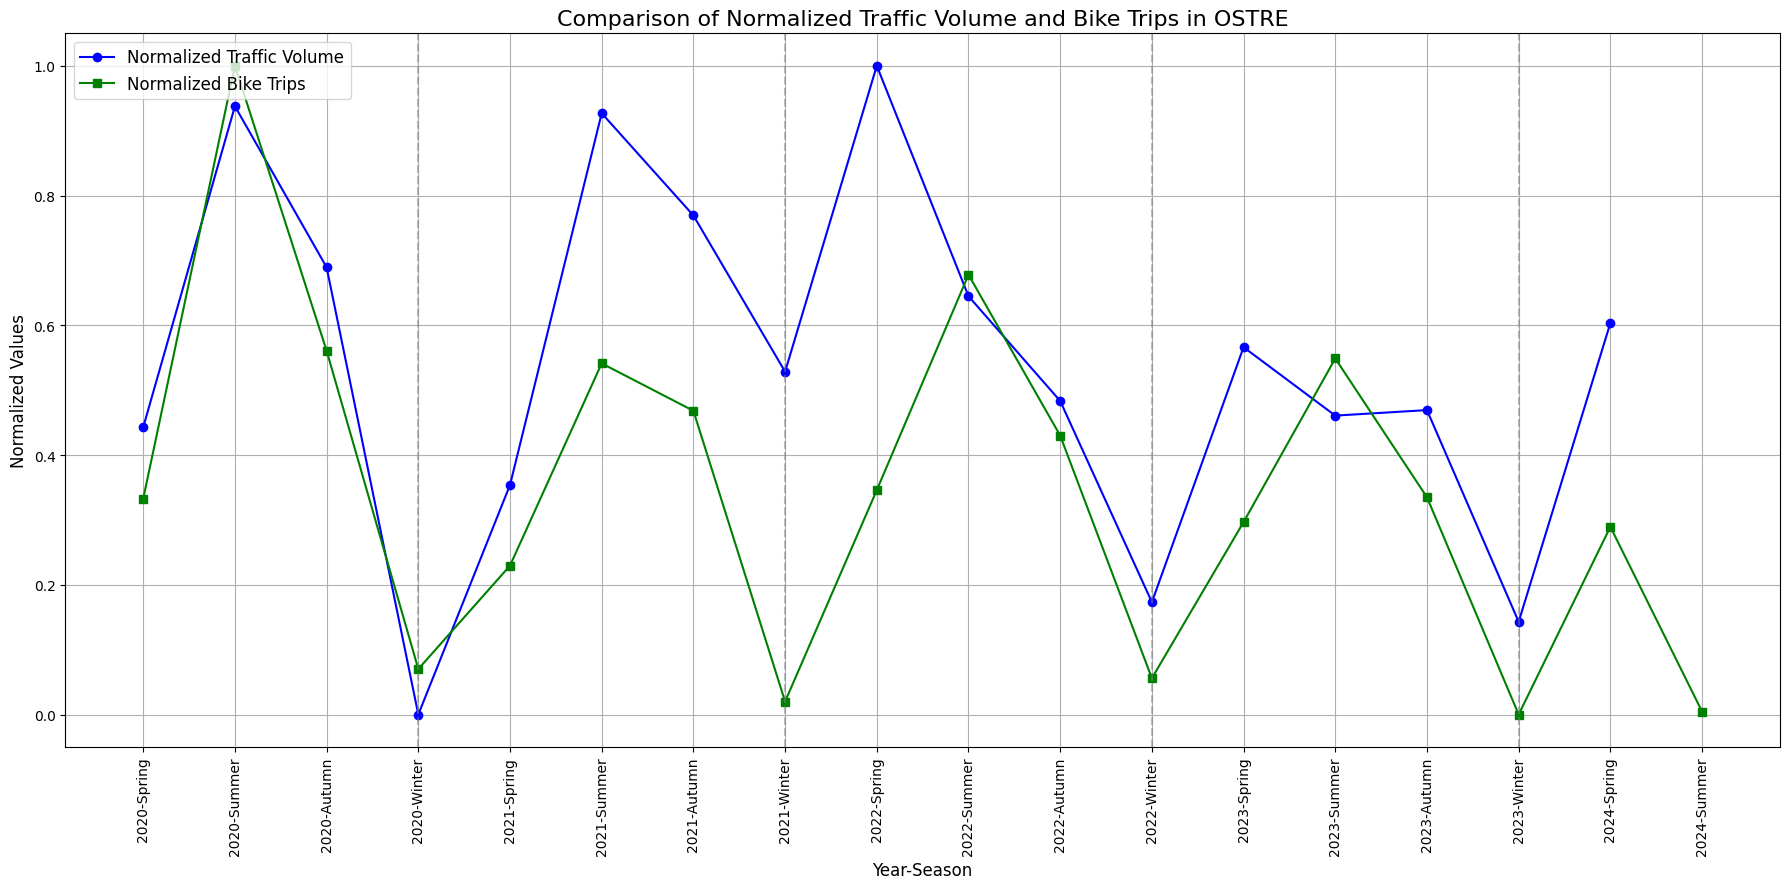

<ipython-input-3-752f84cba9fb>:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['year_season'], rotation=90, ha='center', fontsize=10)


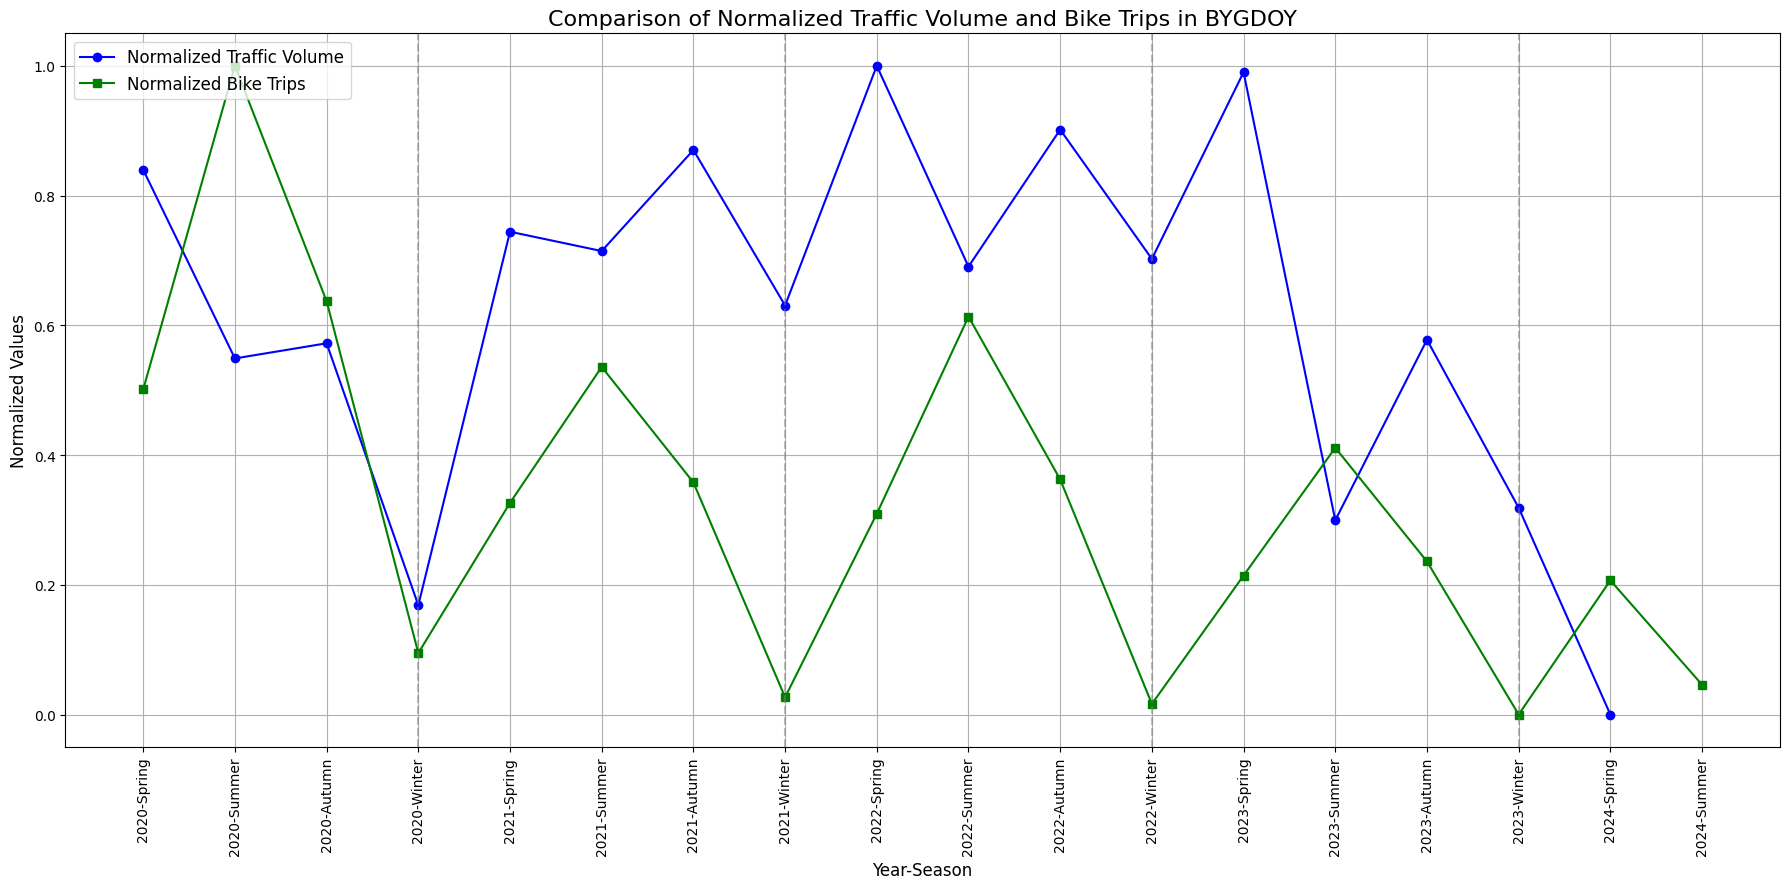

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def prepare_data(traffic_df, bike_df):
    # Converti le colonne delle date in datetime
    traffic_df['date'] = pd.to_datetime(traffic_df['date'])
    bike_df['started_at'] = pd.to_datetime(bike_df['started_at'])

    # Funzione per determinare la stagione
    def get_season(date):
        month = date.month
        year = date.year
        if month in [12, 1, 2]:
            return f"{year}-Winter" if month == 12 else f"{year-1}-Winter"
        elif month in [3, 4, 5]:
            return f"{year}-Spring"
        elif month in [6, 7, 8]:
            return f"{year}-Summer"
        else:
            return f"{year}-Autumn"

    # Aggiungi colonna per year-season
    traffic_df['year_season'] = traffic_df['date'].apply(get_season)
    bike_df['year_season'] = bike_df['started_at'].apply(get_season)

    # Calcola la media giornaliera per il traffico
    traffic_data = traffic_df.groupby('year_season')['Traffic_volume'].mean().reset_index()

    # Conta i viaggi in bicicletta per ogni year-season
    bike_data = bike_df.groupby('year_season').size().reset_index(name='bike_trips')
    bike_data['bike_trips'] = bike_data['bike_trips'] / 90  # Media giornaliera (assumendo 90 giorni per stagione)

    # Unisci i dati
    combined_data = pd.merge(traffic_data, bike_data, on='year_season', how='outer')

    # Normalizzazione dei dati
    combined_data['Traffic_volume_normalized'] = (combined_data['Traffic_volume'] - combined_data['Traffic_volume'].min()) / (combined_data['Traffic_volume'].max() - combined_data['Traffic_volume'].min())
    combined_data['bike_trips_normalized'] = (combined_data['bike_trips'] - combined_data['bike_trips'].min()) / (combined_data['bike_trips'].max() - combined_data['bike_trips'].min())

    # Ordina i dati per anno e stagione
    combined_data['year'] = combined_data['year_season'].str[:4].astype(int)
    combined_data['season'] = combined_data['year_season'].str[5:]
    season_order = {'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3}
    combined_data['season_order'] = combined_data['season'].map(season_order)

    # Escludi l'inverno 2019
    combined_data = combined_data[combined_data['year_season'] != '2019-Winter']

    # Ordina i dati
    combined_data = combined_data.sort_values(['year', 'season_order'])

    # Rimuovi le colonne ausiliarie usate per l'ordinamento
    combined_data = combined_data.drop(['year', 'season', 'season_order'], axis=1)

    return combined_data

def plot_normalized_trends(data, location_name):
    fig, ax = plt.subplots(figsize=(18, 10))

    ax.plot(data['year_season'], data['Traffic_volume_normalized'], color='blue', marker='o', label='Normalized Traffic Volume')
    ax.plot(data['year_season'], data['bike_trips_normalized'], color='green', marker='s', label='Normalized Bike Trips')

    ax.set_xlabel('Year-Season', fontsize=12)
    ax.set_ylabel('Normalized Values', fontsize=12)

    ax.tick_params(axis='y', labelsize=10)

    plt.title(f'Comparison of Normalized Traffic Volume and Bike Trips in {location_name}', fontsize=16)

    ax.legend(loc='upper left', fontsize=12)

    # Imposta le etichette dell'asse x verticalmente
    ax.set_xticklabels(data['year_season'], rotation=90, ha='center', fontsize=10)

    ax.grid(True)

    # Aggiungi linee verticali tratteggiate ogni 4 stagioni (1 anno)
    for i in range(3, len(data), 4):
        ax.axvline(x=i, color='gray', linestyle='--', alpha=0.5)

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

# Prepara i dati e crea i grafici normalizzati per ogni località
locations = ['MARIDALSVEIEN', 'OSTRE', 'BYGDOY']

for location in locations:
    traffic_df = globals()[f'traffic_df_{location}']
    bike_df = globals()[f'bike_df_{location}']

    combined_data = prepare_data(traffic_df, bike_df)
    plot_normalized_trends(combined_data, location)

<ipython-input-6-a02634f56856>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data['year_season'], rotation=90, ha='center', fontsize=10)


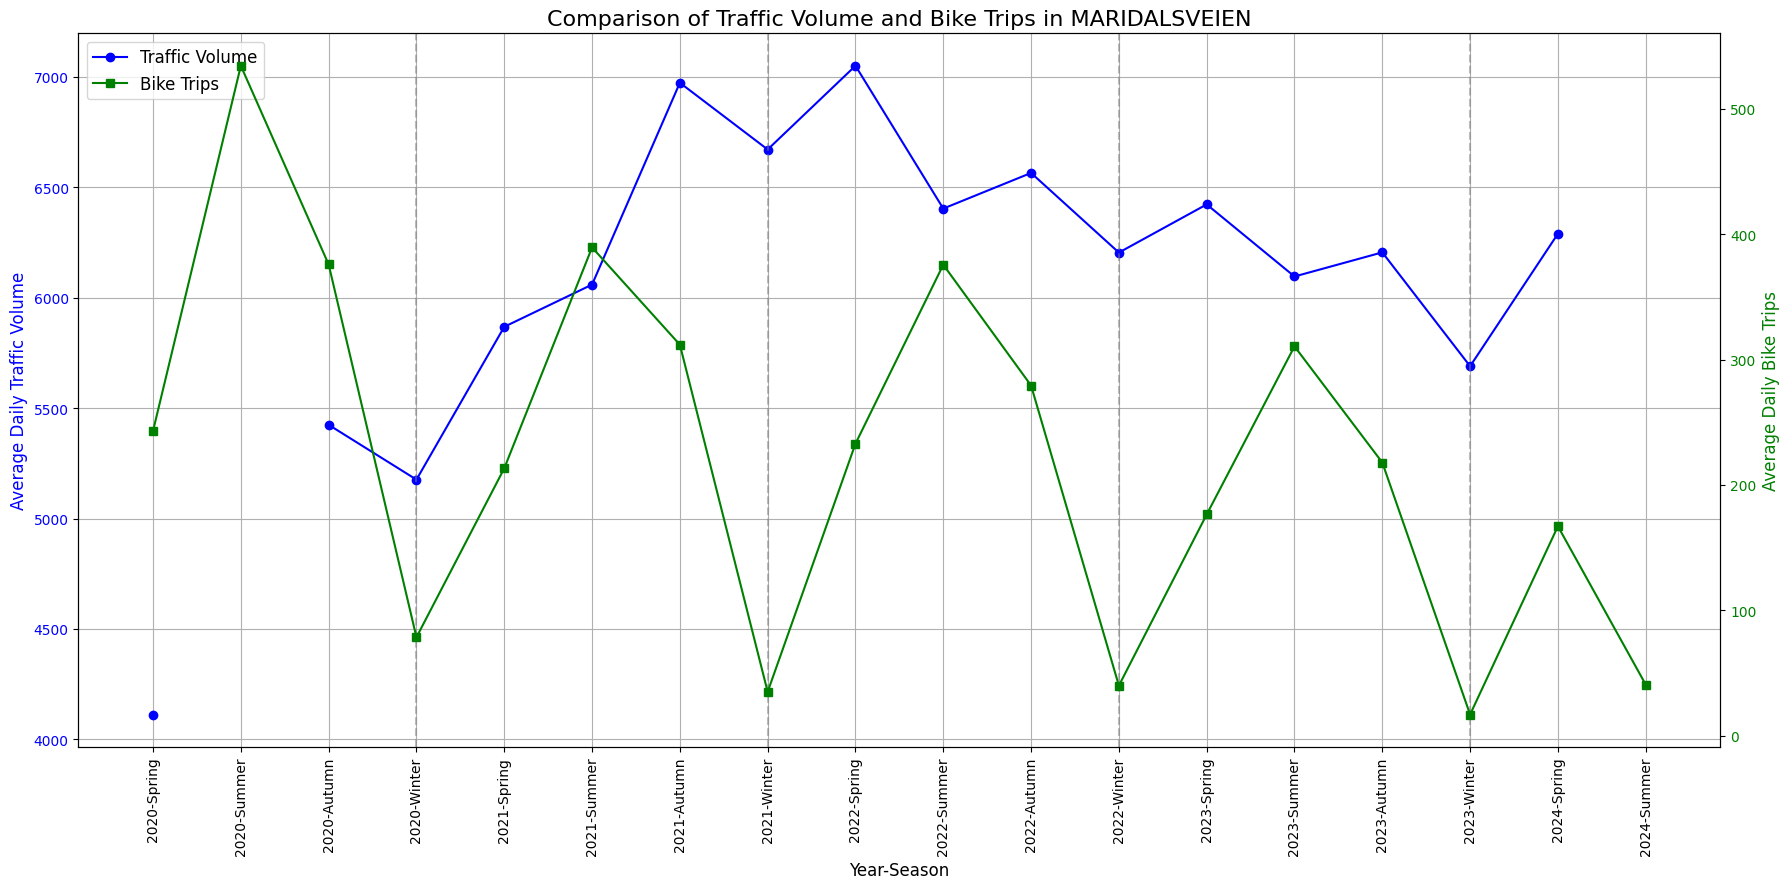

<ipython-input-6-a02634f56856>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data['year_season'], rotation=90, ha='center', fontsize=10)


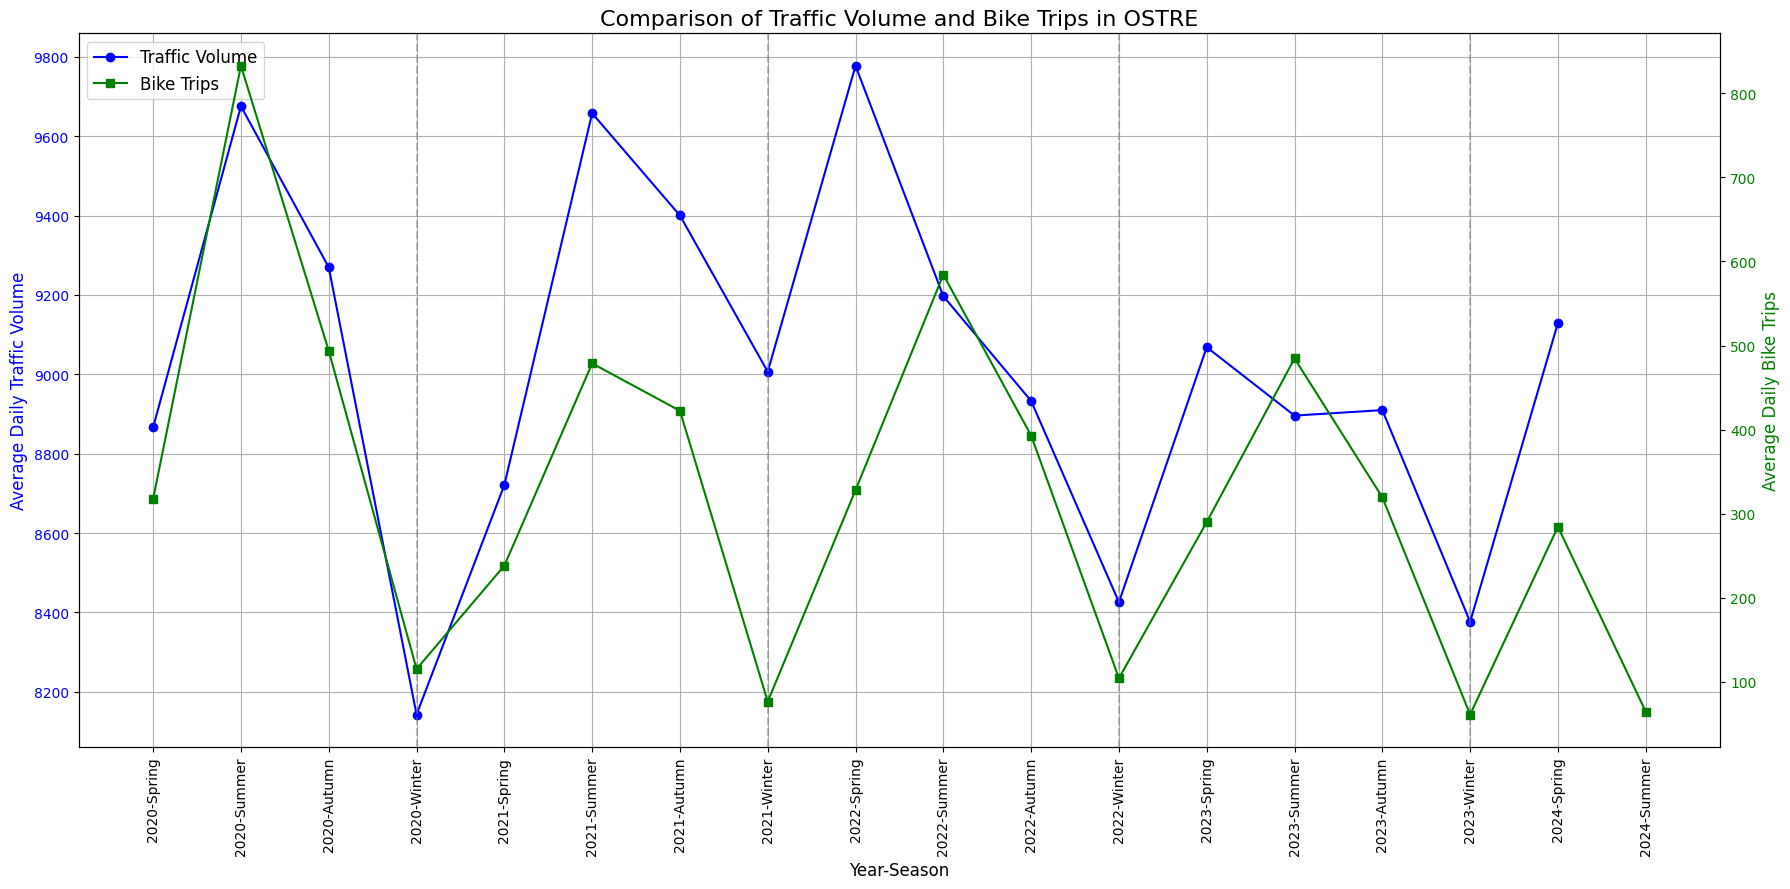

<ipython-input-6-a02634f56856>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data['year_season'], rotation=90, ha='center', fontsize=10)


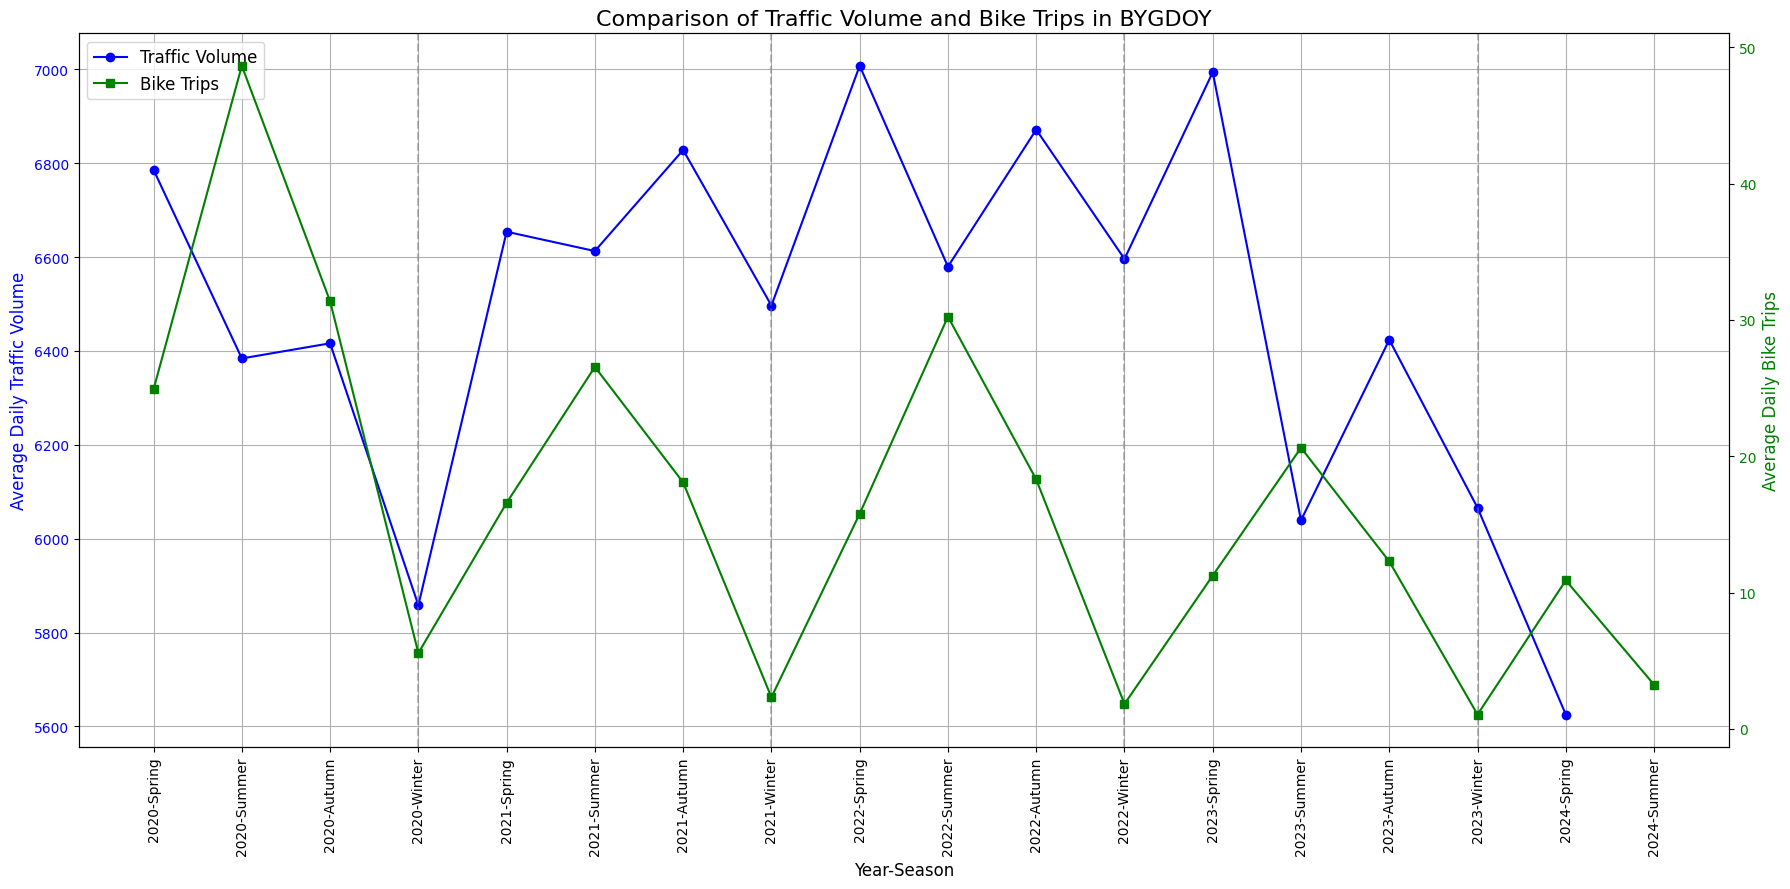

In [ ]:
import pandas as pd

def prepare_data(traffic_df, bike_df):
    # Converti le colonne delle date in datetime
    traffic_df['date'] = pd.to_datetime(traffic_df['date'])
    bike_df['started_at'] = pd.to_datetime(bike_df['started_at'])

    # Funzione per determinare la stagione
    def get_season(date):
        month = date.month
        year = date.year
        if month in [12, 1, 2]:
            return f"{year}-Winter" if month == 12 else f"{year-1}-Winter"
        elif month in [3, 4, 5]:
            return f"{year}-Spring"
        elif month in [6, 7, 8]:
            return f"{year}-Summer"
        else:
            return f"{year}-Autumn"

    # Aggiungi colonna per year-season
    traffic_df['year_season'] = traffic_df['date'].apply(get_season)
    bike_df['year_season'] = bike_df['started_at'].apply(get_season)

    # Calcola la media giornaliera per il traffico
    traffic_data = traffic_df.groupby('year_season')['Traffic_volume'].mean().reset_index()

    # Conta i viaggi in bicicletta per ogni year-season
    bike_data = bike_df.groupby('year_season').size().reset_index(name='bike_trips')
    bike_data['bike_trips'] = bike_data['bike_trips'] / 90  # Media giornaliera (assumendo 90 giorni per stagione)

    # Unisci i dati
    combined_data = pd.merge(traffic_data, bike_data, on='year_season', how='outer')

    # Ordina i dati per anno e stagione
    combined_data['year'] = combined_data['year_season'].str[:4].astype(int)
    combined_data['season'] = combined_data['year_season'].str[5:]
    season_order = {'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3}
    combined_data['season_order'] = combined_data['season'].map(season_order)

    # Escludi l'inverno 2019
    combined_data = combined_data[combined_data['year_season'] != '2019-Winter']

    # Ordina i dati
    combined_data = combined_data.sort_values(['year', 'season_order'])

    # Rimuovi le colonne ausiliarie usate per l'ordinamento
    combined_data = combined_data.drop(['year', 'season', 'season_order'], axis=1)

    return combined_data

def plot_traffic_and_bike_trends(data, location_name):
    fig, ax1 = plt.subplots(figsize=(18, 10))
    ax2 = ax1.twinx()

    ax1.plot(data['year_season'], data['Traffic_volume'], color='blue', marker='o', label='Traffic Volume')
    ax2.plot(data['year_season'], data['bike_trips'], color='green', marker='s', label='Bike Trips')

    ax1.set_xlabel('Year-Season', fontsize=12)
    ax1.set_ylabel('Average Daily Traffic Volume', color='blue', fontsize=12)
    ax2.set_ylabel('Average Daily Bike Trips', color='green', fontsize=12)

    ax1.tick_params(axis='y', labelcolor='blue', labelsize=10)
    ax2.tick_params(axis='y', labelcolor='green', labelsize=10)

    plt.title(f'Comparison of Traffic Volume and Bike Trips in {location_name}', fontsize=16)

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

    # Imposta le etichette dell'asse x verticalmente
    ax1.set_xticklabels(data['year_season'], rotation=90, ha='center', fontsize=10)

    ax1.grid(True)

    # Aggiungi linee verticali tratteggiate ogni 4 stagioni (1 anno)
    for i in range(3, len(data), 4):
        ax1.axvline(x=i, color='gray', linestyle='--', alpha=0.5)

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

# Prepara i dati e crea i grafici per ogni località
locations = ['MARIDALSVEIEN', 'OSTRE', 'BYGDOY']

for location in locations:
    traffic_df = globals()[f'traffic_df_{location}']
    bike_df = globals()[f'bike_df_{location}']

    combined_data = prepare_data(traffic_df, bike_df)
    plot_traffic_and_bike_trends(combined_data, location)

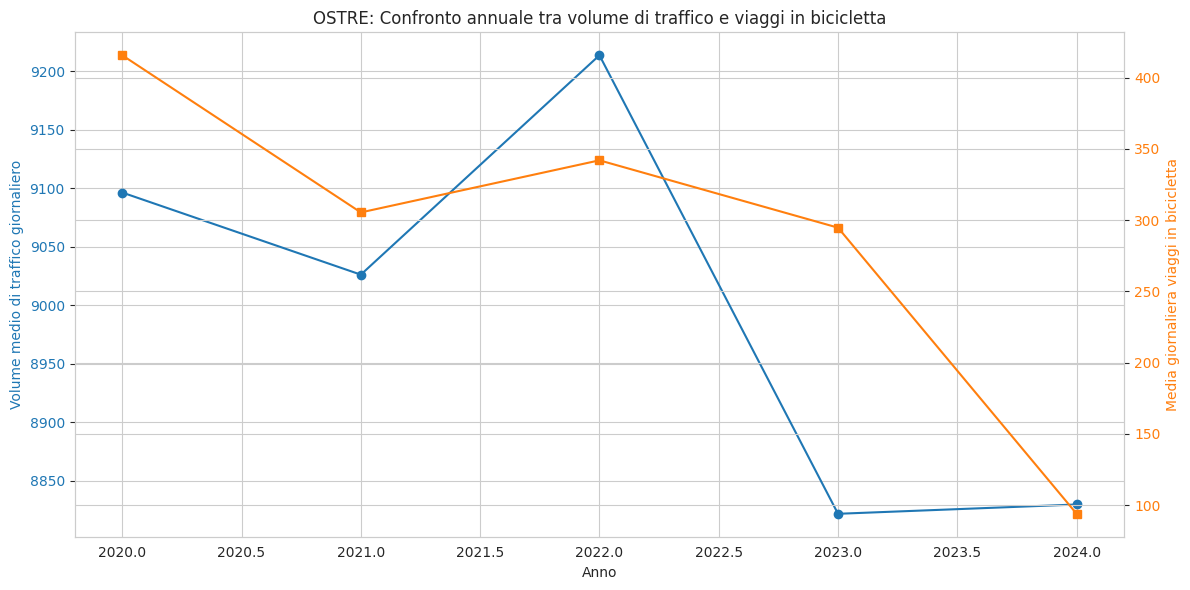


OSTRE - Statistiche annuali:
   date  Traffic_volume  started_at  bike_trips
0  2020     9096.383333        2020  415.717808
1  2021     9026.166667        2021  305.424658
2  2022     9213.750000        2022  341.989041
3  2023     8821.700000        2023  294.717808
4  2024     8829.650000        2024   93.931507


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_traffic_and_bike_data(traffic_df, bike_df, location_name):
    # Converti le colonne delle date in datetime
    traffic_df['date'] = pd.to_datetime(traffic_df['date'])
    bike_df['started_at'] = pd.to_datetime(bike_df['started_at'])

    # Raggruppa i dati per anno
    yearly_traffic = traffic_df.groupby(traffic_df['date'].dt.year)['Traffic_volume'].mean().reset_index()
    yearly_bike = bike_df.groupby(bike_df['started_at'].dt.year).size().reset_index(name='bike_trips')
    yearly_bike['bike_trips'] = yearly_bike['bike_trips'] / 365  # Media giornaliera

    # Unisci i dati
    merged_df = pd.merge(yearly_traffic, yearly_bike, left_on='date', right_on='started_at', how='outer')
    merged_df = merged_df.fillna(0)

    # Crea il grafico
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Anno')
    ax1.set_ylabel('Volume medio di traffico giornaliero', color=color)
    ax1.plot(merged_df['date'], merged_df['Traffic_volume'], color=color, marker='o')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # Crea un secondo asse y
    color = 'tab:orange'
    ax2.set_ylabel('Media giornaliera viaggi in bicicletta', color=color)
    ax2.plot(merged_df['date'], merged_df['bike_trips'], color=color, marker='s')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f'{location_name}: Confronto annuale tra volume di traffico e viaggi in bicicletta')
    fig.tight_layout()
    plt.show()

    print(f"\n{location_name} - Statistiche annuali:")
    print(merged_df)

    return merged_df

# Esempio di utilizzo
ostre_data = analyze_traffic_and_bike_data(traffic_df_OSTRE, bike_df_OSTRE, "OSTRE")


Values for MARIDALSVEIEN:
    year_season  bike_trips
0   2019-Winter        2257
1   2020-Autumn       33821
2   2020-Spring       21877
3   2020-Summer       48074
4   2020-Winter         923
5   2021-Autumn       28064
6   2021-Spring       19193
7   2021-Summer       35043
8   2021-Winter        5787
9   2022-Autumn       25134
10  2022-Spring       20960
11  2022-Summer       33800
12  2022-Winter        2943
13  2023-Autumn       19611
14  2023-Spring       15884
15  2023-Summer       27943
16  2023-Winter        2633
17  2024-Spring       15037
18  2024-Summer        3680
19  2024-Winter         825

Values for OSTRE:
    year_season  bike_trips
0   2019-Winter        3742
1   2020-Autumn       44438
2   2020-Spring       28596
3   2020-Summer       74961
4   2020-Winter        2345
5   2021-Autumn       38011
6   2021-Spring       21426
7   2021-Summer       43087
8   2021-Winter        9453
9   2022-Autumn       35358
10  2022-Spring       29515
11  2022-Summer       52587
12

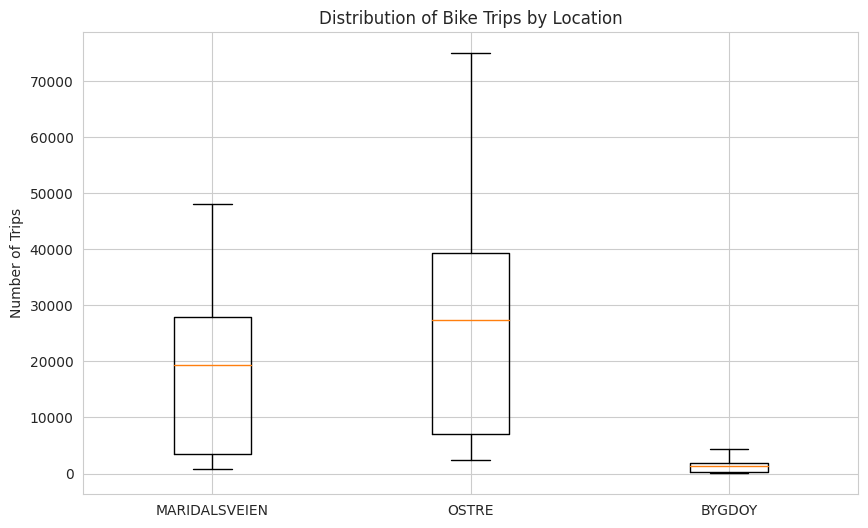

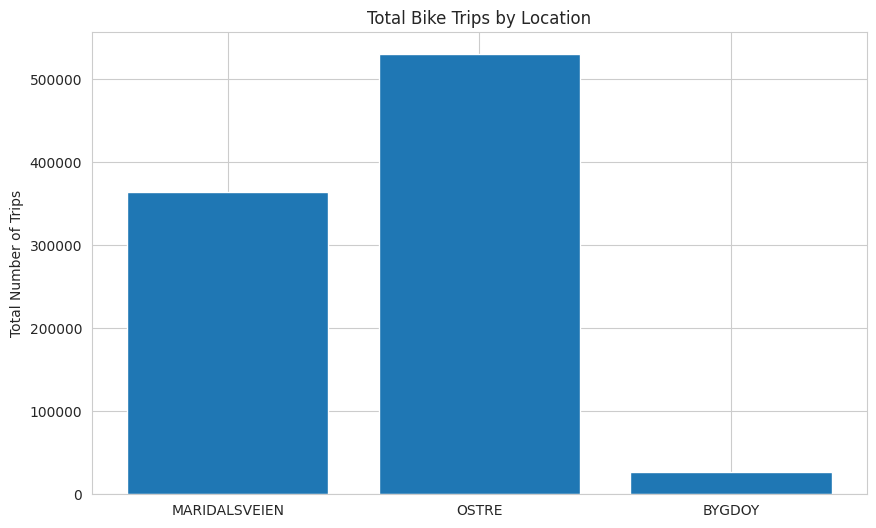

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def prepare_data(bike_df):
    bike_df['started_at'] = pd.to_datetime(bike_df['started_at'])

    def get_season(date):
        month = date.month
        year = date.year
        if month in [12, 1, 2]:
            return f"{year-1 if month == 12 else year}-Winter"
        elif month in [3, 4, 5]:
            return f"{year}-Spring"
        elif month in [6, 7, 8]:
            return f"{year}-Summer"
        else:
            return f"{year}-Autumn"

    bike_df['year_season'] = bike_df['started_at'].apply(get_season)
    bike_data = bike_df.groupby('year_season').size().reset_index(name='bike_trips')
    return bike_data

# Prepare data for each location
locations = ['MARIDALSVEIEN', 'OSTRE', 'BYGDOY']
data_dict = {}

for location in locations:
    bike_df = globals()[f'bike_df_{location}']
    data_dict[location] = prepare_data(bike_df)

# Ensure all locations have the same dates
all_seasons = sorted(set.union(*[set(data['year_season']) for data in data_dict.values()]))
for location in locations:
    data_dict[location] = data_dict[location].set_index('year_season').reindex(all_seasons).reset_index()
    data_dict[location]['bike_trips'] = data_dict[location]['bike_trips'].fillna(0)

# Print values for each location
for location in locations:
    print(f"\nValues for {location}:")
    print(data_dict[location])

# Calculate and print basic statistics for each location
for location in locations:
    print(f"\nStatistics for {location}:")
    print(data_dict[location]['bike_trips'].describe())

# Calculate and print total trips for each location
for location in locations:
    total_trips = data_dict[location]['bike_trips'].sum()
    print(f"\nTotal trips for {location}: {total_trips}")

# Display a box plot to compare distributions
plt.figure(figsize=(10, 6))
plt.boxplot([data_dict[loc]['bike_trips'] for loc in locations], labels=locations)
plt.title('Distribution of Bike Trips by Location')
plt.ylabel('Number of Trips')
plt.show()

# Create a bar chart to compare totals
totals = [data_dict[loc]['bike_trips'].sum() for loc in locations]
plt.figure(figsize=(10, 6))
plt.bar(locations, totals)
plt.title('Total Bike Trips by Location')
plt.ylabel('Total Number of Trips')
plt.show()

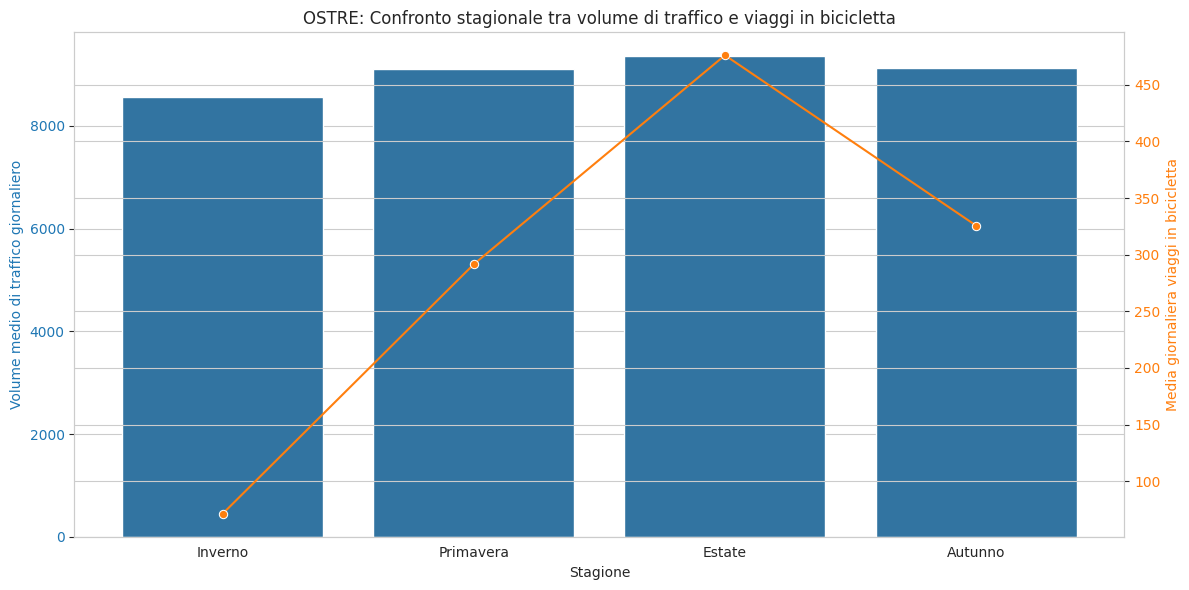


OSTRE - Statistiche stagionali:
      season  Traffic_volume  bike_trips
2    Inverno     8559.857143   71.273333
3  Primavera     9111.385714  291.593333
1     Estate     9356.583333  476.108889
0    Autunno     9128.183333  325.680000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_traffic_and_bike_data_seasonal(traffic_df, bike_df, location_name):
    # Converti le colonne delle date in datetime
    traffic_df['date'] = pd.to_datetime(traffic_df['date'])
    bike_df['started_at'] = pd.to_datetime(bike_df['started_at'])

    # Funzione per determinare la stagione
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Inverno'
        elif month in [3, 4, 5]:
            return 'Primavera'
        elif month in [6, 7, 8]:
            return 'Estate'
        else:
            return 'Autunno'

    # Aggiungi colonne per anno e stagione
    traffic_df['year'] = traffic_df['date'].dt.year
    traffic_df['season'] = traffic_df['date'].dt.month.map(get_season)
    bike_df['year'] = bike_df['started_at'].dt.year
    bike_df['season'] = bike_df['started_at'].dt.month.map(get_season)

    # Rimuovi i dati dell'Estate 2024
    traffic_df = traffic_df[~((traffic_df['year'] == 2024) & (traffic_df['season'] == 'Estate'))]
    bike_df = bike_df[~((bike_df['year'] == 2024) & (bike_df['season'] == 'Estate'))]

    # Raggruppa i dati per stagione
    traffic_agg = traffic_df.groupby('season')['Traffic_volume'].mean().reset_index()
    bike_agg = bike_df.groupby('season').size().reset_index(name='bike_trips')
    bike_agg['bike_trips'] = bike_agg['bike_trips'] / (len(bike_df['year'].unique()) * 90)  # Media giornaliera approssimativa per stagione

    # Unisci i dati
    merged_df = pd.merge(traffic_agg, bike_agg, on='season', how='outer')
    merged_df = merged_df.fillna(0)

    # Ordina le stagioni
    season_order = ['Inverno', 'Primavera', 'Estate', 'Autunno']
    merged_df['season'] = pd.Categorical(merged_df['season'], categories=season_order, ordered=True)
    merged_df = merged_df.sort_values('season')

    # Crea il grafico
    fig, ax1 = plt.subplots(figsize=(12, 6))

    sns.set_style("whitegrid")

    color = 'tab:blue'
    ax1.set_xlabel('Stagione')
    ax1.set_ylabel('Volume medio di traffico giornaliero', color=color)
    sns.barplot(x='season', y='Traffic_volume', data=merged_df, ax=ax1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # Crea un secondo asse y
    color = 'tab:orange'
    ax2.set_ylabel('Media giornaliera viaggi in bicicletta', color=color)
    sns.lineplot(x='season', y='bike_trips', data=merged_df, ax=ax2, color=color, marker='o')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f'{location_name}: Confronto stagionale tra volume di traffico e viaggi in bicicletta')
    plt.tight_layout()
    plt.show()

    print(f"\n{location_name} - Statistiche stagionali:")
    print(merged_df)

    return merged_df

# Esempio di utilizzo
ostre_data = analyze_traffic_and_bike_data_seasonal(traffic_df_OSTRE, bike_df_OSTRE, "OSTRE")

## Quarto Indicatore

In [ ]:
###################
# CORRELATION BUBBLE PLOT
###################


import pandas as pd
import plotly.express as px

def analyze_bike_stations_and_traffic(traffic_df, bike_df, location_name):
    # Ensure date columns are datetime
    traffic_df['date'] = pd.to_datetime(traffic_df['date'])
    bike_df['started_at'] = pd.to_datetime(bike_df['started_at'])

    # Filter data for May 2024
    traffic_df = traffic_df[(traffic_df['date'].dt.year == 2024) & (traffic_df['date'].dt.month == 5)]
    bike_df = bike_df[(bike_df['started_at'].dt.year == 2024) & (bike_df['started_at'].dt.month == 5)]

    # Aggregate bike data by day
    bike_df['date'] = bike_df['started_at'].dt.date
    bike_daily = bike_df.groupby(['date', 'start_station_name']).size().reset_index(name='trip_count')

    # Get the top 10 most popular bike stations in May 2024
    top_stations = bike_df['start_station_name'].value_counts().nlargest(10)

    # Prepare data for each top station
    station_data = []
    for station in top_stations.index:
        station_trips = bike_daily[bike_daily['start_station_name'] == station]
        merged_data = pd.merge(station_trips, traffic_df, on='date', how='inner')
        correlation = merged_data['trip_count'].corr(merged_data['Traffic_volume'])
        station_data.append({
            'station': station,
            'total_trips': top_stations[station],
            'correlation': correlation,
            'traffic_speed_index': merged_data['Traffic_volume'].mean(),  # Example metric
            'traffic_time_index': merged_data['trip_count'].mean()  # Example metric
        })

    # Create DataFrame from station data
    station_df = pd.DataFrame(station_data)

    # Create a bubble plot using plotly
    fig = px.scatter(
        station_df,
        x='traffic_speed_index',
        y='traffic_time_index',
        size='total_trips',
        color='station',
        hover_name='station',
        title=f'{location_name}: Correlation between Traffic Indexes and Total Trips',
        labels={'traffic_speed_index': 'Traffic Speed Index', 'traffic_time_index': 'Traffic Time Index'},
    )

    # Show the plot
    fig.show()

    # Print additional information
    print(f"\n{location_name} - Top 10 Bike-Sharing Stations Analysis (May 2024):")
    print(station_df.sort_values('total_trips', ascending=False).to_string(index=False))

    return station_df

# Assuming traffic_df and bike_df for each location are already available
maridalsveien_data = analyze_bike_stations_and_traffic(traffic_df_MARIDALSVEIEN, bike_df_MARIDALSVEIEN, "MARIDALSVEIEN")
ostre_data = analyze_bike_stations_and_traffic(traffic_df_OSTRE, bike_df_OSTRE, "OSTRE")
bygdoy_data = analyze_bike_stations_and_traffic(traffic_df_BYGDOY, bike_df_BYGDOY, "BYGDOY")


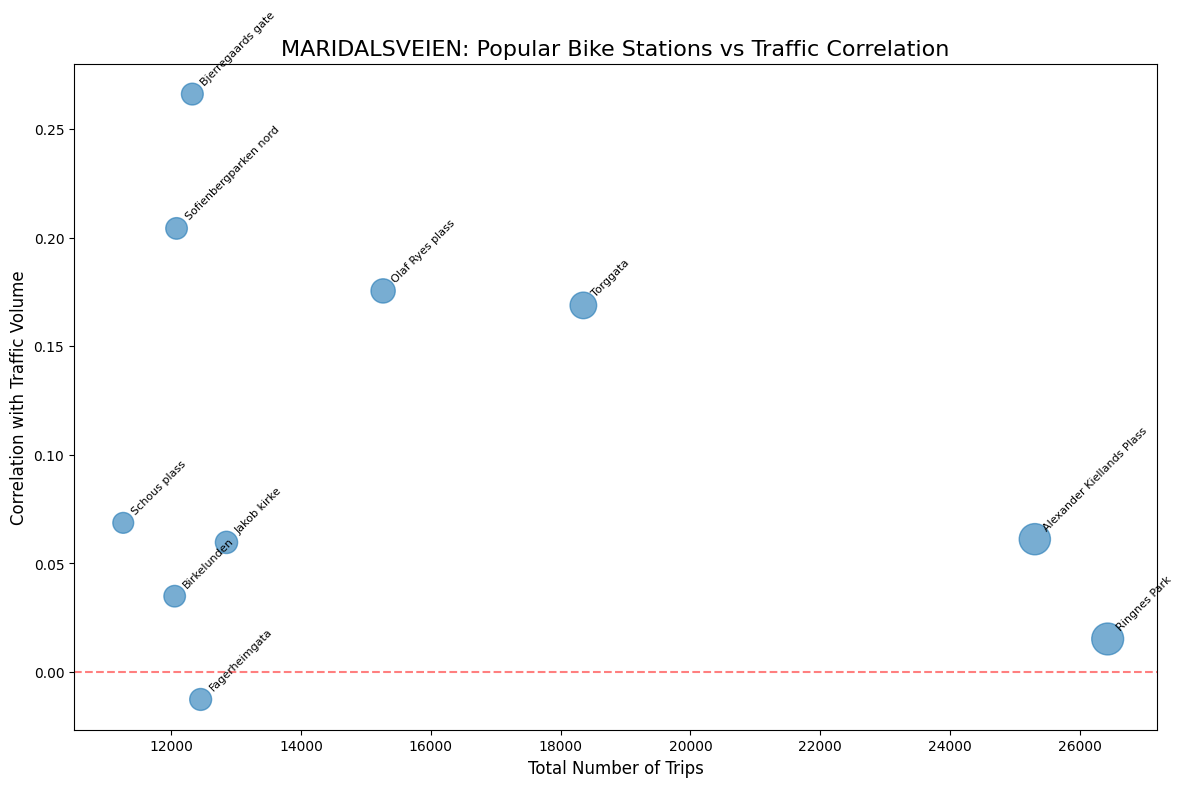


MARIDALSVEIEN - Top 10 Bike-Sharing Stations Analysis:
                  station  total_trips  correlation
             Ringnes Park        26425     0.015198
Alexander Kiellands Plass        25303     0.061128
                 Torggata        18350     0.168748
          Olaf Ryes plass        15266     0.175413
              Jakob kirke        12854     0.059660
            Fagerheimgata        12456    -0.012641
        Bjerregaards gate        12328     0.266023
    Sofienbergparken nord        12085     0.204187
              Birkelunden        12056     0.034891
             Schous plass        11264     0.068644


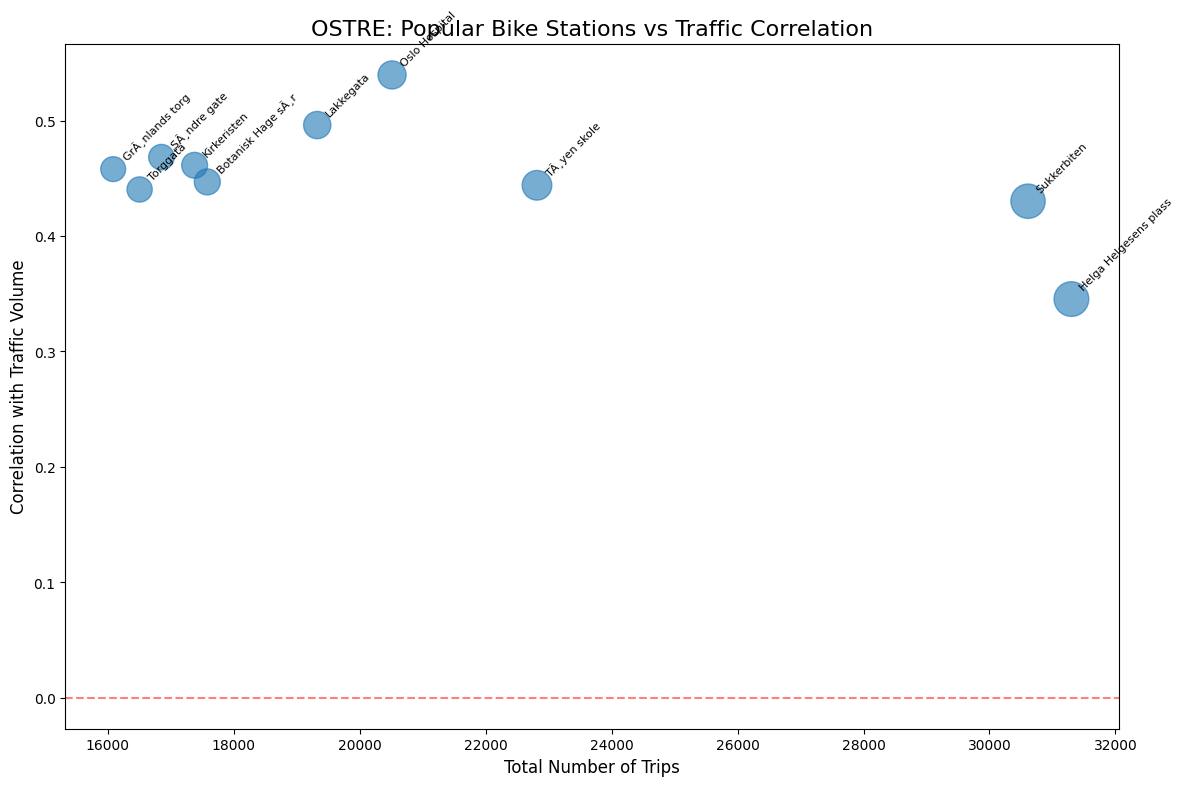


OSTRE - Top 10 Bike-Sharing Stations Analysis:
              station  total_trips  correlation
Helga Helgesens plass        31301     0.345452
          Sukkerbiten        30612     0.430263
         TÃ¸yen skole        22815     0.444070
        Oslo Hospital        20514     0.539716
            Lakkegata        19326     0.496257
   Botanisk Hage sÃ¸r        17580     0.446994
          Kirkeristen        17379     0.461404
         SÃ¸ndre gate        16852     0.468456
             Torggata        16506     0.440449
      GrÃ¸nlands torg        16086     0.458081


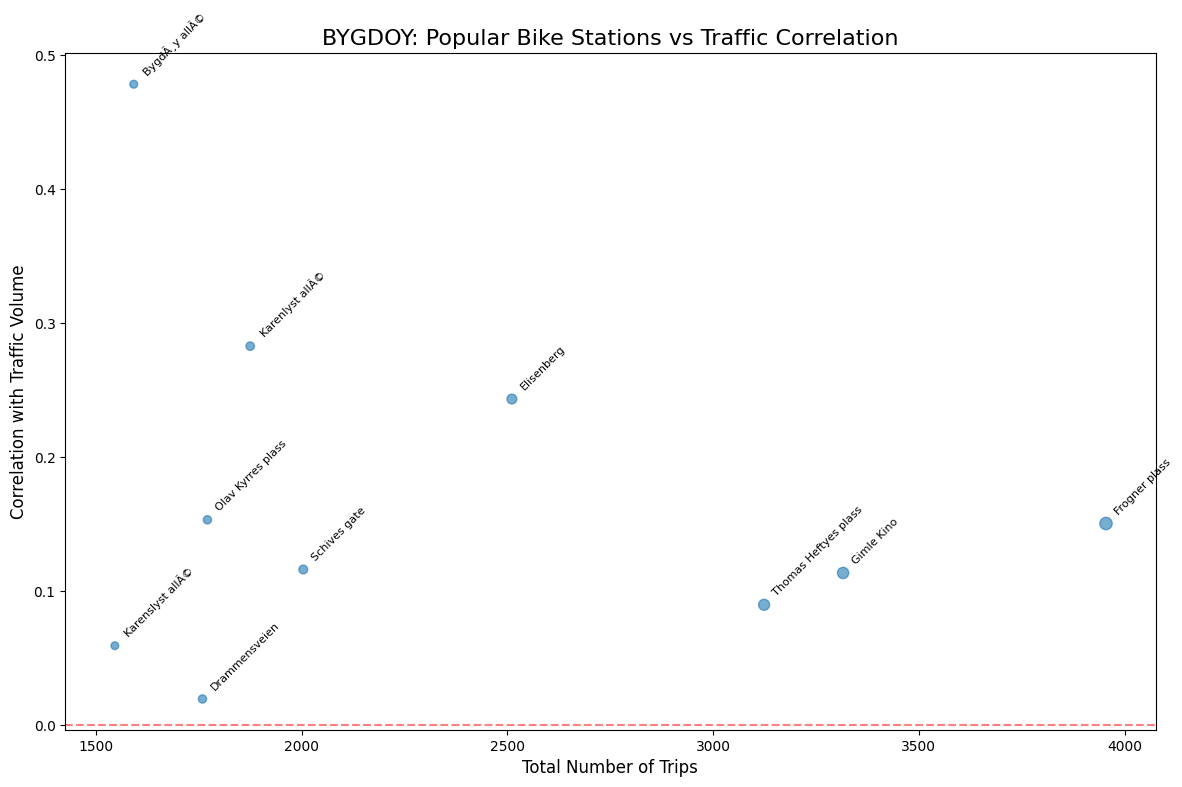


BYGDOY - Top 10 Bike-Sharing Stations Analysis:
             station  total_trips  correlation
       Frogner plass         3955     0.150667
          Gimle Kino         3316     0.113777
Thomas Heftyes plass         3124     0.090055
          Elisenberg         2511     0.243536
        Schives gate         2004     0.116376
     Karenlyst allÃ©         1875     0.282980
   Olav Kyrres plass         1771     0.153429
       Drammensveien         1759     0.019765
       BygdÃ¸y allÃ©         1592     0.478369
    Karenslyst allÃ©         1546     0.059519


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_bike_stations_and_traffic(traffic_df, bike_df, location_name):
    # Ensure date columns are datetime
    traffic_df['date'] = pd.to_datetime(traffic_df['date'])
    bike_df['started_at'] = pd.to_datetime(bike_df['started_at'])

    # Aggregate traffic data by day
    traffic_daily = traffic_df.groupby('date')['Traffic_volume'].mean().reset_index()

    # Get the top 10 most popular bike stations
    top_stations = bike_df['start_station_name'].value_counts().nlargest(10)

    # Prepare data for each top station
    station_data = []
    for station in top_stations.index:
        station_trips = bike_df[bike_df['start_station_name'] == station]
        daily_trips = station_trips.groupby(station_trips['started_at'].dt.date).size().reset_index(name='trip_count')
        daily_trips.columns = ['date', 'trip_count']
        daily_trips['date'] = pd.to_datetime(daily_trips['date'])
        merged_data = pd.merge(daily_trips, traffic_daily, on='date', how='inner')
        correlation = merged_data['trip_count'].corr(merged_data['Traffic_volume'])
        station_data.append({
            'station': station,
            'total_trips': top_stations[station],
            'correlation': correlation
        })

    # Create DataFrame from station data
    station_df = pd.DataFrame(station_data)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Scatter plot
    scatter = ax.scatter(station_df['total_trips'], station_df['correlation'],
                         s=station_df['total_trips']/50, alpha=0.6)

    # Add labels for each point
    for idx, row in station_df.iterrows():
        ax.annotate(row['station'], (row['total_trips'], row['correlation']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8,
                    rotation=45, ha='left', va='bottom')

    # Set labels and title
    ax.set_xlabel('Total Number of Trips', fontsize=12)
    ax.set_ylabel('Correlation with Traffic Volume', fontsize=12)
    ax.set_title(f'{location_name}: Popular Bike Stations vs Traffic Correlation', fontsize=16)

    # Add a horizontal line at y=0 for reference
    ax.axhline(y=0, color='r', linestyle='--', alpha=0.5)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

    # Print additional information
    print(f"\n{location_name} - Top 10 Bike-Sharing Stations Analysis:")
    print(station_df.sort_values('total_trips', ascending=False).to_string(index=False))

    return station_df

# Use the function for each location
maridalsveien_data = analyze_bike_stations_and_traffic(traffic_df_MARIDALSVEIEN, bike_df_MARIDALSVEIEN, "MARIDALSVEIEN")
ostre_data = analyze_bike_stations_and_traffic(traffic_df_OSTRE, bike_df_OSTRE, "OSTRE")
bygdoy_data = analyze_bike_stations_and_traffic(traffic_df_BYGDOY, bike_df_BYGDOY, "BYGDOY")

## Quinto Indicatore

<ipython-input-44-57aea85feb1c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_df['date'] = pd.to_datetime(traffic_df['date']).dt.date


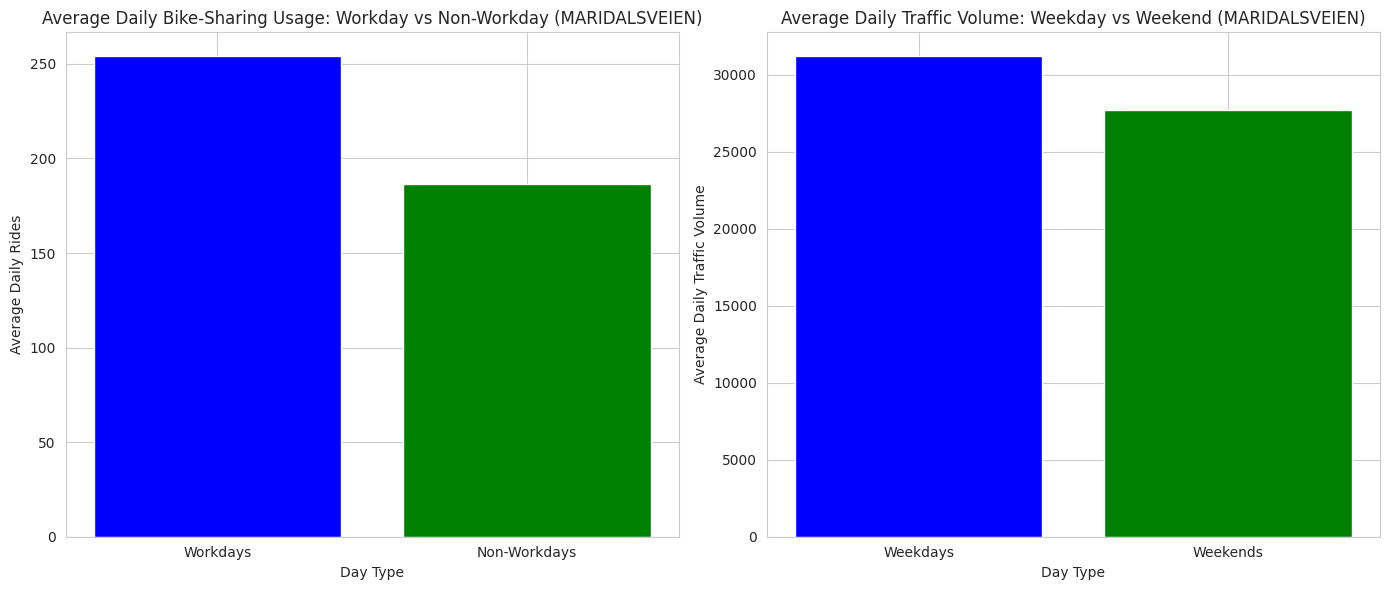

<ipython-input-44-57aea85feb1c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_df['date'] = pd.to_datetime(traffic_df['date']).dt.date


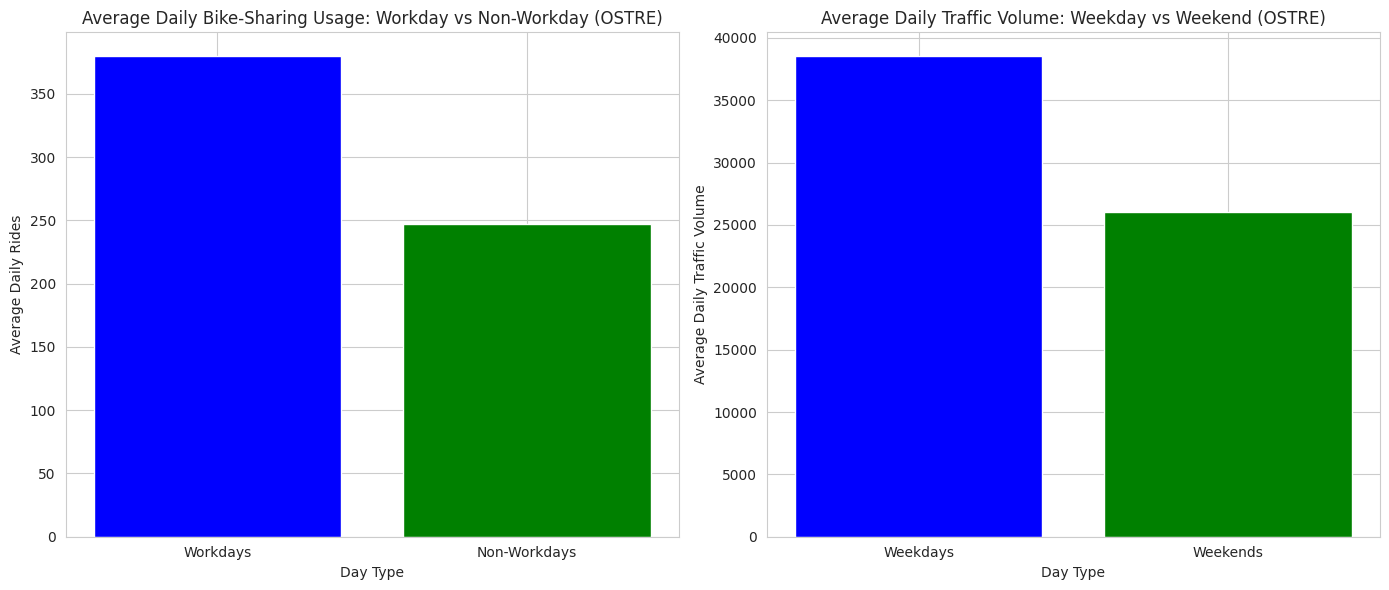

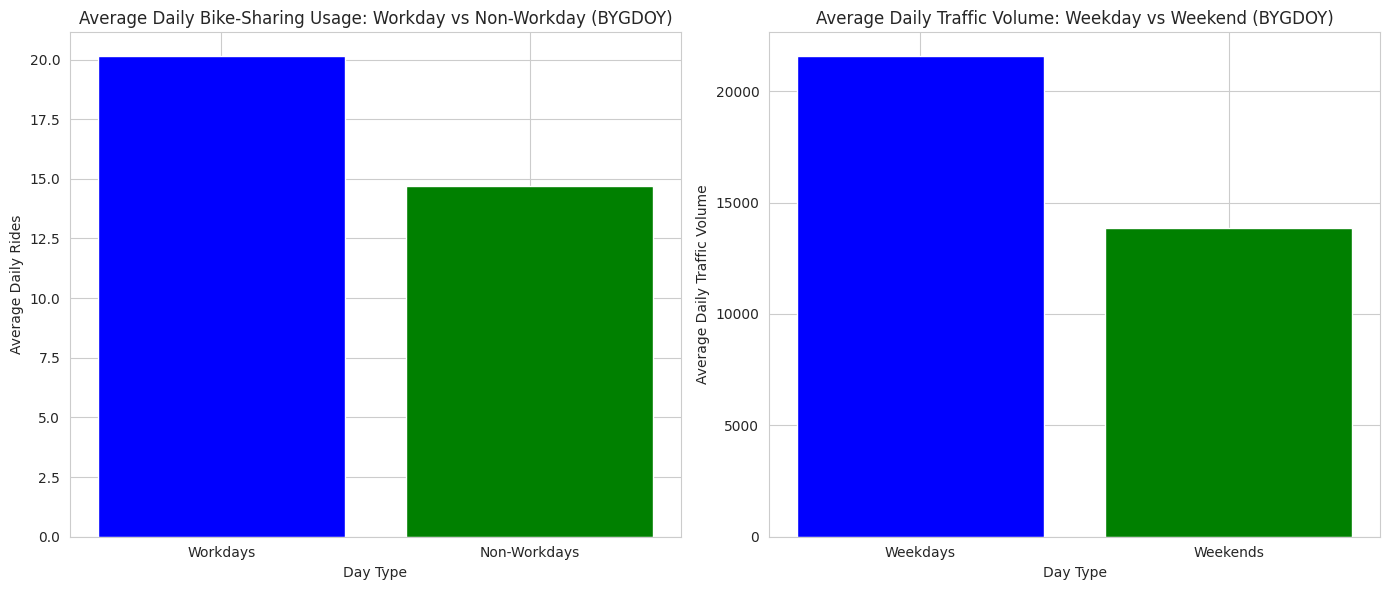

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_daily_bike_usage(bike_df, traffic_df, location):
    # Convertire i nomi delle colonne in minuscolo per evitare problemi con maiuscole e minuscole
    bike_df.columns = bike_df.columns.str.lower()
    traffic_df.columns = traffic_df.columns.str.lower()

    # Rimuovere colonne duplicate se presenti
    bike_df = bike_df.loc[:, ~bike_df.columns.duplicated()]
    traffic_df = traffic_df.loc[:, ~traffic_df.columns.duplicated()]

    # Creare la colonna 'date' dai dati di inizio del viaggio
    bike_df['date'] = pd.to_datetime(bike_df['started_at']).dt.date
    traffic_df['date'] = pd.to_datetime(traffic_df['date']).dt.date

    # Raggruppare i dati delle bici per giorno e se è giorno lavorativo
    daily_bike_usage = bike_df.groupby(['date', 'is_workday']).size().reset_index(name='total_rides')

    # Separare i dati in giorni lavorativi e non lavorativi
    workday_bike_usage = daily_bike_usage[daily_bike_usage['is_workday'] == True]
    non_workday_bike_usage = daily_bike_usage[daily_bike_usage['is_workday'] == False]

    # Calcolare la media giornaliera dei viaggi in bici
    average_workday_bike_usage = workday_bike_usage['total_rides'].mean()
    average_non_workday_bike_usage = non_workday_bike_usage['total_rides'].mean()

    # Raggruppare i dati del traffico per giorno e se è fine settimana
    daily_traffic_usage = traffic_df.groupby(['date', 'is_weekend']).agg({'traffic_volume': 'sum'}).reset_index()

    # Separare i dati in giorni lavorativi e fine settimana
    workday_traffic_usage = daily_traffic_usage[daily_traffic_usage['is_weekend'] == False]
    weekend_traffic_usage = daily_traffic_usage[daily_traffic_usage['is_weekend'] == True]

    # Calcolare la media giornaliera del traffico
    average_workday_traffic_usage = workday_traffic_usage['traffic_volume'].mean()
    average_weekend_traffic_usage = weekend_traffic_usage['traffic_volume'].mean()

    # Visualizzare i risultati per le bici
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    labels = ['Workdays', 'Non-Workdays']
    average_rides = [average_workday_bike_usage, average_non_workday_bike_usage]
    plt.bar(labels, average_rides, color=['blue', 'green'])
    plt.xlabel('Day Type')
    plt.ylabel('Average Daily Rides')
    plt.title(f'Average Daily Bike-Sharing Usage: Workday vs Non-Workday ({location})')

    # Visualizzare i risultati per il traffico
    plt.subplot(1, 2, 2)
    labels = ['Weekdays', 'Weekends']
    average_traffic = [average_workday_traffic_usage, average_weekend_traffic_usage]
    plt.bar(labels, average_traffic, color=['blue', 'green'])
    plt.xlabel('Day Type')
    plt.ylabel('Average Daily Traffic Volume')
    plt.title(f'Average Daily Traffic Volume: Weekday vs Weekend ({location})')

    plt.tight_layout()
    plt.show()

    return daily_bike_usage, daily_traffic_usage




# Use the function for each location
maridalsveien_bike, maridalsveien_traffic = analyze_daily_bike_usage(bike_df_MARIDALSVEIEN, traffic_df_hour_2024_MARIDALSVEIEN, "MARIDALSVEIEN")
ostre_bike, ostre_traffic = analyze_daily_bike_usage(bike_df_OSTRE, traffic_df_hour_2024_OSTRE, "OSTRE")
bygdoy_bike, bygdoy_traffic = analyze_daily_bike_usage(bike_df_BYGDOY, traffic_df_hour_2024_BYGDOY, "BYGDOY")

In [ ]:
traffic_df_hour_2024_MARIDALSVEIEN.columns

Index(['traffic_registration_point', 'name', 'road_reference', 'from', 'to',
       'date', 'from_time', 'to_time', 'lane', 'traffic_volume',
       'coverage_percentage', 'total_hours', 'included_hours', 'invalid_hours',
       'invalid_length', 'length_quality_grade', 'under_5_6m', 'over_5_6m',
       '5_6m_to_7_6m', '7_6m_to_12_5m', '12_5m_to_16_0m', 'over_16_0m',
       '16_0m_to_24_0m', 'over_24_0m', 'year', 'month', 'day', 'hour',
       'day_of_week', 'is_weekend', 'light_vehicles', 'heavy_vehicles',
       'heavy_vehicle_ratio', 'is_rush_hour', 'season',
       'traffic_volume_category', 'traffic_quality_category', 'day_type',
       'is_peak_traffic', 'is_workday', 'date'],
      dtype='object')

In [ ]:
# Verifica i nomi delle colonne nei dataframe originali
print("Nomi delle colonne in traffic_df_MARIDALSVEIEN:")
print(traffic_df_MARIDALSVEIEN.columns)

print("\nNomi delle colonne in bike_df_MARIDALSVEIEN:")
print(bike_df_MARIDALSVEIEN.columns)

print("\nNomi delle colonne in traffic_df_OSTRE:")
print(traffic_df_OSTRE.columns)

print("\nNomi delle colonne in bike_df_OSTRE:")
print(bike_df_OSTRE.columns)

print("\nNomi delle colonne in traffic_df_BYGDOY:")
print(traffic_df_BYGDOY.columns)

print("\nNomi delle colonne in bike_df_BYGDOY:")
print(bike_df_BYGDOY.columns)

Nomi delle colonne in traffic_df_MARIDALSVEIEN:
Index(['traffic_registration_point', 'name', 'road_reference', 'from', 'to',
       'traffic_volume', 'confidence_interval_start',
       'confidence_interval_end', 'coverage (%)', 'total_days',
       'included_days', 'invalid_days', 'invalid_length',
       'length_quality_grade (%)', 'lane', 'under_5_6m', 'over_5_6m',
       '5_6m_to_7_6m', '7_6m_to_12_5m', '12_5m_to_16_0m', 'over_16_0m',
       '16_0m_to_24_0m', 'over_24_0m', 'year', 'month', 'day_of_week',
       'light_vehicles', 'heavy_vehicles', 'traffic_volume_check',
       'traffic_volume_difference', 'days_check', 'traffic_volume_outlier',
       'yearmonth', 'monthly_traffic_volume', 'daily_mean_traffic_volume',
       'percent_light_vehicles', 'percent_heavy_vehicles',
       'percent_5_6m_to_7_6m', 'percent_7_6m_to_12_5m',
       'percent_12_5m_to_16_0m', 'percent_16_0m_to_24_0m',
       'percent_over_24_0m', 'confidence_interval', 'traffic_quality_grade',
       'is_weeken

In [ ]:
# Controlla i primi dati di ogni dataframe per assicurarsi che contengano dati validi
print("\nPrime righe di traffic_df_MARIDALSVEIEN:")
print(traffic_df_MARIDALSVEIEN.head())

print("\nPrime righe di bike_df_MARIDALSVEIEN:")
print(bike_df_MARIDALSVEIEN.head())

print("\nPrime righe di traffic_df_OSTRE:")
print(traffic_df_OSTRE.head())

print("\nPrime righe di bike_df_OSTRE:")
print(bike_df_OSTRE.head())

print("\nPrime righe di traffic_df_BYGDOY:")
print(traffic_df_BYGDOY.head())

print("\nPrime righe di bike_df_BYGDOY:")
print(bike_df_BYGDOY.head())


Prime righe di traffic_df_MARIDALSVEIEN:
  traffic_registration_point           name     road_reference  \
0               62991V604777  Maridalsveien  KV14622 S9D1 m425   
1               62991V604777  Maridalsveien  KV14622 S9D1 m425   
2               62991V604777  Maridalsveien  KV14622 S9D1 m425   
3               62991V604777  Maridalsveien  KV14622 S9D1 m425   
4               62991V604777  Maridalsveien  KV14622 S9D1 m425   

                  from                   to  traffic_volume  \
0  2020-01-31 23:00:00  2020-02-29 23:00:00            5148   
1  2020-01-31 23:00:00  2020-02-29 23:00:00            5980   
2  2020-01-31 23:00:00  2020-02-29 23:00:00            5796   
3  2020-01-31 23:00:00  2020-02-29 23:00:00            5332   
4  2020-01-31 23:00:00  2020-02-29 23:00:00           11128   

   confidence_interval_start  confidence_interval_end  coverage (%)  \
0                       5148                     5148         100.0   
1                       5980            

In [ ]:
traffic_df_hour_2024_MARIDALSVEIEN['Date']

0       2024-02-01
1       2024-02-01
2       2024-02-01
3       2024-02-01
4       2024-02-01
           ...    
15110   2024-06-01
15111   2024-06-01
15112   2024-06-01
15113   2024-06-01
15114   2024-06-01
Name: Date, Length: 15115, dtype: datetime64[ns]

In [ ]:
bike_df_MARIDALSVEIEN['Date']

0        2020-03-01
1        2020-03-01
2        2020-03-01
3        2020-03-01
4        2020-03-01
            ...    
363484   2024-06-01
363485   2024-06-01
363486   2024-06-01
363487   2024-06-01
363488   2024-06-01
Name: Date, Length: 363489, dtype: datetime64[ns]

In [ ]:
import pandas as pd

# Supponiamo che i dataset siano già stati caricati nei dataframe
# traffic_df_hour_2024_MARIDALSVEIEN e bike_df_MARIDALSVEIEN

# Convertiamo le colonne 'Date' in formato datetime, se non lo sono già
traffic_df_hour_2024_MARIDALSVEIEN['Date'] = pd.to_datetime(traffic_df_hour_2024_MARIDALSVEIEN['Date'])
bike_df_MARIDALSVEIEN['Date'] = pd.to_datetime(bike_df_MARIDALSVEIEN['Date'])

# Troviamo le date in comune
common_dates = set(traffic_df_hour_2024_MARIDALSVEIEN['Date']).intersection(bike_df_MARIDALSVEIEN['Date'])

# Convertiamo il set in una lista ordinata
common_dates = sorted(list(common_dates))

# Visualizziamo le date in comune
print(common_dates)


[Timestamp('2024-02-01 00:00:00'), Timestamp('2024-03-01 00:00:00'), Timestamp('2024-04-01 00:00:00'), Timestamp('2024-05-01 00:00:00'), Timestamp('2024-06-01 00:00:00')]


In [ ]:
bike_df_MARIDALSVEIEN.columns

Index(['started_at', 'ended_at', 'start_station_name', 'start_station_id',
       'end_station_name', 'end_station_id', 'start_station_latitude',
       'start_station_longitude', 'end_station_latitude',
       'end_station_longitude', 'duration_minutes', 'day_of_week',
       'hour_of_day', 'month', 'year', 'distance_km', 'speed_km_h',
       'duration_category', 'is_rush_hour', 'is_weekend', 'season',
       'distance_category', 'is_round_trip', 'speed_category', 'Date'],
      dtype='object')

In [ ]:
traffic_df_hour_2024_MARIDALSVEIEN.columns

Index(['Traffic_Registration_Point', 'Name', 'Road_Reference', 'From', 'To',
       'Date', 'From_Time', 'To_Time', 'Lane', 'Traffic_Volume',
       'Coverage_Percentage', 'Total_Hours', 'Included_Hours', 'Invalid_Hours',
       'Invalid_Length', 'Length_Quality_Grade', 'Under_5_6m', 'Over_5_6m',
       '5_6m_to_7_6m', '7_6m_to_12_5m', '12_5m_to_16_0m', 'Over_16_0m',
       '16_0m_to_24_0m', 'Over_24_0m', 'Year', 'Month', 'Day', 'Hour',
       'Day_of_Week', 'Is_Weekend', 'Light_Vehicles', 'Heavy_Vehicles',
       'Heavy_Vehicle_Ratio', 'Is_Rush_Hour', 'Season',
       'Traffic_Volume_Category', 'Traffic_Quality_Category', 'Day_Type',
       'Is_Peak_Traffic'],
      dtype='object')

In [ ]:
bike_df_OSTRE

started_at                 ended_at  \
0       2020-03-17 23:51:55.463  2020-03-17 23:56:39.069   
1       2020-03-18 05:57:55.508  2020-03-18 06:07:49.713   
2       2020-03-18 06:33:31.748  2020-03-18 06:35:01.755   
3       2020-03-18 06:36:21.615  2020-03-18 06:44:30.637   
4       2020-03-18 06:38:38.051  2020-03-18 06:42:46.211   
...                         ...                      ...   
529895  2024-06-13 17:45:37.802  2024-06-13 17:49:34.883   
529896  2024-06-13 17:50:24.476  2024-06-13 17:54:30.838   
529897  2024-06-13 18:02:33.600  2024-06-13 18:09:05.023   
529898  2024-06-13 18:05:55.880  2024-06-13 18:12:13.683   
529899  2024-06-13 18:09:12.003  2024-06-13 18:12:23.718   

            start_station_name  start_station_id           end_station_name  \
0        Sjøsiden ved fontenen             392.0               Kirkegata 15   
1               Jernbanetorget             478.0           Fred Olsens gate   
2       Botanisk hage sør-vest             569.0          Botanisk Hage sør   
3              Sommerfrydhagen             485.0                Trelastgata   
4                    Lakkegata             440.0  Annette Thommessens Plass   
...                        ...               ...                        ...   
529895    Akerselvallmenningen            2333.0                       Salt   
529896             Sukkerbiten             464.0                  Paléhaven   
529897           Oslo Hospital             735.0    Sjøsiden 2 ved fontenen   
529898             Kirkeristen             396.0                Anker Hotel   
529899             Tøyen skole             408.0     Botanisk hage sør-vest   

        end_station_id  start_station_latitude  start_station_longitude  \
0                787.0               59.910181                10.751699   
1                609.0               59.911901                10.749929   
2                460.0               59.917835                10.766374   
3                552.0               59.911453                10.776072   
4                574.0               59.917209                10.762213   
...                ...                     ...                      ...   
529895           616.0               59.907259                10.754885   
529896           599.0               59.905124                10.753764   
529897           392.0               59.903213                10.767344   
529898           500.0               59.913000                10.746761   
529899           569.0               59.914943                10.773977   

        end_station_latitude  end_station_longitude  ...  year  distance_km  \
0                  59.910156              10.743457  ...  2020     0.914842   
1                  59.911051              10.749374  ...  2020     0.112737   
2                  59.915418              10.769330  ...  2020     0.423932   
3                  59.908005              10.762570  ...  2020     1.546824   
4                  59.910739              10.761000  ...  2020     0.730642   
...                      ...                    ...  ...   ...          ...   
529895             59.906922              10.746530  ...  2024     0.928090   
529896             59.910331              10.750110  ...  2024     0.706028   
529897             59.910181              10.751699  ...  2024     1.901117   
529898             59.917279              10.758155  ...  2024     1.351056   
529899             59.917835              10.766374  ...  2024     0.902967   

        speed_km_h  duration_category  is_rush_hour  is_weekend  season  \
0        11.612695              short             0           0  winter   
1         0.683018              short             0           0  winter   
2        16.955945              short             0           0  winter   
3        11.387150              short             0           0  winter   
4        10.599259              short             0           0  winter   
...            ...                ...           ...

In [ ]:
import pandas as pd

# Define the file paths
file_paths = [
    '/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/bygdoy_traffic_hour_2024R.csv',
    '/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/ostre_traffic_hour_2024R.csv',
    '/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/maridalsveien_traffic_hour_2024R.csv'
]

# Read each CSV file into a DataFrame
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Assuming you want to print or work with these DataFrames, you can do so now
for i, df in enumerate(dfs):
    print(f"DataFrame {i+1}:")
    print(df.head())  # Displaying the first few rows of each DataFrame


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Magistrale/DS for Smart Cities/script/bygdoy_traffic_hour_2024R.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_traffic_graph(traffic_df, bike_df, location_name):
    # Converti le colonne delle date in datetime
    traffic_df['Date'] = pd.to_datetime(traffic_df['Date'])
    bike_df['started_at'] = pd.to_datetime(bike_df['started_at'])

    # Trova le date comuni
    common_dates = set(traffic_df['Date'].dt.date) & set(bike_df['started_at'].dt.date)

    # Filtra i dati del traffico per le date comuni
    traffic_df_filtered = traffic_df[traffic_df['Date'].dt.date.isin(common_dates)]

    # Raggruppa i dati per tipo di giorno (weekend/non-weekend) e ora, calcolando la media del volume di traffico
    grouped_data = traffic_df_filtered.groupby(['Is_Weekend', 'Hour'])['Traffic_Volume'].mean().unstack()

    # Rinomina gli indici per chiarezza
    grouped_data = grouped_data.rename(index={False: 'Workday', True: 'Weekend'})

    # Crea il grafico
    plt.figure(figsize=(12, 6))
    plt.plot(grouped_data.columns, grouped_data.loc['Workday'], label='Workday', marker='o')
    plt.plot(grouped_data.columns, grouped_data.loc['Weekend'], label='Weekend', marker='o')

    plt.title(f'Average Daily Traffic Volume with Hourly Data - {location_name}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Traffic Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(0, 24))

    plt.tight_layout()
    plt.savefig(f'traffic_volume_{location_name}.png')
    plt.close()

    # Calcola e stampa alcune statistiche
    workday_avg = grouped_data.loc['Workday'].mean()
    weekend_avg = grouped_data.loc['Weekend'].mean()
    print(f"{location_name}:")
    print(f"Average workday traffic: {workday_avg:.2f}")
    print(f"Average weekend traffic: {weekend_avg:.2f}")
    print(f"Difference: {workday_avg - weekend_avg:.2f}")
    print()

# Crea i grafici per ciascun luogo
create_traffic_graph(traffic_df_hour_2024_MARIDALSVEIEN, bike_df_MARIDALSVEIEN, 'Maridalsveien')
create_traffic_graph(traffic_df_hour_2024_OSTRE, bike_df_OSTRE, 'Ostre')
create_traffic_graph(traffic_df_hour_2024_BYGDOY, bike_df_BYGDOY, 'Bygdoy')

KeyError: 'Workday'

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def process_traffic_data(df, dataset_name):

    # Calculate short and long vehicles
    total_vehicles = df['under_5_6m'] + df['over_5_6m']
    df['short_vehicle_perc'] = (df['under_5_6m'] / total_vehicles * 100).round(2)

    # Group by year and month
    grouped = df.groupby(['Year', 'Month'])[['under_5_6m']].sum()


    return (grouped[['under_5_6m']] / total_vehicles * 100).round(2)

# Process each dataset
results_BYGDOY = process_traffic_data(traffic_df_BYGDOY, "BYGDOY")
results_OSTRE = process_traffic_data(traffic_df_OSTRE, "OSTRE")
results_MARIDALSVEIEN = process_traffic_data(traffic_df_MARIDALSVEIEN, "MARIDALSVEIEN")

# Combine the results
combined_df = results_BYGDOY.rename(columns={'Light_percentage': 'BYGDOY'}).join(
    results_OSTRE.rename(columns={'Light_percentage': 'OSTRE'}),
    how='outer'
).join(
    results_MARIDALSVEIEN.rename(columns={'Light_percentage': 'MARIDALSVEIEN'}),
    how='outer'
)

# Create the line plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plot each dataset's light percentage as a line
combined_df['BYGDOY'].plot(ax=ax, marker='o', linestyle='-', color='skyblue', label='BYGDOY')
combined_df['OSTRE'].plot(ax=ax, marker='o', linestyle='-', color='orange', label='OSTRE')
combined_df['MARIDALSVEIEN'].plot(ax=ax, marker='o', linestyle='-', color='green', label='MARIDALSVEIEN')

# Add vertical lines to separate years
years = combined_df.index.get_level_values('Year').unique()
for year in years:
    year_start = combined_df.index.get_loc((year, 1))
    ax.axvline(year_start - 0.5, color='grey', linestyle='--', linewidth=1)

ax.set_title('Light Vehicle Percentage Comparison')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Percentage')
ax.set_xticks(range(len(combined_df)))
ax.set_xticklabels([f"{year}-{month:02d}" for year, month in combined_df.index], rotation=90)
ax.legend()

plt.tight_layout()
plt.savefig('combined_traffic_distribution_lineplot.png')
plt.show()


ValueError: columns overlap but no suffix specified: Index(['under_5_6m',            0,            1,            2,            3,
                  4,            5,            6,            7,            8,
       ...
                250,          251,          252,          253,          254,
                255,          256,          257,          258,          259],
      dtype='object', length=261)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_avg_daily_traffic(df, dataset_name):
    # Convert 'From' and 'To' columns to datetime ignoring timezone
    df['From'] = pd.to_datetime(df['From'], format='%Y-%m-%dT%H:%M%z', utc=True).dt.tz_localize(None)
    df['To'] = pd.to_datetime(df['To'], format='%Y-%m-%dT%H:%M%z', utc=True).dt.tz_localize(None)

    # Extract year and month
    df['Year'] = df['From'].dt.year
    df['Month'] = df['From'].dt.month

    # Calculate average daily traffic volume
    df['Avg_Daily_Traffic'] = df['Traffic_volume'] / df['Included_days']

    # Group by year and month
    grouped = df.groupby(['Year', 'Month'])['Avg_Daily_Traffic'].mean().reset_index()

    print(f"\nAverage daily traffic volume for {dataset_name}:")
    print(grouped)

    # Create the plot
    plt.figure(figsize=(15, 8))
    sns.barplot(x='Month', y='Avg_Daily_Traffic', hue='Year', data=grouped)

    plt.title(f'Average Daily Traffic Volume - {dataset_name}')
    plt.xlabel('Month')
    plt.ylabel('Average Daily Traffic')
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    plt.tight_layout()
    plt.savefig(f'avg_daily_traffic_{dataset_name}.png')
    plt.close()

    return grouped

# Calculate for each dataset
results_BYGDOY = calculate_avg_daily_traffic(traffic_df_BYGDOY, "BYGDOY")
results_OSTRE = calculate_avg_daily_traffic(traffic_df_OSTRE, "OSTRE")
results_MARIDALSVEIEN = calculate_avg_daily_traffic(traffic_df_MARIDALSVEIEN, "MARIDALSVEIEN")


Average daily traffic volume for BYGDOY:
    Year  Month  Avg_Daily_Traffic
0   2020      1         723.650000
1   2020      2         193.306452
2   2020      3         204.550000
3   2020      4         217.193548
4   2020      5         249.600000
5   2020      6         183.155914
6   2020      7         217.209677
7   2020      8         224.688889
8   2020      9         226.505376
9   2020     10         208.483333
10  2020     11         192.661290
11  2020     12         176.435484
12  2021      1         216.517857
13  2021      2         194.924731
14  2021      3         204.255556
15  2021      4         212.817204
16  2021      5         241.227778
17  2021      6         185.059140
18  2021      7         224.032258
19  2021      8         238.550000
20  2021      9         224.419355
21  2021     10         238.850000
22  2021     11         205.215054
23  2021     12         272.310606
24  2022      1         231.958333
25  2022      2         225.951613
26  2022     

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_traffic_trends(df, dataset_name):
    # Convert 'From' and 'To' columns to datetime ignoring timezone
    df['From'] = pd.to_datetime(df['From'], format='%Y-%m-%dT%H:%M%z', utc=True).dt.tz_localize(None)
    df['To'] = pd.to_datetime(df['To'], format='%Y-%m-%dT%H:%M%z', utc=True).dt.tz_localize(None)

    # Extract year, month and season
    df['Year'] = df['From'].dt.year
    df['Month'] = df['From'].dt.month
    df['Season'] = pd.cut(df['Month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Autumn'])

    # Calculate average daily traffic volume
    df['Avg_Daily_Traffic'] = df['Traffic_volume'] / df['Included_days']

    # Annual trend
    annual_trend = df.groupby('Year')['Avg_Daily_Traffic'].mean().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Year', y='Avg_Daily_Traffic', data=annual_trend)
    plt.title(f'Annual Traffic Trend - {dataset_name}')
    plt.xlabel('Year')
    plt.ylabel('Average Daily Traffic')
    plt.tight_layout()
    plt.savefig(f'annual_trend_{dataset_name}.png')
    plt.close()

    # Seasonal trend
    seasonal_trend = df.groupby(['Year', 'Season'])['Avg_Daily_Traffic'].mean().reset_index()

    plt.figure(figsize=(14, 7))
    sns.barplot(x='Season', y='Avg_Daily_Traffic', hue='Year', data=seasonal_trend)
    plt.title(f'Seasonal Traffic Trend - {dataset_name}')
    plt.xlabel('Season')
    plt.ylabel('Average Daily Traffic')
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'seasonal_trend_{dataset_name}.png')
    plt.close()

    return annual_trend, seasonal_trend

# Analyze trends for each dataset
annual_BYGDOY, seasonal_BYGDOY = analyze_traffic_trends(traffic_df_BYGDOY, "BYGDOY")
annual_OSTRE, seasonal_OSTRE = analyze_traffic_trends(traffic_df_OSTRE, "OSTRE")
annual_MARIDALSVEIEN, seasonal_MARIDALSVEIEN = analyze_traffic_trends(traffic_df_MARIDALSVEIEN, "MARIDALSVEIEN")

# Print results
for name, annual, seasonal in [("BYGDOY", annual_BYGDOY, seasonal_BYGDOY),
                               ("OSTRE", annual_OSTRE, seasonal_OSTRE),
                               ("MARIDALSVEIEN", annual_MARIDALSVEIEN, seasonal_MARIDALSVEIEN)]:
    print(f"\nAnnual Trend for {name}:")
    print(annual)
    print(f"\nSeasonal Trend for {name}:")
    print(seasonal)


Annual Trend for BYGDOY:
   Year  Avg_Daily_Traffic
0  2020         251.453330
1  2021         221.514962
2  2022         222.443481
3  2023         213.606063
4  2024         222.293172

Seasonal Trend for BYGDOY:
    Year  Season  Avg_Daily_Traffic
0   2020  Winter         373.835484
1   2020  Spring         216.649821
2   2020  Summer         222.801314
3   2020  Autumn         192.526703
4   2021  Winter         205.232715
5   2021  Spring         213.034707
6   2021  Summer         229.000538
7   2021  Autumn         238.791887
8   2022  Winter         224.036649
9   2022  Spring         217.962963
10  2022  Summer         230.600657
11  2022  Autumn         217.173656
12  2023  Winter         223.099044
13  2023  Spring         218.044982
14  2023  Summer         208.155615
15  2023  Autumn         205.124612
16  2024  Winter         222.293172
17  2024  Spring                NaN
18  2024  Summer                NaN
19  2024  Autumn                NaN

Annual Trend for OSTRE:
   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_peak_weekdays(df, dataset_name):
    # Convert 'From' and 'To' columns to datetime ignoring timezone
    df['From'] = pd.to_datetime(df['From'], format='%Y-%m-%dT%H:%M%z', utc=True).dt.tz_localize(None)
    df['To'] = pd.to_datetime(df['To'], format='%Y-%m-%dT%H:%M%z', utc=True).dt.tz_localize(None)

    # Extract weekday and year
    df['Weekday'] = df['From'].dt.day_name()
    df['Year'] = df['From'].dt.year

    # Calculate daily traffic
    df['Daily_Traffic'] = df['Traffic_volume'] / df['Included_days']

    # Calculate average traffic for each day of the week
    weekday_traffic = df.groupby('Weekday')['Daily_Traffic'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

    print(f"\nAverage traffic by day of the week - {dataset_name}:")
    print(weekday_traffic)

    # Create the overall weekday traffic graph
    plt.figure(figsize=(12, 6))
    sns.barplot(x=weekday_traffic.index, y=weekday_traffic.values)
    plt.title(f'Average Traffic by Day of the Week - {dataset_name}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Daily Traffic')
    plt.tight_layout()
    plt.savefig(f'weekday_traffic_{dataset_name}.png')
    plt.close()

    # Yearly comparison
    yearly_weekday_traffic = df.groupby(['Year', 'Weekday'])['Daily_Traffic'].mean().unstack()
    yearly_weekday_traffic = yearly_weekday_traffic.reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

    plt.figure(figsize=(14, 8))
    yearly_weekday_traffic.plot(kind='bar', ax=plt.gca())
    plt.title(f'Yearly Comparison of Average Traffic by Day of the Week - {dataset_name}')
    plt.xlabel('Year')
    plt.ylabel('Average Daily Traffic')
    plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f'yearly_weekday_traffic_{dataset_name}.png')
    plt.close()

    return weekday_traffic, yearly_weekday_traffic

# Analyze traffic by day of the week for each dataset
weekday_traffic_BYGDOY, yearly_BYGDOY = analyze_peak_weekdays(traffic_df_BYGDOY, "BYGDOY")
weekday_traffic_OSTRE, yearly_OSTRE = analyze_peak_weekdays(traffic_df_OSTRE, "OSTRE")
weekday_traffic_MARIDALSVEIEN, yearly_MARIDALSVEIEN = analyze_peak_weekdays(traffic_df_MARIDALSVEIEN, "MARIDALSVEIEN")

# Print yearly comparison results
for name, yearly_data in [("BYGDOY", yearly_BYGDOY),
                          ("OSTRE", yearly_OSTRE),
                          ("MARIDALSVEIEN", yearly_MARIDALSVEIEN)]:
    print(f"\nYearly comparison of average traffic by day of the week - {name}:")
    print(yearly_data)


Average traffic by day of the week - BYGDOY:
Weekday
Monday       222.721697
Tuesday      219.962679
Wednesday    227.528498
Thursday     201.987254
Friday       289.993041
Saturday     210.671057
Sunday       219.220637
Name: Daily_Traffic, dtype: float64

Average traffic by day of the week - OSTRE:
Weekday
Monday       318.550798
Tuesday      299.466739
Wednesday    299.867976
Thursday     287.257823
Friday       291.785764
Saturday     291.148781
Sunday       300.254459
Name: Daily_Traffic, dtype: float64

Average traffic by day of the week - MARIDALSVEIEN:
Weekday
Monday       229.550568
Tuesday      208.994933
Wednesday    198.869263
Thursday     242.517673
Friday       200.431316
Saturday     198.264516
Sunday       204.605433
Name: Daily_Traffic, dtype: float64

Yearly comparison of average traffic by day of the week - BYGDOY:
Weekday      Monday     Tuesday   Wednesday    Thursday      Friday  \
Year                                                                  
2020     20

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_vehicle_composition_by_season(df, dataset_name):
    # Preparazione dei dati
    df['From'] = pd.to_datetime(df['From'], format='%Y-%m-%dT%H:%M%z', utc=True).dt.tz_localize(None)
    df['Year'] = df['From'].dt.year
    df['Month'] = df['From'].dt.month
    df['Season'] = pd.cut(df['Month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Autumn'])

    df['Light_vehicles'] = df['< 5.6m']
    df['Heavy_vehicles'] = df['>= 5.6m'] + df['5.6m - 7.6m'] + df['7.6m - 12.5m'] + \
                           df['12.5m - 16.0m'] + df['>= 16.0m'] + df['16.0m - 24.0m'] + \
                           df['>= 24.0m']

    grouped = df.groupby(['Year', 'Season'])[['Light_vehicles', 'Heavy_vehicles']].sum().reset_index()
    grouped['Total'] = grouped['Light_vehicles'] + grouped['Heavy_vehicles']
    grouped['Light_percentage'] = grouped['Light_vehicles'] / grouped['Total'] * 100
    grouped['Heavy_percentage'] = grouped['Heavy_vehicles'] / grouped['Total'] * 100

    # Stampa informazioni di debug
    print(f"\nDataset: {dataset_name}")
    print("Unique combinations of Year and Season:")
    print(grouped[['Year', 'Season']].drop_duplicates())
    print("\nShape of grouped data:", grouped.shape)

    # Creazione del grafico
    plt.figure(figsize=(15, 10))

    # Utilizziamo un grafico a barre affiancate invece di impilate
    sns.barplot(x='Season', y='Light_percentage', hue='Year', data=grouped, palette='Blues', alpha=0.7)
    sns.barplot(x='Season', y='Heavy_percentage', hue='Year', data=grouped, palette='Reds', alpha=0.7)

    plt.title(f'Vehicle Composition by Season - {dataset_name}', fontsize=16)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(f'vehicle_composition_by_season_{dataset_name}.png')
    plt.close()

    return grouped

# Analisi per ciascun dataset
try:
    composition_BYGDOY = analyze_vehicle_composition_by_season(traffic_df_BYGDOY, "BYGDOY")
    composition_OSTRE = analyze_vehicle_composition_by_season(traffic_df_OSTRE, "OSTRE")
    composition_MARIDALSVEIEN = analyze_vehicle_composition_by_season(traffic_df_MARIDALSVEIEN, "MARIDALSVEIEN")
except Exception as e:
    print(f"An error occurred: {e}")
    # Stampa informazioni aggiuntive per il debugging
    for name, df in [("BYGDOY", traffic_df_BYGDOY), ("OSTRE", traffic_df_OSTRE), ("MARIDALSVEIEN", traffic_df_MARIDALSVEIEN)]:
        print(f"\nDataset: {name}")
        print(df.info())
        print(df.head())


Dataset: BYGDOY
Unique combinations of Year and Season:
    Year  Season
0   2020  Winter
1   2020  Spring
2   2020  Summer
3   2020  Autumn
4   2021  Winter
5   2021  Spring
6   2021  Summer
7   2021  Autumn
8   2022  Winter
9   2022  Spring
10  2022  Summer
11  2022  Autumn
12  2023  Winter
13  2023  Spring
14  2023  Summer
15  2023  Autumn
16  2024  Winter
17  2024  Spring
18  2024  Summer
19  2024  Autumn

Shape of grouped data: (20, 7)

Dataset: OSTRE
Unique combinations of Year and Season:
    Year  Season
0   2019  Winter
1   2019  Spring
2   2019  Summer
3   2019  Autumn
4   2020  Winter
5   2020  Spring
6   2020  Summer
7   2020  Autumn
8   2021  Winter
9   2021  Spring
10  2021  Summer
11  2021  Autumn
12  2022  Winter
13  2022  Spring
14  2022  Summer
15  2022  Autumn
16  2023  Winter
17  2023  Spring
18  2023  Summer
19  2023  Autumn
20  2024  Winter
21  2024  Spring
22  2024  Summer
23  2024  Autumn

Shape of grouped data: (24, 7)

Dataset: MARIDALSVEIEN
Unique combinatio

## Bike

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_trips_by_hour(df, dataset_name):
    # Converti la colonna 'started_at' in datetime, usando un approccio flessibile
    df['started_at'] = pd.to_datetime(df['started_at'], format='mixed', utc=True)

    # Estrai l'ora dalla colonna 'started_at'
    df['hour'] = df['started_at'].dt.hour

    # Conta il numero di viaggi per ogni ora
    hourly_trips = df['hour'].value_counts().sort_index()

    # Crea il grafico
    plt.figure(figsize=(12, 6))
    sns.barplot(x=hourly_trips.index, y=hourly_trips.values)
    plt.title(f'Distribution of Trips by Hour - {dataset_name}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Trips')
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.savefig(f'trips_by_hour_{dataset_name}.png')
    plt.close()

    return hourly_trips

# Analizza ciascun dataset
try:
    hourly_trips_MARIDALSVEIN = analyze_trips_by_hour(bike_df_MARIDALSVEIN, "MARIDALSVEIN")
    hourly_trips_OSTRE = analyze_trips_by_hour(bike_df_OSTRE, "OSTRE")
    hourly_trips_BYGDOY = analyze_trips_by_hour(bike_df_BYGDOY, "BYGDOY")

    # Stampa i risultati
    for name, hourly_data in [("MARIDALSVEIN", hourly_trips_MARIDALSVEIN),
                              ("OSTRE", hourly_trips_OSTRE),
                              ("BYGDOY", hourly_trips_BYGDOY)]:
        print(f"\nDistribution of Trips by Hour - {name}:")
        print(hourly_data)

except Exception as e:
    print(f"An error occurred: {e}")
    # Stampa alcune righe di esempio per debugging
    for name, df in [("MARIDALSVEIN", bike_df_MARIDALSVEIN),
                     ("OSTRE", bike_df_OSTRE),
                     ("BYGDOY", bike_df_BYGDOY)]:
        print(f"\nSample data from {name}:")
        print(df['started_at'].head())


Distribution of Trips by Hour - MARIDALSVEIN:
hour
0        12
1        14
2         2
3       947
4      4480
5     13700
6     21882
7     14997
8     13488
9     16107
10    18213
11    19693
12    22768
13    28912
14    36648
15    38535
16    35133
17    29779
18    23694
19    18973
20    16564
21    13117
22     8609
23      848
Name: count, dtype: int64

Distribution of Trips by Hour - OSTRE:
hour
0         4
1         1
2         4
3      2286
4      8190
5     25528
6     37255
7     26530
8     21419
9     25228
10    28282
11    30929
12    34833
13    45345
14    57823
15    54588
16    44386
17    35571
18    27501
19    21681
20    17937
21    13502
22     8440
23     1115
Name: count, dtype: int64

Distribution of Trips by Hour - BYGDOY:
hour
0        1
3       85
4      345
5     1525
6     2723
7     1626
8     1321
9     1588
10    1907
11    2093
12    2157
13    2689
14    3657
15    3647
16    3019
17    2445
18    1869
19    1368
20     910
21     602
22     57

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_popular_stations(df, dataset_name, top_n=10):
    # Analizza le stazioni di partenza più popolari
    start_stations = df['start_station_name'].value_counts().nlargest(top_n)

    # Analizza le stazioni di arrivo più popolari
    end_stations = df['end_station_name'].value_counts().nlargest(top_n)

    # Crea i grafici
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

    # Grafico per le stazioni di partenza
    sns.barplot(x=start_stations.values, y=start_stations.index, ax=ax1)
    ax1.set_title(f'Top {top_n} Start Stations - {dataset_name}')
    ax1.set_xlabel('Number of Trips')
    ax1.set_ylabel('Station Name')

    # Grafico per le stazioni di arrivo
    sns.barplot(x=end_stations.values, y=end_stations.index, ax=ax2)
    ax2.set_title(f'Top {top_n} End Stations - {dataset_name}')
    ax2.set_xlabel('Number of Trips')
    ax2.set_ylabel('Station Name')

    plt.tight_layout()
    plt.savefig(f'popular_stations_{dataset_name}.png')
    plt.close()

    return start_stations, end_stations

# Analizza ciascun dataset
for name, df in [("MARIDALSVEIN", bike_df_MARIDALSVEIN),
                 ("OSTRE", bike_df_OSTRE),
                 ("BYGDOY", bike_df_BYGDOY)]:
    try:
        start_stations, end_stations = analyze_popular_stations(df, name)

        print(f"\nTop 10 Start Stations - {name}:")
        print(start_stations)

        print(f"\nTop 10 End Stations - {name}:")
        print(end_stations)

    except Exception as e:
        print(f"An error occurred while processing {name}: {e}")
        print("Sample data:")
        print(df[['start_station_name', 'end_station_name']].head())


Top 10 Start Stations - MARIDALSVEIN:
start_station_name
Ringnes Park                 27792
Alexander Kiellands Plass    26922
Torggata                     19844
Olaf Ryes plass              17309
Jakob kirke                  14152
Fagerheimgata                13452
Birkelunden                  13125
Sofienbergparken nord        13076
Bjerregaards gate            13053
Schous plass                 12562
Name: count, dtype: int64

Top 10 End Stations - MARIDALSVEIN:
end_station_name
Torggata                     34614
Alexander Kiellands Plass    24582
Olaf Ryes plass              22456
Ringnes Park                 19695
Schous plass                 15578
Jakob kirke                  14609
AHO                          12682
Sofienbergparken nord        12605
Birkelunden                  12199
Vulkan                       12191
Name: count, dtype: int64

Top 10 Start Stations - OSTRE:
start_station_name
Helga Helgesens plass    33256
Sukkerbiten              33060
Tøyen skole            

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_usage_peaks(df, dataset_name):
    # Converti la colonna 'started_at' in datetime
    df['started_at'] = pd.to_datetime(df['started_at'], format='mixed', utc=True)

    # Estrai l'ora dalla colonna 'started_at'
    df['hour'] = df['started_at'].dt.hour

    # Conta il numero di viaggi per ogni ora
    hourly_trips = df['hour'].value_counts().sort_index()

    # Crea il grafico
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=hourly_trips.index, y=hourly_trips.values)

    # Evidenzia i picchi
    peaks = hourly_trips[hourly_trips == hourly_trips.max()]
    plt.scatter(peaks.index, peaks.values, color='red', s=100, label='Peak(s)')

    plt.title(f'Usage Peaks During the Day - {dataset_name}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Trips')
    plt.xticks(range(0, 24))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'usage_peaks_{dataset_name}.png')
    plt.close()

    return hourly_trips

# Analizza ciascun dataset
for name, df in [("MARIDALSVEIN", bike_df_MARIDALSVEIN),
                 ("OSTRE", bike_df_OSTRE),
                 ("BYGDOY", bike_df_BYGDOY)]:
    try:
        hourly_trips = analyze_usage_peaks(df, name)

        print(f"\nHourly Usage - {name}:")
        print(hourly_trips)

        peak_hours = hourly_trips[hourly_trips == hourly_trips.max()]
        print(f"\nPeak Usage Hour(s) - {name}:")
        for hour, count in peak_hours.items():
            print(f"Hour: {hour}, Trips: {count}")

    except Exception as e:
        print(f"An error occurred while processing {name}: {e}")
        print("Sample data:")
        print(df['started_at'].head())


Hourly Usage - MARIDALSVEIN:
hour
0        12
1        14
2         2
3       947
4      4480
5     13700
6     21882
7     14997
8     13488
9     16107
10    18213
11    19693
12    22768
13    28912
14    36648
15    38535
16    35133
17    29779
18    23694
19    18973
20    16564
21    13117
22     8609
23      848
Name: count, dtype: int64

Peak Usage Hour(s) - MARIDALSVEIN:
Hour: 15, Trips: 38535

Hourly Usage - OSTRE:
hour
0         4
1         1
2         4
3      2286
4      8190
5     25528
6     37255
7     26530
8     21419
9     25228
10    28282
11    30929
12    34833
13    45345
14    57823
15    54588
16    44386
17    35571
18    27501
19    21681
20    17937
21    13502
22     8440
23     1115
Name: count, dtype: int64

Peak Usage Hour(s) - OSTRE:
Hour: 14, Trips: 57823

Hourly Usage - BYGDOY:
hour
0        1
3       85
4      345
5     1525
6     2723
7     1626
8     1321
9     1588
10    1907
11    2093
12    2157
13    2689
14    3657
15    3647
16    3019
17  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_average_stop_duration(df, dataset_name, top_n=10):
    # Converti le colonne 'started_at' e 'ended_at' in datetime
    df['started_at'] = pd.to_datetime(df['started_at'], format='mixed', utc=True)
    df['ended_at'] = pd.to_datetime(df['ended_at'], format='mixed', utc=True)

    # Ordina il dataframe per stazione e tempo di fine
    df = df.sort_values(['end_station_name', 'ended_at'])

    # Calcola la durata della sosta per ogni bicicletta in ogni stazione
    df['next_start'] = df.groupby('end_station_name')['started_at'].shift(-1)
    df['stop_duration'] = (df['next_start'] - df['ended_at']).dt.total_seconds() / 60  # in minuti

    # Calcola la durata media della sosta per ogni stazione
    avg_stop_duration = df.groupby('end_station_name')['stop_duration'].mean().sort_values(ascending=False)

    # Seleziona le top N stazioni
    top_stations = avg_stop_duration.nlargest(top_n)

    # Crea il grafico
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_stations.values, y=top_stations.index)
    plt.title(f'Average Stop Duration at Top {top_n} Stations - {dataset_name}')
    plt.xlabel('Average Stop Duration (minutes)')
    plt.ylabel('Station Name')
    plt.tight_layout()
    plt.savefig(f'avg_stop_duration_{dataset_name}.png')
    plt.close()

    return avg_stop_duration

# Analizza ciascun dataset
for name, df in [("MARIDALSVEIN", bike_df_MARIDALSVEIN),
                 ("OSTRE", bike_df_OSTRE),
                 ("BYGDOY", bike_df_BYGDOY)]:
    try:
        avg_stop_duration = analyze_average_stop_duration(df, name)

        print(f"\nAverage Stop Duration at Stations - {name}:")
        print(avg_stop_duration.nlargest(10))  # Mostra le top 10 stazioni

    except Exception as e:
        print(f"An error occurred while processing {name}: {e}")
        print("Sample data:")
        print(df[['started_at', 'ended_at', 'start_station_name', 'end_station_name']].head())


Average Stop Duration at Stations - MARIDALSVEIN:
end_station_name
Legevakten                  6848.098661
Colletts gate               1742.655935
Krohgstøtten hospital       1370.848074
St. Hanshaugen park nord    1169.287142
Uelands gate                1062.675543
Ullevålsveien                841.171499
Ila                          821.660743
Nybrua holdeplass            790.862932
St. Hanshaugen park sør      593.883958
St. Hanshaugen               577.447881
Name: stop_duration, dtype: float64

Average Stop Duration at Stations - OSTRE:
end_station_name
Legevakten               7122.342395
Dronningens gate          682.087568
Krohgstøtten hospital     666.040499
Nybrua holdeplass         571.964680
Skippergata               514.959924
Langkaia                  496.639169
Biskop Gunnerus' gate     495.656608
Stjerneplassen            380.384274
Salt                      368.244934
Kirkegata 15              359.644253
Name: stop_duration, dtype: float64

Average Stop Duration at Sta

## Confronti

Distribuzione del traffico per tipologia di veicolo vs Utilizzo del bike sharing:
Confronta la percentuale di veicoli leggeri con il numero di viaggi in bicicletta per mese/anno.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_traffic_vs_bikes(traffic_df, bike_df, area_name):
    # Converti le colonne 'From' e 'To' in datetime utilizzando il formato 'mixed'
    traffic_df['From'] = pd.to_datetime(traffic_df['From'], format='mixed', utc=True).dt.tz_localize(None)
    traffic_df['To'] = pd.to_datetime(traffic_df['To'], format='mixed', utc=True).dt.tz_localize(None)

    # Estrai anno e mese
    traffic_df['Year'] = traffic_df['From'].dt.year
    traffic_df['Month'] = traffic_df['From'].dt.month

    # Filtra per gli anni tra il 2020 e il 2024
    traffic_df = traffic_df[(traffic_df['Year'] >= 2020) & (traffic_df['Year'] <= 2024)]

    # Preparazione dei dati del traffico
    traffic_df['Date'] = pd.to_datetime(traffic_df['From'])
    traffic_df['Total_vehicles'] = traffic_df['Traffic_volume']

    # Aggregazione mensile dei dati del traffico
    traffic_monthly = traffic_df.groupby(['Year', 'Month'])['Total_vehicles'].sum().reset_index()

    # Aggregazione mensile dei dati delle biciclette
    bike_monthly = bike_df.groupby(['Year', 'Month']).size().reset_index(name='Bike_trips')

    # Creazione di una combinazione completa di anni e mesi
    all_years = pd.DataFrame({'Year': pd.concat([traffic_monthly['Year'], bike_monthly['Year']]).unique()})
    all_months = pd.DataFrame({'Month': range(1, 13)})
    complete_time = pd.merge(all_years.assign(key=1), all_months.assign(key=1), on='key').drop('key', axis=1)

    # Unione dei dati del traffico e delle biciclette con la combinazione completa di anni e mesi
    combined_data = pd.merge(complete_time, traffic_monthly, on=['Year', 'Month'], how='left').fillna(0)
    combined_data = pd.merge(combined_data, bike_monthly, on=['Year', 'Month'], how='left').fillna(0)

    # Ordiniamo i dati
    combined_data = combined_data.sort_values(['Year', 'Month'])

    # Creazione di un grafico per ogni anno
    for year in combined_data['Year'].unique():
        if pd.isna(year):
            continue  # Salta gli anni non validi
        year_data = combined_data[combined_data['Year'] == year]

        fig, ax1 = plt.subplots(figsize=(12, 6))

        # Grafico per i veicoli
        ax1.plot(year_data['Month'], year_data['Total_vehicles'], marker='o', linestyle='-', label='Vehicles', color='blue')
        ax1.set_xlabel('Month')
        ax1.set_ylabel('Number of Vehicles', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')

        # Grafico per le biciclette
        ax2 = ax1.twinx()
        ax2.plot(year_data['Month'], year_data['Bike_trips'], marker='s', linestyle='--', label='Bikes', color='red')
        ax2.set_ylabel('Number of Bike Trips', color='red')
        ax2.tick_params(axis='y', labelcolor='red')

        plt.title(f'Traffic vs Bike Usage - {area_name} - {int(year)}')
        plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

        # Combina le legende
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(f'traffic_vs_bikes_{area_name}_{int(year)}.png')
        plt.close()

    return combined_data


# Analisi per ciascuna area
for area in ['BYGDOY', 'OSTRE', 'MARIDALSVEIEN']:
    traffic_df = globals()[f'traffic_df_{area}']
    bike_df = globals()[f'bike_df_{area}']

    result = analyze_traffic_vs_bikes(traffic_df, bike_df, area)
    print(f"\nAnalysis results for {area}:")
    print(result)



Analysis results for BYGDOY:
    Year  Month  Total_vehicles  Bike_trips
0   2020      1         43419.0         0.0
1   2020      2         35955.0         0.0
2   2020      3         36819.0       239.0
3   2020      4         40398.0       998.0
4   2020      5         44928.0      1875.0
5   2020      6         34067.0      2294.0
6   2020      7         40401.0      1491.0
7   2020      8         40444.0      2046.0
8   2020      9         42130.0      1756.0
9   2020     10         37527.0      1100.0
10  2020     11         35835.0       544.0
11  2020     12         32817.0       225.0
12  2021      1         36375.0       213.0
13  2021      2         36256.0       192.0
14  2021      3         36766.0       402.0
15  2021      4         39584.0       769.0
16  2021      5         43421.0       912.0
17  2021      6         34421.0      1258.0
18  2021      7         41670.0       908.0
19  2021      8         42939.0      1026.0
20  2021      9         41742.0       923.0
21

Volume di traffico medio giornaliero vs Utilizzo giornaliero del bike sharing:


Calcola l'utilizzo giornaliero medio delle biciclette.


Trend annuali/stagionali del traffico vs Trend del bike sharing:
Sovrapponi i trend stagionali del traffico veicolare con quelli del bike sharing.


Distribuzione dei viaggi per fascia oraria (traffico vs bike sharing):
Crea un grafico che sovrappone la distribuzione oraria del traffico veicolare con quella del bike sharing.
Identifica le fasce orarie in cui il bike sharing potrebbe aver avuto maggior impatto sul traffico.


Stazioni di bike sharing più popolari vs Punti di congestione del traffico:
Se possibile, mappa le stazioni di bike sharing più popolari e confrontale con i punti noti di congestione del traffico.
Analizza se c'è una correlazione tra la popolarità delle stazioni e la riduzione del traffico nelle aree circostanti.


Picchi di utilizzo del bike sharing vs Variazioni nel traffico:
Confronta i picchi di utilizzo del bike sharing durante la giornata con le variazioni del flusso di traffico negli stessi orari.



Durata media di sosta nelle stazioni vs Flusso del traffico:
Analizza se le stazioni con durate di sosta più brevi (indicando un uso più frequente) corrispondono a aree con una riduzione del traffico veicolare.